# **Strategic Framework for Enhancing Customer Retention and Lifetime Value**
---

## Project Overview
This project aims to support an e-commerce business in improving customer retention and enhancing customer lifetime value (CLV) by analyzing customer churn rates and evaluating retention patterns across diverse customer segments. Given the competitive nature of e-commerce, understanding customer behavior, identifying at-risk customers, and effectively engaging them over time is essential to sustaining growth and maximizing revenue.

To accomplish this, we calculate monthly churn rates to understand where customer drop-offs are most prominent, allowing for the identification of periods and segments at higher risk of disengagement. Through this project, we examine customer retention rates and CLV by month, demographic groups (age and gender), engagement levels, and campaign types, providing insights into the effectiveness of current retention strategies and opportunities for improvement.

---

## Key Objectives: Improving Customer Retention and Lifetime Value

**Primary Goal**: **Enhance customer retention and lifetime value (CLV)** by identifying high-risk segments, evaluating current retention strategies, and optimizing efforts to maximize long-term profitability.

To achieve this, the project will focus on uncovering actionable insights by examining customer behavior and lifetime value across critical dimensions. By analyzing churn, retention, and CLV from multiple perspectives, the business can create more effective, data-driven strategies that proactively address customer needs, optimize engagement, and boost profitability over time. The following objectives outline a structured approach for a comprehensive understanding of customer retention and lifetime value:

1. **Calculate Monthly Customer Churn Rate**
   - **Objective**: Detect patterns of customer attrition to uncover periods with higher churn risk, informing proactive retention strategies during these critical times.
   - **Approach**: Perform month-to-month churn rate calculations to monitor disengagement trends and pinpoint when interventions are most needed.

2. **Comprehensive Analysis of Customer Retention Rates**
   - **Objective**: Understand retention dynamics across key demographic and behavioral segments, revealing which customers are more likely to stay engaged and which may need targeted efforts.
   - **Analyses**:
      - **Monthly Retention Trends**: Track retention rates month by month to identify seasonal or time-based fluctuations that affect customer loyalty.
      - **Retention by Demographics (Age and Gender)**: Examine retention across age and gender groups, pinpointing demographics with high loyalty and those that could benefit from enhanced engagement.
      - **Retention by Engagement Level**: Compare retention rates between highly engaged and less engaged customers to emphasize the role of engagement in sustaining customer relationships.
      - **Retention by Promotional Campaign Type**: Analyze how various promotional campaigns influence retention, helping identify which types encourage long-term customer loyalty.

3. **In-Depth Analysis of Customer Lifetime Value (CLV)**
   - **Objective**: Uncover which customer segments drive the most long-term revenue, enabling prioritized retention efforts that maximize profitability.
   - **Analyses**:
      - **CLV by Month**: Track CLV month by month to detect periods with peak customer value, guiding decisions on when to boost engagement activities.
      - **CLV by Demographics (Age and Gender)**: Assess CLV across age and gender segments to identify which groups are most valuable and should be prioritized for retention strategies.
      - **CLV by Engagement Level**: Analyze CLV by customer engagement level, demonstrating the importance of engagement in boosting customer value over time.
      - **CLV by Promotional Campaign Type**: Examine the impact of different promotional campaigns on CLV, identifying campaigns that cultivate high-value, long-term customer relationships.

### Conclusion: 
By systematically evaluating churn, retention, and CLV across these dimensions, this project aims to provide actionable insights for reducing churn, fostering sustained customer engagement, and ultimately achieving sustainable business growth.

---

# **Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd  # Import pandas library for data manipulation
import matplotlib.pyplot as plt  # Import matplotlib library for data visualization
import seaborn as sns  # Import seaborn library for statistical data visualization
import warnings  # Import warnings library to manage warning messages
warnings.filterwarnings('ignore')  # Suppress any warning messages for clean output

# Load datasets
# Reading six CSV files into pandas DataFrames. Each DataFrame represents a different aspect of the data: 
customer_data = pd.read_csv('../Cleaned_Datasets/SG_customers.csv') # contains customer information for SG-based customers
orders_data = pd.read_csv('../Cleaned_Datasets/orders.csv') # records details of each order placed
products_data = pd.read_csv('../Cleaned_Datasets/products_cleaned.csv') # includes product attributes like category and price
shopee_sales_data = pd.read_csv('../Cleaned_Datasets/shopee_sales_df.csv') # contains Shopee sales transactions data with order and campaign details
campaign_data = pd.read_csv('../Cleaned_Datasets/synthetic_campaign_data.csv') # stores information about campaigns targeting different customer segments
marketing_data = pd.read_csv('../Cleaned_Datasets/synthetic_marketing_data.csv') # details the performance metrics of various marketing channels

# Function to perform basic Exploratory Data Analysis (EDA) on each dataset
def basic_eda(data, dataset_name):
    """
    Function to perform basic Exploratory Data Analysis (EDA) on the input dataset.
    The function displays key details for understanding the dataset's structure and quality.

    Parameters:
    - data (DataFrame): The dataset to analyze.
    - dataset_name (str): The name of the dataset for display purposes.

    Outputs:
    - Print statements summarizing data shape, columns, sample rows, data types, missing values,
      statistical summary for numerical columns, and unique values for categorical columns.
    """
    print(f"Dataset: {dataset_name}")  # Display the name of the dataset
    print("Shape:", data.shape)  # Display the dataset's shape as (rows, columns)
    print("Columns:", data.columns.tolist())  # List all column names in the dataset

    # Display the first few rows of the dataset to understand its structure
    print("First few rows:")
    print(data.head())
    
    # Display the data type of each column to check for potential type adjustments needed
    print("\nData Types:")
    print(data.dtypes)
    
    # Show the count of missing values in each column to identify data quality issues
    print("\nMissing Values:")
    print(data.isnull().sum())
    
    # Show summary statistics for numerical columns to understand the data distribution and potential outliers
    print("\nStatistical Summary (Numerical Columns):")
    print(data.describe())
    
    # Display the number of unique values in each categorical column to understand category diversity
    print("\nUnique Values in Categorical Columns:")
    for col in data.select_dtypes(include='object').columns:
        print(f"{col}: {data[col].nunique()} unique values")
    
    # Divider for visual clarity between datasets
    print("\n" + "-"*50 + "\n")

# Run EDA on each dataset to gain an overview of the data quality, structure, and initial insights
basic_eda(customer_data, "Customer Data")
basic_eda(orders_data, "Orders Data")
basic_eda(products_data, "Products Data")
basic_eda(shopee_sales_data, "Shopee Sales Data")
basic_eda(campaign_data, "Campaign Data")
basic_eda(marketing_data, "Marketing Data")

Dataset: Customer Data
Shape: (2333, 25)
Columns: ['index', 'customer_id', 'subject_line_length', 'last_open_day', 'last_login_day', 'last_checkout_day', 'open_count_last_10_days', 'open_count_last_30_days', 'open_count_last_60_days', 'login_count_last_10_days', 'login_count_last_30_days', 'login_count_last_60_days', 'checkout_count_last_10_days', 'checkout_count_last_30_days', 'checkout_count_last_60_days', 'open_flag', 'row_id', 'attr_1', 'attr_2', 'attr_3', 'age', 'domain', 'gender', 'checkout_count_last_6_months', 'checkout_count_last_1_year']
First few rows:
   index  customer_id  subject_line_length last_open_day last_login_day  \
0      0          299                   32            19              1   
1      1         2143                   32            21              2   
2      2         2306                   37           130              1   
3      3         3334                   32             9             13   
4      4         5751                   32            6

---

## Data Loading and Basic EDA

In this notebook, we load six datasets related to an e-commerce business and perform basic Exploratory Data Analysis (EDA) to gain an initial understanding of each dataset's structure, data quality, and key characteristics.

### Libraries Imported

- **`pandas`**: Used for data manipulation and analysis.
- **`matplotlib.pyplot`** and **`seaborn`**: Imported for potential future visualizations.
- **`warnings`**: Used to suppress any warning messages to keep the output clean and focused.

### Data Loading

Each CSV file is loaded into a DataFrame, where each dataset represents a different aspect of the business data:

1. **customer_data**: Contains information about customers based in Singapore.
2. **orders_data**: Holds details about each order placed.
3. **products_data**: Provides product attributes such as category and price.
4. **shopee_sales_data**: Includes Shopee sales transactions, order details, and campaign-related data.
5. **campaign_data**: Describes various marketing campaigns targeted at different customer segments.
6. **marketing_data**: Tracks performance metrics of different marketing channels.

### `basic_eda` Function

This function is designed to perform a structured EDA for each dataset, offering a summary that includes data shape, column names, data types, missing values, statistical summaries, and unique value counts for categorical columns.

### Detailed Breakdown of `basic_eda` Function

1. **`data.shape`**: Displays the dataset's dimensions (number of rows and columns), which helps us understand the dataset size.
2. **`data.columns`**: Lists all column names to provide an overview of available features in the dataset.
3. **`data.head()`**: Displays the first few rows of the dataset, allowing a quick glimpse into the data's structure and values.
4. **`data.dtypes`**: Shows the data type for each column, which is useful for identifying potential issues, such as dates stored as strings.
5. **`data.isnull().sum()`**: Counts missing values for each column, indicating data quality issues that may require cleaning.
6. **`data.describe()`**: Shows summary statistics for numerical columns, which help us understand data distribution, central tendencies, and potential outliers.
7. **`data.select_dtypes(include='object')`**: Selects categorical columns to display the number of unique values in each, highlighting diversity and any potential encoding requirements for categorical features.

### Execution of EDA

The function `basic_eda` is executed for each dataset to obtain insights into the data quality, structure, and content of each dataset. These insights are foundational for identifying any preprocessing or data cleaning steps necessary before moving forward with further analysis or modeling.

---

# **Data Preprocessing**

In [2]:
import re 

### Step 1: Handle Missing Values

# Customer Data
# Replace "Never open" and "Never checkout" in relevant columns with 0,
# indicating that customers have never opened or checked out in recent time periods.
customer_data['last_open_day'].replace("Never open", 0, inplace=True)
customer_data['last_checkout_day'].replace("Never checkout", 0, inplace=True)

# Convert 'last_open_day', 'last_login_day', and 'last_checkout_day' columns to numeric.
# If conversion fails, it will produce NaN values, which we can handle later.
customer_data['last_open_day'] = pd.to_numeric(customer_data['last_open_day'], errors='coerce')
customer_data['last_login_day'] = pd.to_numeric(customer_data['last_login_day'], errors='coerce')
customer_data['last_checkout_day'] = pd.to_numeric(customer_data['last_checkout_day'], errors='coerce')

# Fill any remaining NaN values in 'last_checkout_day' with 0
customer_data['last_checkout_day'].fillna(0, inplace=True)

# Fill missing values in columns 'attr_1' and 'attr_2' with the median of each column,
# if the columns are present, to prevent skewed data caused by extreme values.
if 'attr_1' in customer_data.columns:
    customer_data['attr_1'].fillna(customer_data['attr_1'].median(), inplace=True)
if 'attr_2' in customer_data.columns:
    customer_data['attr_2'].fillna(customer_data['attr_2'].median(), inplace=True)

# Fill any remaining NaN values in 'last_login_day' with the median, 
# as the median can help reduce skew caused by outliers.
customer_data['last_login_day'].fillna(customer_data['last_login_day'].median(), inplace=True)

# Products Data
# Fill missing values in 'price_ori' and 'price_actual' columns with the median,
# a common approach when dealing with price data to minimize the effect of outliers.
if 'price_ori' in products_data.columns:
    products_data['price_ori'].fillna(products_data['price_ori'].median(), inplace=True)
if 'price_actual' in products_data.columns:
    products_data['price_actual'].fillna(products_data['price_actual'].median(), inplace=True)

# Fill missing values for 'item_rating' and 'seller_name' columns with the mode,
# as these columns often have categorical data where the most common value (mode) is appropriate.
if 'item_rating' in products_data.columns:
    products_data['item_rating'].fillna(products_data['item_rating'].mode()[0], inplace=True)
if 'seller_name' in products_data.columns:
    products_data['seller_name'].fillna(products_data['seller_name'].mode()[0], inplace=True)

# Clean 'favorite' column by extracting numeric values (e.g., "Favorite (20)" -> 20).
# Use regex to find numbers in parentheses. Fill NaN values with the median of the column.
if 'favorite' in products_data.columns:
    def extract_numeric(value):
        match = re.search(r'\((\d+(\.\d+)?)\)', str(value))  # Regular expression to extract numbers
        return float(match.group(1)) if match else None  # Return extracted number or None if no match
    products_data['favorite'] = products_data['favorite'].apply(extract_numeric)
    products_data['favorite'].fillna(products_data['favorite'].median(), inplace=True)

# Clean 'total_rating' and 'total_sold' columns by removing "k" notation (e.g., "8.1k" to 8100).
# Convert cleaned values to float. If non-numeric, replace with NaN to be filled later.
def clean_numeric_column(value):
    value = str(value).lower().replace(',', '')  # Convert to string, lowercase, and remove commas
    if 'k' in value:
        return float(value.replace('k', '')) * 1000  # Convert "k" notation to numeric
    elif value.isdigit():
        return float(value)
    else:
        return None

# Apply the cleaning function to 'total_rating' and 'total_sold' columns if they exist
if 'total_rating' in products_data.columns:
    products_data['total_rating'] = products_data['total_rating'].apply(clean_numeric_column)
    products_data['total_rating'].fillna(products_data['total_rating'].median(), inplace=True)

if 'total_sold' in products_data.columns:
    products_data['total_sold'] = products_data['total_sold'].apply(clean_numeric_column)
    products_data['total_sold'].fillna(products_data['total_sold'].median(), inplace=True)

# Fill any remaining missing values in 'products_data' with 0 for a cleaner dataset
products_data.fillna(0, inplace=True)

# Replace missing values with "No Campaign" if 'campaign_name' exists in orders_data.
if 'campaign_name' in orders_data.columns:
    orders_data['campaign_name'].fillna("No Campaign", inplace=True)

# Shopee Sales Data
# Fill missing values in 'price_actual' and 'price_range' columns, if they exist.
# Use median for numerical and mode for categorical data to ensure balanced imputations.
if 'price_actual' in shopee_sales_data.columns:
    shopee_sales_data['price_actual'].fillna(shopee_sales_data['price_actual'].median(), inplace=True)
if 'price_range' in shopee_sales_data.columns:
    shopee_sales_data['price_range'].fillna(shopee_sales_data['price_range'].mode()[0], inplace=True)

### Step 2: Convert Data Types

# Convert date columns in orders, campaign, and sales datasets to datetime format.
# Errors are coerced to NaT (Not a Time) to ensure only valid dates are retained.
orders_data['order_time'] = pd.to_datetime(orders_data['order_time'], errors='coerce')
campaign_data['start_date'] = pd.to_datetime(campaign_data['start_date'], errors='coerce')
campaign_data['end_date'] = pd.to_datetime(campaign_data['end_date'], errors='coerce')
shopee_sales_data['order_time'] = pd.to_datetime(shopee_sales_data['order_time'], errors='coerce')

### Step 3: Feature Engineering

# Customer Data: Calculate Total Engagement Counts
# Sum engagement counts over the last 10, 30, and 60 days to create cumulative engagement metrics.
customer_data['total_open_count'] = (customer_data['open_count_last_10_days'] +
                                     customer_data['open_count_last_30_days'] +
                                     customer_data['open_count_last_60_days'])
customer_data['total_login_count'] = (customer_data['login_count_last_10_days'] +
                                      customer_data['login_count_last_30_days'] +
                                      customer_data['login_count_last_60_days'])
customer_data['total_checkout_count'] = (customer_data['checkout_count_last_10_days'] +
                                         customer_data['checkout_count_last_30_days'] +
                                         customer_data['checkout_count_last_60_days'])

# Orders Data: Extract Date-Based Features
# Generate additional date-based features (year, month, day, weekday) from 'order_time'.
orders_data['order_year'] = orders_data['order_time'].dt.year
orders_data['order_month'] = orders_data['order_time'].dt.month
orders_data['order_day'] = orders_data['order_time'].dt.day
orders_data['order_weekday'] = orders_data['order_time'].dt.day_name()

# Campaign Data: Calculate campaign duration in days based on start and end dates.
campaign_data['campaign_duration'] = (campaign_data['end_date'] - campaign_data['start_date']).dt.days

# Shopee Sales Data: Calculate discount percentage if 'discount' and 'price_actual' exist.
# Using a small value (1e-6) to prevent division by zero.
if 'discount' in shopee_sales_data.columns and 'price_actual' in shopee_sales_data.columns:
    shopee_sales_data['discount_percentage'] = (shopee_sales_data['discount'] /
                                                (shopee_sales_data['price_actual'] + 1e-6)) * 100

# Marketing Data: Ensure numeric columns are correctly formatted.
# Convert listed columns to numeric format to support calculations and analysis.
for col in ['channel_expenditure', 'channel_visitors', 'channel_sales',
            'conversion_rate', 'average_order_value', 'total_revenue',
            'click_through_rate', 'bounce_rate', 'customer_retention_rate']:
    if col in marketing_data.columns:
        marketing_data[col] = pd.to_numeric(marketing_data[col], errors='coerce')

### Step 4: Verify Data Cleaning and Preparation

# Display remaining missing values for each dataset to confirm successful cleaning.
print("Remaining Missing Values After Cleaning:\n")
print("Customer Data Missing Values:\n", customer_data.isnull().sum())
print("\nProducts Data Missing Values:\n", products_data.isnull().sum())
print("\nShopee Sales Data Missing Values:\n", shopee_sales_data.isnull().sum())
print("\nCampaign Data Missing Values:\n", campaign_data.isnull().sum())
print("\nOrders Data Missing Values:\n", orders_data.isnull().sum())
print("\nMarketing Data Missing Values:\n", marketing_data.isnull().sum())

# Preview cleaned datasets to verify changes and inspect data readiness.
print("\nCleaned Customer Data Sample:\n", customer_data.head())
print("\nCleaned Orders Data Sample:\n", orders_data.head())
print("\nCleaned Products Data Sample:\n", products_data.head())
print("\nCleaned Shopee Sales Data Sample:\n", shopee_sales_data.head())
print("\nCleaned Campaign Data Sample:\n", campaign_data.head())
print("\nCleaned Marketing Data Sample:\n", marketing_data.head())

Remaining Missing Values After Cleaning:

Customer Data Missing Values:
 index                           0
customer_id                     0
subject_line_length             0
last_open_day                   0
last_login_day                  0
last_checkout_day               0
open_count_last_10_days         0
open_count_last_30_days         0
open_count_last_60_days         0
login_count_last_10_days        0
login_count_last_30_days        0
login_count_last_60_days        0
checkout_count_last_10_days     0
checkout_count_last_30_days     0
checkout_count_last_60_days     0
open_flag                       0
row_id                          0
attr_1                          0
attr_2                          0
attr_3                          0
age                             0
domain                          0
gender                          0
checkout_count_last_6_months    0
checkout_count_last_1_year      0
total_open_count                0
total_login_count               0
total_che

---

## Explanation of Data Preprocessing Steps

This code performs comprehensive data cleaning, type conversion, and feature engineering on multiple datasets related to an e-commerce business. Below is a breakdown of each key step and its purpose.

### Step 1: Handle Missing Values

#### Customer Data
1. **Replace "Never open" and "Never checkout"**: 
   The entries "Never open" and "Never checkout" in `last_open_day` and `last_checkout_day` columns are replaced with 0. This assumes that if a customer has never opened or checked out, these values should be recorded as zero rather than text.

2. **Convert columns to numeric**:
   The columns `last_open_day`, `last_login_day`, and `last_checkout_day` are converted to numeric. This ensures all values are numeric, which facilitates analysis. Non-numeric values are coerced to `NaN` (Not a Number), which are handled in the next steps.

3. **Fill missing values**:
   - `last_checkout_day`: Filled with 0, assuming that missing values here indicate a lack of checkout activity.
   - `attr_1` and `attr_2`: Filled with the median to avoid skew from outliers.
   - `last_login_day`: Also filled with the median, which helps maintain a balanced distribution without the influence of extreme values.

#### Products Data
1. **Fill missing values for price columns**:
   The columns `price_ori` and `price_actual` are filled with their respective medians. Using the median for price columns minimizes the impact of potential outliers.

2. **Fill categorical columns with mode**:
   - `item_rating` and `seller_name` are filled with the most common values (mode), as they represent categorical data where the most frequent value is typically appropriate.

3. **Extract numeric values from 'favorite' column**:
   - This column is cleaned by extracting numbers within parentheses (e.g., "Favorite (20)" becomes 20). Missing values are filled with the median to ensure completeness without skew.

4. **Clean 'total_rating' and 'total_sold' columns**:
   - These columns contain values in the "k" notation (e.g., "8.1k" represents 8100), which are converted to numeric format. This transformation allows for accurate calculations and analysis. Missing values are filled with the median.

5. **Fill remaining missing values**:
   Any other missing values in `products_data` are filled with 0 to ensure completeness and prevent issues during analysis.

#### Orders Data
- **Fill 'campaign_name' missing values**: If present, `campaign_name` is filled with "No Campaign" to indicate that orders without a campaign assignment are not associated with any specific campaign.

#### Shopee Sales Data
- **Fill missing values in `price_actual` and `price_range`**:
   - `price_actual` is filled with the median, and `price_range` is filled with the mode to ensure balanced imputations. This treatment helps maintain consistent data quality for numerical and categorical columns, respectively.

---

### Step 2: Convert Data Types

Converting date columns to `datetime` format enables easier time-based filtering and analysis, ensuring that only valid dates are retained. The following columns are converted:
- `order_time` in `orders_data` and `shopee_sales_data`
- `start_date` and `end_date` in `campaign_data`

If an invalid date is encountered, it is set to `NaT` (Not a Time).

---

### Step 3: Feature Engineering

Feature engineering creates new columns that capture additional information based on existing data, which can enhance model performance and interpretation.

#### Customer Data
- **Calculate cumulative engagement counts**:
   - `total_open_count`, `total_login_count`, and `total_checkout_count` are created by summing engagement counts over the last 10, 30, and 60 days, providing a comprehensive measure of customer engagement across multiple time windows.

#### Orders Data
- **Extract date-based features**:
   - New columns for `order_year`, `order_month`, `order_day`, and `order_weekday` are created based on `order_time`. These features allow for time-based trend analysis, which is often useful in understanding customer behavior patterns.

#### Campaign Data
- **Calculate campaign duration**:
   - `campaign_duration` is calculated by taking the difference between `end_date` and `start_date`, giving the duration of each campaign in days. This metric is essential for assessing campaign impact over time.

#### Shopee Sales Data
- **Calculate discount percentage**:
   - `discount_percentage` is created using `discount` and `price_actual`. A small value (`1e-6`) is added to the denominator to prevent division by zero errors. This feature quantifies the size of each discount relative to the item's price.

#### Marketing Data
- **Ensure numeric formatting**:
   - Columns such as `channel_expenditure`, `channel_visitors`, `channel_sales`, and others are converted to numeric format. This conversion is crucial for calculations and ensures consistency across marketing metrics.

---

### Step 4: Verify Data Cleaning and Preparation

1. **Check remaining missing values**:
   - After cleaning, the code checks for any remaining missing values in each dataset, ensuring all issues are resolved before analysis.

2. **Preview cleaned datasets**:
   - A sample of each cleaned dataset is displayed to verify changes, giving a final check on data readiness and quality.

This data preprocessing pipeline ensures the datasets are clean, complete, and enriched with new features, setting a solid foundation for further analysis or modeling.

---

# **Calculating Monthly Customer Churn Rates**

Monthly Churn Rates: {'2019-02': 0.0, '2019-03': 0.0, '2019-04': 5.052526263131566, '2019-05': 6.225296442687747, '2019-06': 5.281514698555057, '2019-07': 6.9219440353460975, '2019-08': 10.035122930255895, '2019-09': 27.876823338735818, '2019-10': 2.4070021881838075, '2019-11': 5.1226551226551225, '2019-12': 8.664259927797833}


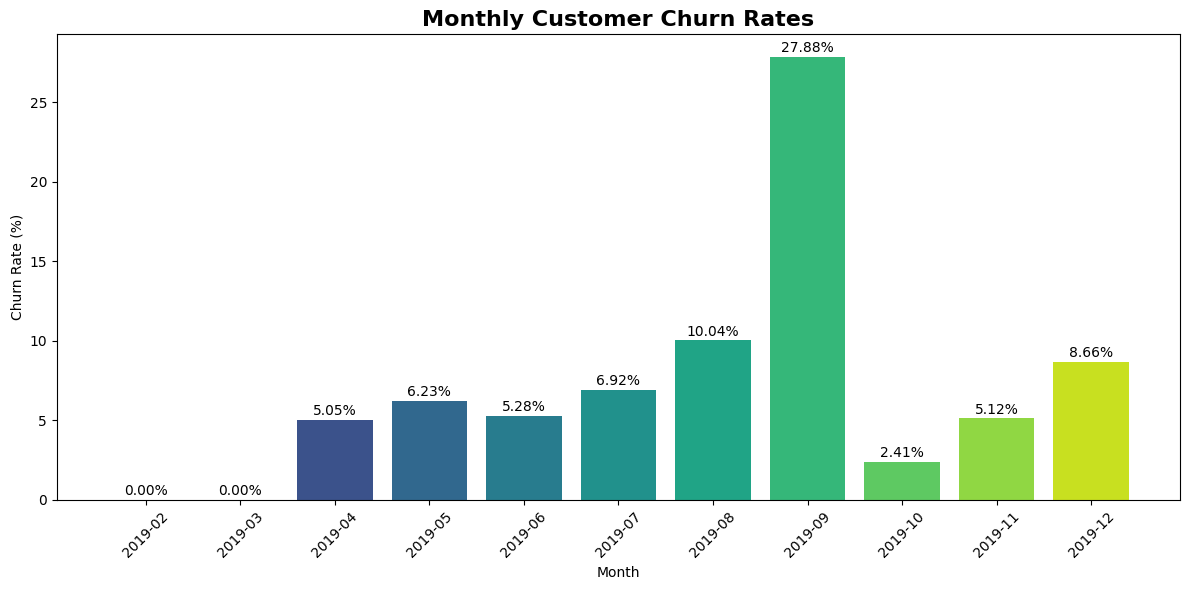

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Load the orders data and parse order_time as a datetime object
orders = pd.read_csv('../Cleaned_Datasets/orders.csv')
orders['order_time'] = pd.to_datetime(orders['order_time'], errors='coerce')
orders['order_month'] = orders['order_time'].dt.to_period('M')  # Extract the month as a period

# Step 1: Identify the first purchase month for each customer
first_purchase = orders.groupby('customer_id')['order_time'].min().dt.to_period('M')
orders['first_purchase_month'] = orders['customer_id'].map(first_purchase)  # Map each customer's first purchase month

# Step 2: Define a function to check if a customer was active within a cutoff period
def is_active_in_month(customer_id, month, orders, cutoff_days=60):
    cutoff_date = month.to_timestamp() - pd.Timedelta(days=cutoff_days)  # Calculate cutoff date by subtracting cutoff_days
    start_of_next_month = (month + 1).to_timestamp()  # Get start of the following month

    # Filter orders for the specified customer within the cutoff period
    customer_orders = orders[
        (orders['customer_id'] == customer_id) &
        (orders['order_time'] >= cutoff_date) &
        (orders['order_time'] < start_of_next_month)
    ]

    # If no orders in the cutoff period, return 'Not Yet Customer', else 'Active'
    return 'Not Yet Customer' if customer_orders.empty else 'Active'

# Step 3: Initialize a dictionary to store churn rates by month
monthly_churn_rates = {}
months = sorted(orders['order_month'].unique())  # Get a sorted list of unique months

# Calculate churn rate per month for each cohort
for i in range(1, len(months)):
    prev_month = months[i - 1]  # Set previous month
    current_month = months[i]   # Set current month
    
    active_prev_month = set()   # Track customers active in the previous month
    active_current_month = set() # Track customers active in the current month
    
    for customer_id, cohort_month in first_purchase.items():
        if cohort_month <= prev_month:  # Include customers who joined on or before the previous month
            # Check if customer was active in previous and current month
            if is_active_in_month(customer_id, prev_month, orders) == 'Active':
                active_prev_month.add(customer_id)
            if is_active_in_month(customer_id, current_month, orders) == 'Active':
                active_current_month.add(customer_id)
    
    # Calculate churn rate for the month
    lost_customers = len(active_prev_month - active_current_month)  # Customers lost this month
    churn_rate = (lost_customers / len(active_prev_month) * 100) if len(active_prev_month) > 0 else 0
    monthly_churn_rates[current_month.strftime('%Y-%m')] = churn_rate  # Store churn rate for current month
    
    # Print customer sets for February and March for verification
    if prev_month.strftime('%Y-%m') == '2023-02' or current_month.strftime('%Y-%m') == '2023-02':
        print(f"February Check - Active in February: {active_prev_month}, Active in March: {active_current_month}")
    if prev_month.strftime('%Y-%m') == '2023-03' or current_month.strftime('%Y-%m') == '2023-03':
        print(f"March Check - Active in March: {active_prev_month}, Active in April: {active_current_month}")

# Display monthly churn rates
print("Monthly Churn Rates:", monthly_churn_rates)

# Visualization: Bar chart of monthly churn rates with a color palette and values on bars
colors = sns.color_palette("viridis", len(monthly_churn_rates))  # Viridis color palette for bars

plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_churn_rates.keys(), monthly_churn_rates.values(), color=colors)
plt.xlabel('Month')
plt.ylabel('Churn Rate (%)')
plt.title('Monthly Customer Churn Rates', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)

# Adding values on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.title("Monthly Customer Churn Rates", fontsize=16, fontweight='bold')
plt.show()

## Verification Code to Identify and Analyze Months with 0% Customer Churn Rate


In [4]:
# Verification Code to Produce Output Only for Months with 0% Churn Rate

# Define the list of all unique months from the order data for verification
months_to_verify = sorted(orders['order_month'].unique())

# Iterate through each month, starting from the second month, to calculate churn
for i in range(1, len(months_to_verify)):
    prev_month = months_to_verify[i - 1]  # Set the previous month for comparison
    current_month = months_to_verify[i]   # Set the current month to check for churn

    # Initialize sets to store customers active in the previous and current months
    active_prev_month = set()
    active_current_month = set()
    
    # Populate sets by checking each customer's activity status in both months
    for customer_id in orders['customer_id'].unique():
        if is_active_in_month(customer_id, prev_month, orders) == 'Active':  # Active in the previous month
            active_prev_month.add(customer_id)
        if is_active_in_month(customer_id, current_month, orders) == 'Active':  # Active in the current month
            active_current_month.add(customer_id)
    
    # Calculate churn rate by finding customers lost from the previous to the current month
    lost_customers = active_prev_month - active_current_month  # Customers active in prev_month but not in current_month
    churn_rate = (len(lost_customers) / len(active_prev_month) * 100) if len(active_prev_month) > 0 else 0
    
    # Only print information for months where the churn rate is exactly 0%
    if churn_rate == 0:
        active_prev_month = [int(x) for x in active_prev_month]  # Convert customer IDs to integer for consistency
        active_current_month = [int(x) for x in active_current_month]

        # Output the month and indicate 0% churn rate
        print(f"Month: {current_month} has a churn rate of 0.0%")
        print(f"Active in Previous Month ({prev_month}): {sorted(active_prev_month)}")  # Sorted list of active customers in previous month
        print(f"Active in Current Month ({current_month}): {sorted(active_current_month)}")  # Sorted list of active customers in current month
        
        # Determine and display the reason for 0% churn rate
        if len(active_prev_month) == 0:
            print("Reason: No active customers in the previous month.")  # No churn because no customers were active
        else:
            print("Reason: All previously active customers remained active in the current month.")  # All active customers retained
        
        print()  # Blank line for readability between months with 0% churn

Month: 2019-02 has a churn rate of 0.0%
Active in Previous Month (2019-01): [346, 462, 713, 782, 903, 1069, 1229, 1411, 1655, 1690, 1722, 1814, 2003, 2143, 2306, 2392, 2547, 2634, 2744, 2746, 2749, 2779, 2962, 3334, 3501, 4882, 5093, 5509, 5751, 5877, 6332, 6890, 7125, 7363, 7370, 7493, 7691, 7796, 8375, 8427, 8574, 8896, 9868, 9986, 9993, 10221, 10673, 11081, 11097, 11248, 12358, 12993, 13317, 13422, 13852, 14235, 15250, 15419, 15543, 15718, 16008, 16614, 16826, 17197, 17314, 17402, 17458, 17480, 17506, 17510, 17536, 17603, 17608, 17624, 17958, 18244, 18357, 18534, 18839, 18997, 19165, 19215, 19264, 19329, 19344, 19483, 19602, 19778, 19928, 20128, 20176, 20186, 20215, 20234, 20239, 20292, 20351, 20389, 20686, 20741, 20795, 21349, 21435, 21439, 21734, 21768, 21807, 22201, 22544, 22680, 22698, 22762, 22936, 22980, 23336, 23545, 23554, 23564, 23578, 23728, 23960, 24206, 24236, 24528, 24703, 24812, 24817, 24962, 25255, 25273, 25438, 25472, 25539, 25779, 25891, 26025, 26112, 26507, 26595, 

---

## Analysis of Monthly Customer Churn Rates

### How to Calculate Monthly Customer Churn Rates?

The code calculates the **monthly churn rate** by following a structured approach that defines customer activity and measures the loss of monthly retention. Here’s a breakdown of the logic used:

1. **Identify Each Customer's First Purchase Month**:
   - The code begins by determining the first purchase month for each customer. This is essential as it defines the starting point (or cohort month) for tracking a customer's future activity.
   - The `first_purchase_month` for each customer is identified by grouping the dataset by `customer_id` and finding the minimum order date.

2. **Define Customer Activity Status by Month**:
   - To calculate the churn rate, it's important to determine if a customer is "Active" in each month. A customer is considered **active** in a given month if they made at least one purchase within a certain period defined by the **cutoff days**.
   - The `is_active_in_month` function checks whether each customer has made a purchase within a backtracked cutoff period (60 days) leading up to the end of the month. This accounts for recent purchases that indicate engagement.
   - If a customer made a purchase in this cutoff period, they are marked as "Active"; otherwise, they are labeled as "Not Yet Customer" if they have no prior purchases.

3. **Calculate Monthly Churn Rate**:
   - The code calculates churn by iterating through each month, tracking customers who were active in the previous month but did not make any purchases in the current month.
   - The churn rate for each month is calculated with the formula:
   
     Churn Rate = (Lost Customers / Active Customers in Previous Month) * 100
     
     where "Lost Customers" represents the customers who were active in the previous month but did not remain active in the current month.

4. **Verification for Months with 0% Churn**:
   - The code includes specific checks for months with a 0% churn rate. In these cases, it prints a confirmation message with the list of active customers in the previous and current months.
   - For February and March, the 0% churn rate is due to the fact that **all previously active customers remained active in the following month**, showing complete retention.

5. **Visualization**:
   - Monthly churn rates are stored in a dictionary and visualized as a bar chart, where each bar represents a month’s churn rate.


### General Observations

The churn rates across months reveal patterns of customer retention and disengagement, providing insights into periods of strong retention and higher customer loss.

1. **Stable Retention in Early Months**:
   - From February to June 2019, churn rates are relatively low, fluctuating between 0% and 6%. This suggests stable retention and effective initial engagement strategies that keep customers active in the early months.

2. **High Churn in August and September**:
   - August and September show a significant spike in churn rates, reaching 10.04% in August and 27.88% in September. This indicates a period of increased customer disengagement, which could be due to seasonal factors, a drop in promotions, or unmet customer expectations.

3. **Improved Retention in October and November**:
   - Churn rates drop sharply in October (2.41%) and remain stable in November (5.12%), indicating successful re-engagement efforts or an increase in customer engagement activities that have managed to retain customers effectively.

4. **Churn Increase in December**:
   - In December, churn rises to 8.66%, possibly due to the holiday season, where spending behaviors and engagement patterns shift. This end-of-year churn increase highlights a seasonal challenge that may require specific strategies to retain customers.

### Key Insights

1. **Effective Early Retention**:
   - Low churn rates in the first half of the year (February-June) demonstrate effective engagement, indicating that the company’s initial retention strategies are performing well in maintaining customer activity.

2. **Churn Spikes in Late Summer/Early Fall**:
   - The sharp increase in churn during August and September signals a potential issue with mid-year engagement. This period likely requires targeted strategies to sustain customer interest after the initial acquisition period.

3. **Re-Engagement Success in Fall**:
   - The reduction in churn in October and November suggests effective re-engagement tactics, which could include timely promotions or improved retention efforts that draw previously inactive customers back.

4. **Seasonal Churn Challenges in December**:
   - December’s increased churn rate indicates a potential impact from seasonal factors, underscoring the need for holiday-specific strategies to counteract seasonal disengagement.

---

## Recommendations for Further Action

To address the observed patterns and improve retention, here are targeted recommendations prioritized for maximum impact:

1. **Launch Mid-Year Engagement Campaigns (High Priority)**:
   - **Objective**: Reduce the high churn rates observed in August and September by re-engaging customers who may lose interest mid-year.
   - **Action**: Implement engagement campaigns with personalized discounts, loyalty points, or exclusive offers during this period. For instance, a "Back-to-School" or "End of Summer" sale could stimulate interest and maintain engagement.
   - **Priority**: High — focusing on high-churn months is essential to stabilize retention and prevent significant customer drop-offs.

2. **Develop a Loyalty Program (High Priority)**:
   - **Objective**: Encourage continuous engagement and reward loyal customers.
   - **Action**: Establish a structured loyalty program that rewards consistent activity, offering points, discounts, or early access to sales based on the frequency and duration of customer engagement.
   - **Priority**: High — a loyalty program fosters long-term engagement and builds brand loyalty, reducing the likelihood of customers disengaging.

3. **Collect Customer Feedback Post-Purchase (Medium Priority)**:
   - **Objective**: Gain insights into customer motivations and identify reasons for disengagement during high-churn periods.
   - **Action**: Conduct post-purchase surveys to gather feedback on product satisfaction, engagement, and retention. Use this data to refine retention strategies and address specific customer pain points.
   - **Priority**: Medium — understanding customer needs and preferences will help the company tailor its offerings, improving retention.

4. **Implement Personalized Re-Engagement Campaigns (Medium Priority)**:
   - **Objective**: Target inactive customers with personalized offers to prevent churn.
   - **Action**: Based on customer purchase history, implement re-engagement campaigns to offer relevant products or exclusive discounts to inactive customers. For example, if a customer hasn’t purchased in 30 days, send personalized recommendations or a special promotion to bring them back.
   - **Priority**: Medium — personalization enhances relevance, increasing the likelihood of re-engaging inactive customers.

5. **Optimize Communication Channels for Retention (Foundational)**:
   - **Objective**: Ensure effective customer engagement across various platforms.
   - **Action**: Experiment with different communication channels (email, SMS, push notifications) and messaging frequencies to identify the most effective means of maintaining customer interest without overwhelming them.
   - **Priority**: Foundational — optimizing communication ensures timely and relevant updates, reinforcing engagement and reducing churn.

6. **Adapt Retention Strategy for Seasonal Patterns (Foundational)**:
   - **Objective**: Address seasonal churn challenges, especially during the holiday season.
   - **Action**: Analyze seasonal trends and implement tailored promotions or exclusive holiday offers during high-churn periods (e.g., December). By aligning campaigns with seasonal demand, the company can retain customers during critical times.
   - **Priority**: Foundational — addressing seasonal shifts helps sustain engagement, reducing churn during known high-risk periods.

Implementing these recommendations will address the specific churn issues highlighted in the analysis. By focusing on personalized engagement, loyalty incentives, and seasonal adjustments, the company can strengthen retention, foster long-term loyalty, and reduce monthly churn rates across customer cohorts.

---

# **Comprehensive Analysis of Customer Retention Rates**

# Step 1: Analyzing Monthly Retention Rates

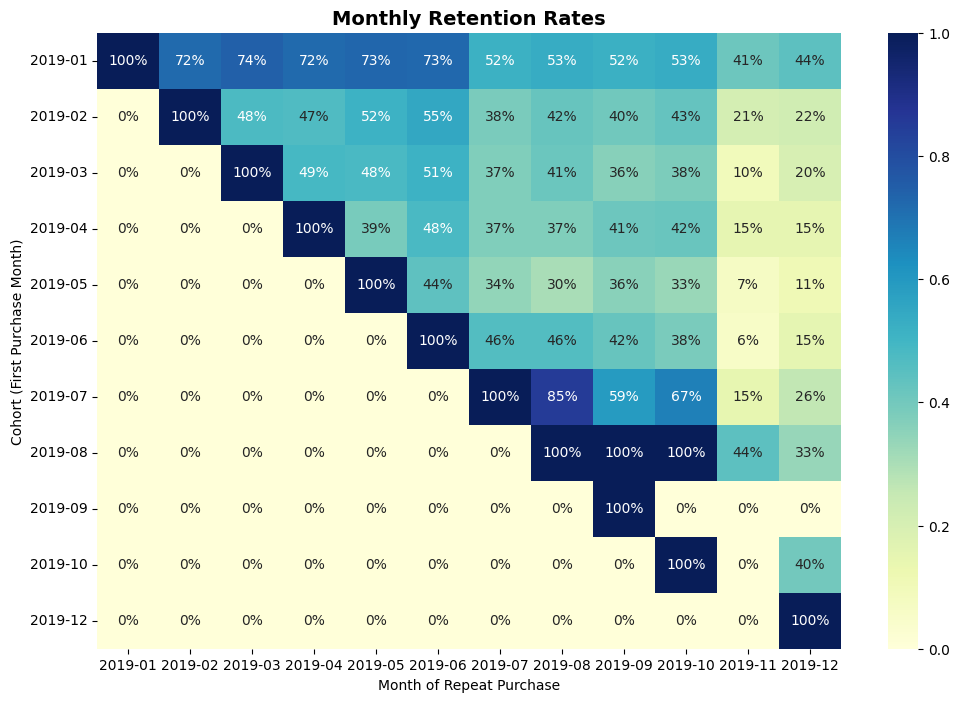

In [5]:
# Step 1: Convert 'order_time' to datetime format
# Ensures that the 'order_time' column is in datetime format for easier date-based analysis.
# 'errors="coerce"' will set any invalid date to NaT (Not a Time).
orders_data['order_time'] = pd.to_datetime(orders_data['order_time'], errors='coerce')

# Step 2: Cohort Analysis for Monthly Retention Rates

# Extract month from each order date to create a 'order_month' column.
# This groups all orders within the same month together, providing a monthly view of activity.
orders_data['order_month'] = orders_data['order_time'].dt.to_period('M')

# Identify the first purchase month for each customer.
# The 'first_purchase' column records the earliest order month for each customer,
# establishing the "cohort" or initial entry point for the customer.
first_purchase = orders_data.groupby('customer_id')['order_month'].min()
orders_data = orders_data.join(first_purchase.rename('first_purchase'), on='customer_id')

# Remove duplicates to count unique customer purchases per month.
# By dropping duplicates based on 'customer_id' and 'order_month', we ensure each customer
# is counted only once per month, which is critical for accurate cohort analysis.
orders_data_unique = orders_data.drop_duplicates(subset=['customer_id', 'order_month'])

# Calculate monthly retention by cohort.
# Group the data by 'first_purchase' (cohort) and 'order_month', and count unique customers in each group.
# The result is a DataFrame (cohort_counts) where each row represents a cohort and each column represents
# the count of unique customers who made a purchase in a particular month relative to their first purchase month.
cohort_counts = orders_data_unique.groupby(['first_purchase', 'order_month']).size().unstack(fill_value=0)

# Calculate cohort sizes by taking the number of customers in each cohort's first purchase month.
# This gives the initial size of each cohort to use as a baseline for calculating retention rates.
# We use `.apply()` to select the first non-zero count in each row, which corresponds to the first month in the cohort.
cohort_sizes = cohort_counts.apply(lambda x: x[x > 0].iloc[0] if x[x > 0].any() else 0, axis=1)

# Calculate retention rates by dividing each month’s count by the cohort's initial size.
# Retention rates indicate the percentage of customers in each cohort who made repeat purchases in subsequent months.
retention = cohort_counts.divide(cohort_sizes, axis=0).fillna(0)

# Plot retention rates using a heatmap.
# The heatmap provides a visual representation of retention rates for each cohort (first purchase month) over time.
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Monthly Retention Rates", fontsize=14, fontweight='bold')
plt.xlabel("Month of Repeat Purchase")
plt.ylabel("Cohort (First Purchase Month)")
plt.show()

---

## Analysis of Monthly Retention Rates

The heatmap visualization displays the monthly retention rates for different customer cohorts, defined by the month of their first purchase. Each row represents a unique cohort based on the first purchase month (from January 2019 to December 2019), and each column represents subsequent months in which these customers made repeat purchases. The retention rates, expressed as percentages, indicate the proportion of customers from each cohort who returned in subsequent months.

### Why Analyzing First Purchase Cohorts is Important

Analyzing first purchase cohorts provides valuable insights into customer retention trends over time. By grouping customers based on the month of their first purchase, we can track how effectively the retention strategy encourages repeat engagement in subsequent months. Cohort analysis helps identify patterns in customer behavior, uncover issues with long-term loyalty, and evaluate the effectiveness of retention efforts. Additionally, this approach highlights whether specific months or marketing campaigns are more successful at attracting and retaining customers, allowing for targeted improvements in retention strategies.

### General Observations
1. **Initial Cohort Engagement**: The first month after the initial purchase typically shows a strong retention rate only in specific cohorts, such as January 2019 (72%), July 2019 (85%), and August 2019 (100%). However, even in these cohorts, the retention rate tends to decrease over time, indicating diminishing engagement as the months progress.
2. **Cohort Retention Decay**: As time progresses, there is a clear decay in retention rates across cohorts. For example, the January 2019 cohort starts with a 72% retention rate in February 2019, which gradually declines to 44% by December 2019.
3. **Low Retention for Later Cohorts**: Later cohorts (e.g., from September 2019 onward) display lower retention rates. For instance, the retention rate for the September 2019 cohort drops to 0% in October and remains at 0% in both November and December 2019.

### Key Insights
1. **Early Cohorts Show Strong Initial Retention**: Cohorts such as January, February, and March 2019 maintain relatively higher retention rates over a few months. For instance, the March 2019 cohort has a retention rate of 100% in the first month and maintains a reasonable rate (51%) even three months after the initial purchase. Similarly, the February 2019 cohort has a retention rate of 100% in the first month and maintains a reasonable rate (55%) even four months after the initial purchase.
2. **Retention Drops Rapidly Over Time**: Across all cohorts, there is a noticeable decline in retention rates within a few months. This suggests that while customers initially engage with repeat purchases, maintaining engagement becomes challenging over longer periods.
3. **Retention Stability for July 2019 Cohort**: The July 2019 cohort has a unique pattern, showing relatively high retention even after five months, with retention rates of 85% in the second month, 59% in the fifth month, and 67% in the sixth month. This could indicate that certain factors specific to April contributed to better customer retention.
4. **Challenges in Retaining Later Cohorts**: The retention rates for cohorts starting from September 2019 are particularly low, with most rates falling to 0% within a few months. This drop could imply seasonal trends, diminishing customer interest, or issues with the retention strategy.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy appears **partially effective** but lacks long-term engagement capabilities. While initial retention rates for some early cohorts are relatively strong, there is a significant decline within a few months, with some cohorts showing retention rates as low as 0% just a few months after their initial purchase. This trend indicates that the retention strategy may successfully attract customers initially but struggles to maintain their interest over time.

- **Effective Elements**: The strategy is effective in engaging customers initially, as seen with high first-month retention rates (e.g., 72% for January 2019). This suggests that initial promotions, onboarding, or first-purchase incentives are working well.
- **Ineffective Elements**: The rapid decline in retention across most cohorts implies that the strategy is not fostering long-term loyalty or repeat purchases beyond a few months. Additionally, the very low retention rates for later cohorts indicate that the strategy may not be adapting effectively to changing customer needs or seasonal demands.

---

## Recommendations for Further Action

To improve long-term retention and address the observed issues, the following recommendations are proposed, prioritized for maximum impact:

1. **Implement a Personalized Engagement Strategy (High Priority)**:
   - Use customer data to create personalized retention strategies based on purchasing behavior, demographics, and preferences. For example, January 2019 and July 2019 cohorts showed higher retention rates in the months following their initial purchases; analyzing these cohorts could help identify characteristics or actions that can be replicated.
   - Personalized offers, follow-up communications, and targeted content (such as product recommendations) can help sustain customer engagement. By customizing the experience, customers are more likely to return in subsequent months.

2. **Introduce a Loyalty Program (High Priority)**:
   - Launch a structured loyalty or rewards program to incentivize repeat purchases. Rewarding customers with points, discounts, or exclusive offers based on repeat engagement could significantly improve retention. For instance, the January 2019 cohort, which started strong with a 100% retention rate, could potentially maintain this rate longer with loyalty incentives.
   - Emphasize reward milestones to encourage monthly engagement and ensure that benefits increase with long-term loyalty.

3. **Conduct Post-Purchase Follow-Ups (Medium Priority)**:
   - Implement automated follow-ups, such as satisfaction surveys or personalized thank-you messages, after each purchase. Engaging customers after the first few purchases reinforces their relationship with the company, reducing the likelihood of drop-off.
   - Include offers or reminders in these follow-ups to drive customers back for additional purchases. This approach could be especially effective in retaining later cohorts, which show rapid drop-offs in retention.

4. **Experiment with Customer Reactivation Campaigns (Medium Priority)**:
   - For cohorts where retention rates have dropped to low levels (e.g., 6% for June 2019 in November), re-engagement campaigns can help re-attract inactive customers. These campaigns could involve targeted discounts, special offers, or reactivation emails that remind customers of new or relevant products.
   - Segment customers based on the number of months since their last purchase, and tailor re-engagement offers accordingly.

5. **Analyze Seasonality and Adjust Marketing for Later Cohorts (Medium Priority)**:
   - Given the low retention for later cohorts (e.g., 0% from October to December for the September 2019 cohort), it may be beneficial to study seasonal patterns and adjust marketing strategies accordingly. Understanding whether there are seasonal drops or other external factors affecting retention could help the team implement better-timed campaigns.
   - For instance, using holiday-specific promotions in November and December for cohorts with previously low retention rates could capture the seasonal demand.

6. **Invest in Product Quality and Customer Service (Foundational)**:
   - While product quality and customer service may not directly influence retention rates shown in the heatmap, they are foundational for long-term loyalty. Ensuring that customers are satisfied with their purchases and receive excellent support will contribute to improved retention indirectly.
   - Consistently positive experiences encourage customers to return, whereas poor experiences may contribute to low retention rates over time.

These recommendations aim to address both short-term and long-term retention challenges. By prioritizing personalized engagement and a loyalty program, the business can foster sustained interest and loyalty, leading to improved monthly retention rates across cohorts.

---

# Step 2: Analyzing Customer Retention Rates by Age

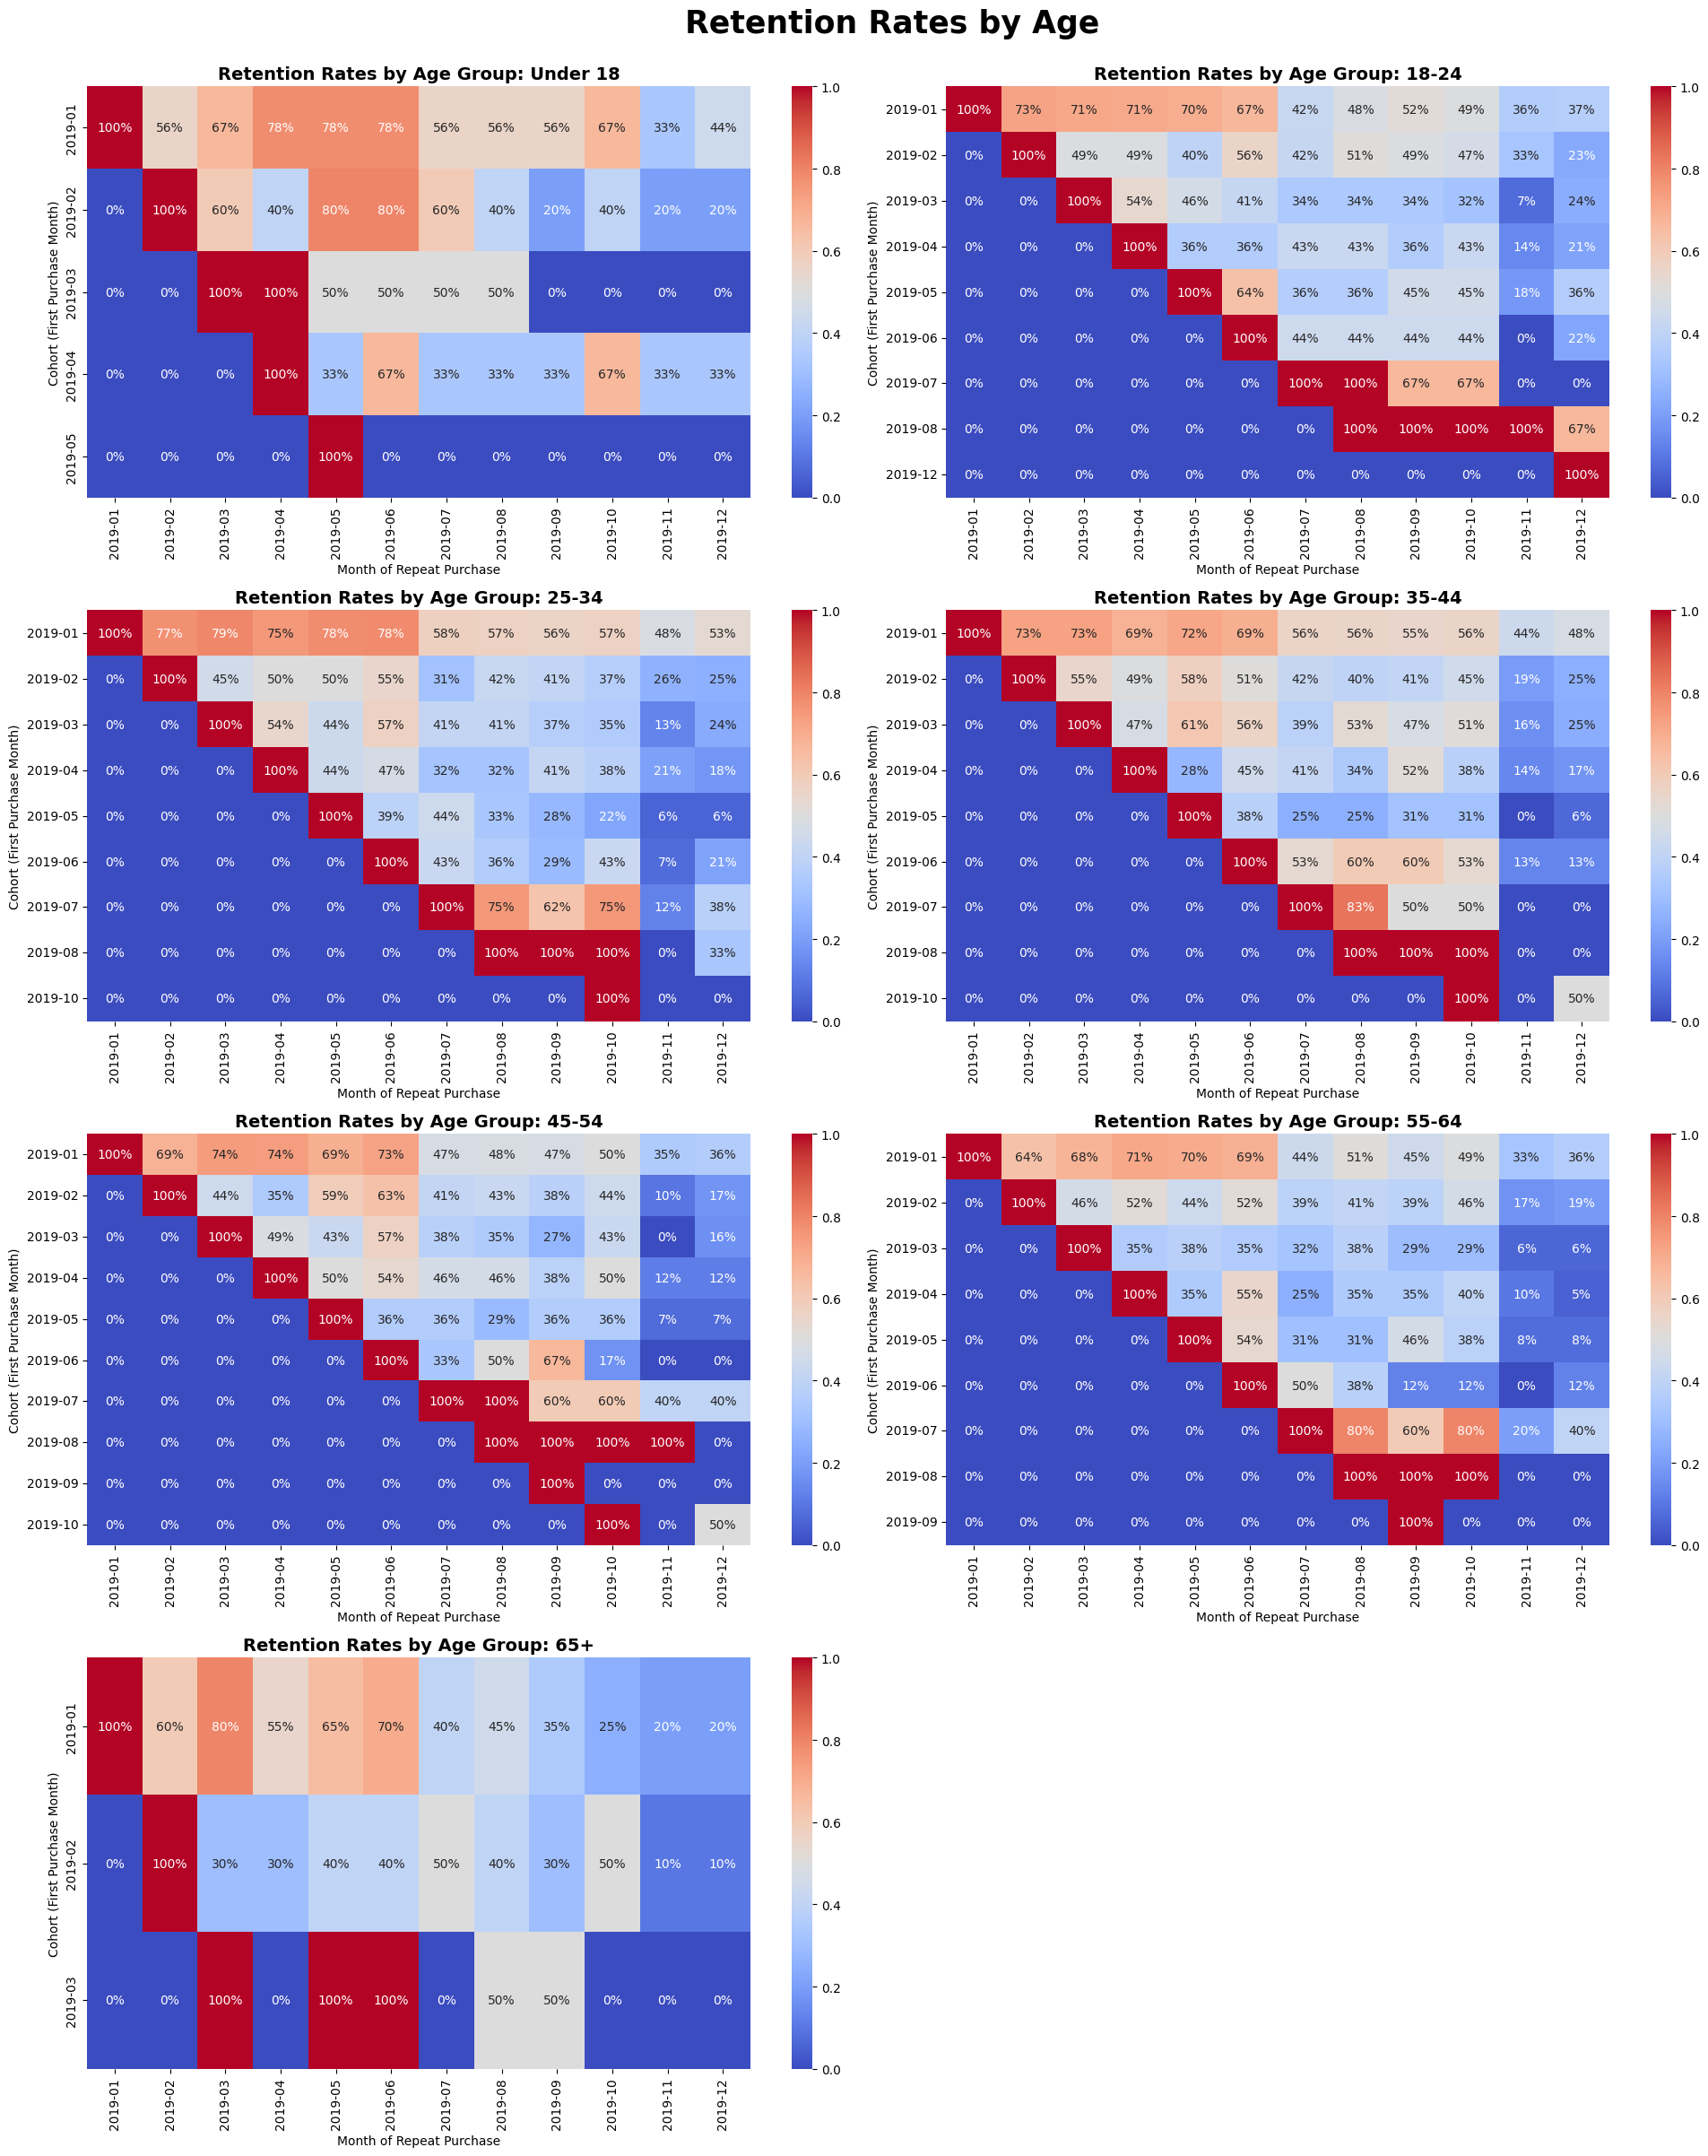

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the customer data
customer_data = pd.read_csv('../Cleaned_Datasets/SG_customers.csv')

# Define age bins and corresponding labels for grouping
age_bins = [0, 18, 24, 34, 44, 54, 64, 100]  # Age range boundaries
age_labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Age group labels

# Assign each customer to an age group based on their age
customer_data['age_group'] = pd.cut(customer_data['age'], bins=age_bins, labels=age_labels, right=False)

# Merge the age group data into orders_data based on customer_id
orders_data = pd.merge(orders_data, customer_data[['customer_id', 'age_group']], on='customer_id', how='left')

# Sort 'age_group' to ensure consistent order for visualization
orders_data['age_group'] = pd.Categorical(orders_data['age_group'], categories=age_labels, ordered=True)
orders_data = orders_data.sort_values(by='age_group')

# Filter age groups to include only those present in the data
unique_age_groups = [group for group in age_labels if group in orders_data['age_group'].unique()]

# Calculate the number of rows needed for the subplot grid based on age groups
num_groups = len(unique_age_groups)
rows = math.ceil(num_groups / 2)

# Set up subplot grid with two columns per row
fig, axes = plt.subplots(rows, 2, figsize=(20, rows * 6))
axes = axes.flatten()  # Flatten grid to allow easy indexing of each subplot

# Loop through each unique age group to calculate and plot retention rates
for i, group in enumerate(unique_age_groups):
    # Filter orders to include only those in the current age group
    group_orders = orders_data[orders_data['age_group'] == group]

    # Calculate retention rates by cohort for the current age group
    cohort_counts = group_orders.drop_duplicates(subset=['customer_id', 'order_month']).groupby(['first_purchase', 'order_month']).size().unstack(fill_value=0)
    cohort_sizes = cohort_counts.apply(lambda x: x[x > 0].iloc[0] if x[x > 0].any() else 0, axis=1)
    retention = cohort_counts.divide(cohort_sizes, axis=0).fillna(0)

    # Plot the retention heatmap for the current age group in the designated subplot
    sns.heatmap(retention, annot=True, fmt=".0%", cmap="coolwarm", ax=axes[i])
    axes[i].set_title(f"Retention Rates by Age Group: {group}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Month of Repeat Purchase")
    axes[i].set_ylabel("Cohort (First Purchase Month)")

# Hide any unused subplots if the number of age groups is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title for the entire plot and adjust spacing
plt.suptitle("Retention Rates by Age", fontsize=25, fontweight='bold', y=1)
plt.subplots_adjust(top=0.3)  # Adjust top spacing for title
plt.tight_layout()  # Prevent overlap with the title
plt.show()

---

## Analysis of Retention Rates Based on Age

The heatmaps represent retention rates segmented by age group, illustrating the likelihood of repeat purchases for each cohort over time. The x-axis represents the months after the first purchase, while the y-axis shows the initial purchase month for each cohort. The color intensity highlights the retention rate, with darker colors representing higher retention. This visualization reveals age-specific trends, providing insights into each age group's engagement patterns.

### General Observations

1. **Under 18 Age Group**:
   - **Retention Patterns**: This age group shows high retention during the initial months, especially for cohorts that made their first purchase in January and February 2019. The January cohort, for instance, retains 100% in the first month but quickly declines to around 56-67% in the following months.
   - **Long-Term Retention**: By month six, most cohorts see a steep drop-off, with retention reaching 0% for later months, indicating a significant decrease in engagement over time.
   - **Interpretation**: The rapid decline suggests that while the initial marketing efforts are effective in capturing interest, they may not provide ongoing value or incentives that resonate with this younger demographic, leading to rapid disengagement.

2. **18-24 Age Group**:
   - **Retention Patterns**: The retention rate in this age group is strong for the first 2-3 months post-initial purchase, with the January 2019 cohort starting at 100% and maintaining around 70-73% in the subsequent months.
   - **Long-Term Retention**: By months 4-6, retention gradually decreases, with many cohorts stabilizing at around 20-40% retention. This shows a slow but steady decline over time, which points to some level of sustained interest but not enough to keep all customers engaged in the long term.
   - **Interpretation**: This age group likely needs a mix of engaging content and value-driven incentives to sustain interest beyond the first few months, as engagement drops off without substantial long-term reinforcement.

3. **25-34 Age Group**:
   - **Retention Patterns**: This group demonstrates strong initial retention, with some cohorts retaining up to 70-80% of customers in the first few months. The January cohort, for instance, has 77-79% retention over the first three months.
   - **Long-Term Retention**: Although retention decreases, it does so more gradually than younger groups, with many cohorts stabilizing at around 25-30% by months 6-8. This indicates a higher engagement rate and potential for building loyalty.
   - **Interpretation**: Customers in this age group appear to find value in the offerings, suggesting that a tailored long-term retention strategy could leverage their initial interest to foster loyalty and repeat engagement.

4. **35-44 Age Group**:
   - **Retention Patterns**: Retention remains high in the initial months, similar to the 25-34 group, with the January 2019 cohort holding around 73% retention initially and tapering down over time.
   - **Long-Term Retention**: While retention does decrease, it stabilizes between 20-30% in later months, indicating that this age group has slightly better retention potential.
   - **Interpretation**: The gradual decline implies that this demographic may be open to loyalty-building initiatives, as they exhibit stronger brand loyalty and consistent engagement than younger demographics.

5. **45-54 Age Group**:
   - **Retention Patterns**: This age group displays a strong initial retention rate, with retention beginning to drop off around months 4-6. However, the decline is less steep, with several cohorts retaining around 15-20% by later months.
   - **Long-Term Retention**: There is a moderate retention rate in this group, indicating that they are somewhat receptive to the current engagement strategy but could benefit from further incentives.
   - **Interpretation**: The moderate drop-off rate suggests that this age group could respond well to targeted loyalty programs and exclusive content to improve their long-term retention further.

6. **55-64 Age Group**:
   - **Retention Patterns**: Initial retention is high, especially for January and February cohorts, which start at 100% and show a gradual decline within the first six months.
   - **Long-Term Retention**: Retention stabilizes around 10-15% in some later months, which is lower than younger age groups but consistent.
   - **Interpretation**: Although this age group is less engaged over the long term, they could be positively influenced by retention strategies that focus on personalized experiences or value-based rewards to maintain their interest.

7. **65+ Age Group**:
   - **Retention Patterns**: This group shows high initial retention, particularly for the January cohort, but quickly decreases in subsequent months.
   - **Long-Term Retention**: Retention falls drastically within the first few months, with only a small percentage retained by month 6, stabilizing around 10-20% for a few cohorts.
   - **Interpretation**: The rapid disengagement indicates that current strategies may not resonate well with this age group, and a more tailored approach could be beneficial.

### Key Insights

1. **Effective Initial Retention Across All Age Groups**: All age groups display strong initial retention rates, indicating effective initial engagement strategies, likely through targeted advertising or onboarding processes that successfully attract new customers.
   
2. **Age-Specific Retention Decline Patterns**: Younger age groups (Under 18 and 18-24) experience rapid declines in retention, suggesting that the current retention strategy lacks elements to sustain their interest. The middle age groups (25-54) have better retention, suggesting potential for building longer-term loyalty within these age brackets.
   
3. **Middle-Aged Cohorts Show Higher Long-Term Engagement**: The 25-54 age groups exhibit slightly better retention, suggesting a higher likelihood of long-term engagement. These cohorts might benefit from further loyalty-driven strategies to enhance their retention potential.

4. **Older Demographics Show Declining Engagement**: The 55-64 and 65+ age groups display lower long-term retention, indicating that these demographics might require different approaches for effective engagement.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy appears **partially effective** but lacks long-term engagement capabilities. While initial retention rates for some early cohorts are relatively strong, there is a significant decline within a few months, with some cohorts showing retention rates as low as 0% just a few months after their initial purchase. This trend indicates that the retention strategy may successfully attract customers initially but struggles to maintain their interest over time.

- **Effective Elements**: 
   - The strategy is effective in engaging customers initially, as evidenced by high first-month retention rates. For example, the January 2019 cohort shows retention rates around 70-100% in the first month, suggesting that initial promotions, onboarding processes, or first-purchase incentives are effective in capturing customer interest.
   - The middle age groups (25-54) exhibit relatively stable retention over time compared to other groups, indicating that the current strategy has some appeal to this demographic, potentially due to loyalty programs or value-driven offerings.

- **Ineffective Elements**:
   - There is a rapid decline in retention across most cohorts after the first few months, especially among younger (Under 18 and 18-24) and older age groups (55+). This suggests that the strategy lacks elements that foster long-term loyalty and repeat purchases.
   - The retention strategy does not seem to adapt effectively to changing customer needs or preferences across age groups, particularly for the youngest and oldest demographics, which experience the most significant drop-offs. This indicates an opportunity to diversify engagement tactics based on age-specific interests and preferences.

---

## Recommendations for Further Action

1. **Age-Specific Engagement Programs**:
   - **Younger Age Groups (Under 18 and 18-24)**:
     - **Gamification**: Implement gamified elements, such as badges, rewards, and levels for repeat purchases, which may appeal to younger customers' desire for interactive and rewarding experiences.
     - **Influencer Partnerships and Social Media Campaigns**: Collaborate with social media influencers and promote user-generated content that resonates with this age group, encouraging brand affinity and organic engagement.
     - **Targeted Promotions and Limited-Time Offers**: Use time-sensitive promotions to create a sense of urgency, driving repeat purchases among younger customers who may prefer spontaneous shopping.

   - **Middle Age Groups (25-54)**:
     - **Personalized Offers**: Use insights from purchase history and engagement data to create highly personalized recommendations, offers, and content that align with their purchasing preferences.
     - **Exclusive Access and VIP Programs**: Offer this demographic exclusive access to new products, private sales, or members-only events. This age group may appreciate the exclusivity and feel more valued, enhancing loyalty.
     - **Advanced Loyalty Program**: Introduce a points-based loyalty program that offers increasing benefits over time, encouraging long-term commitment to the brand.

   - **Older Age Groups (55+)**:
     - **Customer Care Programs**: Provide additional customer care resources to foster loyalty, such as dedicated support lines or personalized customer service, ensuring they feel supported and valued.
     - **Educational Content**: Offer informational content, such as product guides, tutorials, or "how-to" videos that cater to this demographic’s preferences, helping them make more informed purchase decisions.
     - **Community Engagement and Support Initiatives**: Highlight community and support initiatives that resonate with older age groups, such as sustainability or corporate social responsibility, to increase their brand loyalty.

2. **Implement Comprehensive Feedback Collection**:
   - **Post-Purchase Surveys**: Send surveys after each purchase to understand satisfaction and address any immediate concerns, allowing for continuous improvement.
   - **Regular Engagement Surveys**: Conduct periodic surveys across different age groups to gather insights on how well the company meets their expectations and how to adjust offerings accordingly.

3. **Targeted Re-Engagement Campaigns**:
   - **Win-Back Campaigns**: For cohorts showing sharp declines, deploy win-back campaigns that include personalized offers or incentives, specifically targeting lapsed customers.
   - **Seasonal Promotions and Thematic Campaigns**: Use seasonal events or holidays to re-engage inactive customers, offering themed promotions that appeal to each age group's unique preferences.

4. **Enhanced Retention Analytics and Segmentation**:
   - **Age-Specific Monthly Tracking**: Develop a dashboard to monitor retention rates by age group on a monthly basis, allowing for timely insights into specific trends and potential drop-off points.
   - **Behavioral Segmentation within Age Groups**: Segment each age group further based on purchasing behavior, enabling a more granular understanding of each segment’s engagement and tailoring strategies accordingly.

5. **Expand Loyalty and Referral Programs**:
   - **Tiered Loyalty Programs**: Implement tiered loyalty systems with increasing benefits for repeat purchases, designed to retain high-value customers in the 25-54 age range.
   - **Referral Incentives**: Encourage referrals by offering incentives to customers who bring in friends or family, fostering organic growth, particularly among younger age groups.

6. **Leverage Predictive Analytics for Proactive Engagement**:
   - **Churn Prediction Models**: Utilize machine learning models to predict customer churn by age and behavioral data, allowing proactive engagement.
   - **Automated Re-Engagement Triggers**: Set up automated notifications or email campaigns targeting customers at risk of churn, with content tailored to their engagement patterns.

7. **Offer Exclusive Access and Age-Group-Specific Benefits**:
   - **Exclusive Product Access**: Provide early access to new products or seasonal promotions tailored to different age groups, such as trendy items for younger audiences and exclusive VIP access for older age groups.
   - **VIP Customer Support for Older Demographics**: Introduce VIP customer support services or personalized onboarding for the 55+ age groups, which may value convenience and reliability.

8. **Experiment with New Engagement Channels Tailored to Younger Demographics**:
   - **Social Media Expansion**: Build brand presence on platforms popular among younger audiences, like TikTok and Snapchat, with interactive, short-form video content that aligns with current trends.
   - **Interactive Content Creation**: Engage with the Under 18 and 18-24 age groups through interactive content, like polls, challenges, or stories that showcase products in fun and relatable formats.

9. **Build a Community-Driven Approach to Encourage Peer Influence**:
   - **Online Community Forum**: Create an online forum or social platform where customers can interact, share experiences, and offer advice. Introduce incentives for active participation, such as exclusive rewards or access to events.
   - **Incentivize Peer Influence**: Encourage community members to share reviews or refer friends, especially within middle-aged and younger groups, to leverage social influence and foster organic growth.

By implementing these recommendations, the brand can address retention challenges effectively across age groups, enhancing customer satisfaction and fostering long-term loyalty.

---



# Step 3: Analyzing Customer Retention Rates by Gender

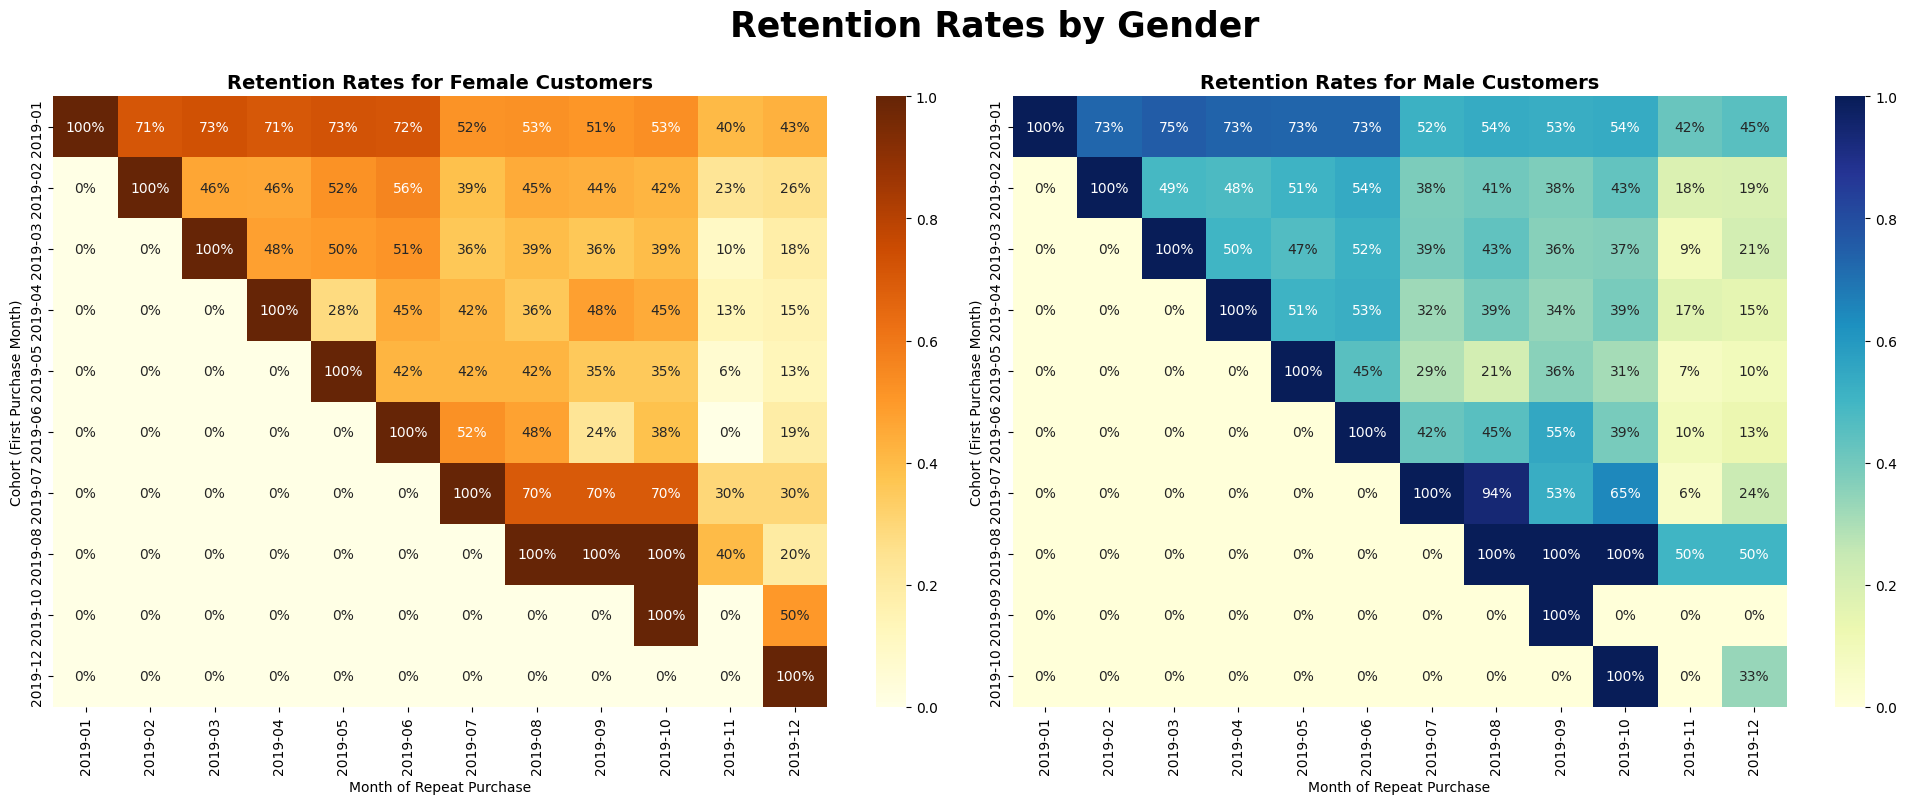

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the necessary datasets
orders_data = pd.read_csv('../Cleaned_Datasets/orders.csv')
customer_data = pd.read_csv('../Cleaned_Datasets/SG_customers.csv')

# Convert 'order_time' column to datetime format, handling errors as NaT (Not a Time)
orders_data['order_time'] = pd.to_datetime(orders_data['order_time'], errors='coerce')

# Extract the month from 'order_time' to create 'order_month' column and calculate each customer's first purchase month
orders_data['order_month'] = orders_data['order_time'].dt.to_period('M')
first_purchase = orders_data.groupby('customer_id')['order_month'].min()
orders_data = orders_data.join(first_purchase.rename('first_purchase'), on='customer_id')

# Merge gender information from customer_data into orders_data based on 'customer_id'
# Drop duplicates in customer data to avoid any merging issues
orders_data = pd.merge(orders_data, customer_data[['customer_id', 'gender']].drop_duplicates(), on='customer_id', how='left')

# Get unique gender values from the data (e.g., 'Male' and 'Female')
genders = orders_data['gender'].dropna().unique()

# Set up a 1x2 grid for the subplots and define color maps for each gender
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
color_maps = {'Male': 'YlGnBu', 'Female': 'YlOrBr'}

# Loop over each gender group to calculate and plot retention rates
for i, gender in enumerate(genders):
    # Filter data to include only customers of the current gender
    gender_data = orders_data[orders_data['gender'] == gender]

    # Calculate retention counts by cohort (first purchase month) and repeat purchase month
    gender_retention = gender_data.groupby(['first_purchase', 'order_month'])['customer_id'].nunique().unstack(fill_value=0)

    # Calculate initial cohort size for each cohort to use as denominator in retention rate calculation
    gender_counts = gender_retention.apply(lambda x: x[x > 0].iloc[0] if x[x > 0].any() else 0, axis=1)
    retention_rates = gender_retention.divide(gender_counts, axis=0).fillna(0)

    # Plot the retention heatmap for the gender group in the appropriate subplot
    sns.heatmap(retention_rates, annot=True, fmt=".0%", cmap=color_maps.get(gender, 'YlGnBu'), ax=axes[i])
    axes[i].set_title(f"Retention Rates for {gender} Customers", fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Month of Repeat Purchase")
    axes[i].set_ylabel("Cohort (First Purchase Month)")

# Add a main title and adjust layout for readability
plt.suptitle("Retention Rates by Gender", fontsize=25, fontweight='bold', y=1)
plt.subplots_adjust(top=0.3)  # Adjust top spacing for the title
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

---

## Analysis of Retention Rates by Gender

The heatmaps illustrate retention rates of female and male customers across monthly cohorts, showing how likely customers from each initial purchase month (cohort) are to make repeat purchases in subsequent months. Darker colors represent higher retention rates, with lighter colors indicating lower retention or lack of engagement.

### General Observations
1. **Female Customers**:
   - The retention rate starts strong in the first few months for each cohort, but it drops consistently over time.
   - For example, the January 2019 cohort shows a 100% retention rate in the first month, decreasing to 73% in February, then fluctuating between 50-73% until reaching around 43% by the end of 2019.
   - Later cohorts (e.g., May and June) see retention drop more quickly, with a rapid decline to around 10-20% retention in subsequent months.

2. **Male Customers**:
   - Similar to females, male customers also show high retention in the first few months but display slightly more stability in certain cohorts (e.g., the July 2019 cohort maintains a higher retention rate through subsequent months).
   - However, like females, retention rates drop over time, with many cohorts reducing to about 10-20% by the end of the observation period.

### Key Insights
1. **Initial Retention Success**: Both genders show a high initial retention rate, suggesting effective engagement strategies at the beginning of the customer journey.
2. **Rapid Decline Over Time**: Retention rates drop significantly over time for both genders, indicating that the current strategy lacks long-term engagement.
3. **Slight Variability Across Genders**: Male customers appear to have marginally higher retention in some later months, though the overall trend of decline is present for both genders.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy appears **partially effective** but requires enhancements for long-term engagement. While it successfully attracts customers initially, there is a noticeable drop-off in retention rates within a few months, especially among female customers, indicating that the strategy may be limited in maintaining customer interest over time.

- **Effective Elements**:
   - The strategy is effective in driving initial engagement, as seen in the high first-month retention rates across both genders. For example, female cohorts show retention rates of around 70-100% in the initial monthS, suggesting that initial marketing efforts, promotions, or onboarding processes are capturing customer interest effectively.
   - Male customers exhibit slightly more stable retention rates over time compared to female customers, indicating that some aspects of the strategy may resonate better with male customers, particularly during the first few months post-purchase.

- **Ineffective Elements**:
   - Retention rates decline significantly after the first few months for both genders, with female customers experiencing a steeper drop-off in retention rates. This suggests that the current retention strategy does not adequately sustain engagement beyond the initial purchase, leading to a rapid loss of interest.
   - The strategy lacks a gender-specific approach, which may be contributing to the high drop-off rates. There is no evident customization to address the unique preferences and engagement drivers for male and female customers, indicating a gap in tailored long-term engagement efforts.
   - The very low retention rates (as low as 10-20%) within a year imply that the strategy does not effectively foster loyalty or encourage repeat purchases over time. This indicates an opportunity to incorporate personalized and gender-specific engagement tactics to better meet customers’ evolving needs.

Overall, while the current strategy is successful at capturing initial interest, it does not provide sufficient follow-through to retain customers over the long term, particularly for female customers. Addressing these gaps with targeted engagement strategies for each gender could help strengthen retention and build customer loyalty.

---

## Recommendations for Further Action

1. **Enhance Long-Term Engagement Programs**:
   - **Personalized Follow-Up Campaigns**: Implement targeted email or in-app messaging campaigns that cater to the specific interests of cohorts after 2-3 months post-purchase to encourage repeat engagement.
   - **Loyalty Programs**: Introduce loyalty points or rewards systems to incentivize regular purchases. For example, points that accumulate for each purchase can lead to discounts or exclusive offers.

2. **Re-engagement Strategies for At-Risk Cohorts**:
   - **Win-Back Campaigns**: Identify cohorts with sharp declines in retention and deploy win-back campaigns tailored to these groups. Offering incentives or personalized recommendations can help re-engage these customers.
   - **Seasonal Promotions**: Utilize seasonal or holiday-based promotions to re-engage customers who have not made a purchase for a few months.

3. **Optimize Customer Feedback Collection**:
   - **Post-Purchase Surveys**: Send brief, post-purchase surveys to gather feedback on customer satisfaction and potential areas of improvement. Analyzing responses can help identify common drop-off reasons and allow adjustments to the strategy.
   - **Social Listening**: Monitor social media and other platforms for customer feedback to understand sentiment and make timely adjustments.

4. **Gender-Specific Strategies**:
   - **Tailored Content**: Design gender-specific marketing content to cater to the observed differences in retention patterns. For instance, if males respond better to certain types of offers or communication channels, tailor future campaigns to these insights.
   - **Engagement Frequency**: Experiment with the frequency and type of engagements for each gender. For example, try weekly updates for female customers and bi-weekly for male customers, adjusting based on retention responses.

5. **Improve Customer Segmentation for Cohorts**:
   - **Behavioral Segmentation**: Go beyond gender-based segmentation and incorporate behavioral metrics like browsing history, average spend, and preferred product categories. Target customers with content aligned with their purchasing habits.
   - **Predictive Retention Modeling**: Use predictive analytics to identify at-risk customers early. Machine learning models can provide insights on which customers are likely to churn, enabling proactive engagement.

6. **Enhance Retention Analytics and Tracking**:
   - **Monthly Cohort Analysis**: Continue to monitor retention at a monthly cohort level to identify any changes or improvements over time.
   - **Retention Dashboard**: Develop a dynamic dashboard to track real-time retention rates and key performance indicators for various customer segments, ensuring timely insights for decision-making.

By implementing these strategies, the retention rate for both female and male customers can be improved, fostering sustained engagement and potentially increasing customer lifetime value.

---


# Step 4: Analyzing Customer Retention Rates by Engagement Level (High vs Low Engagement)

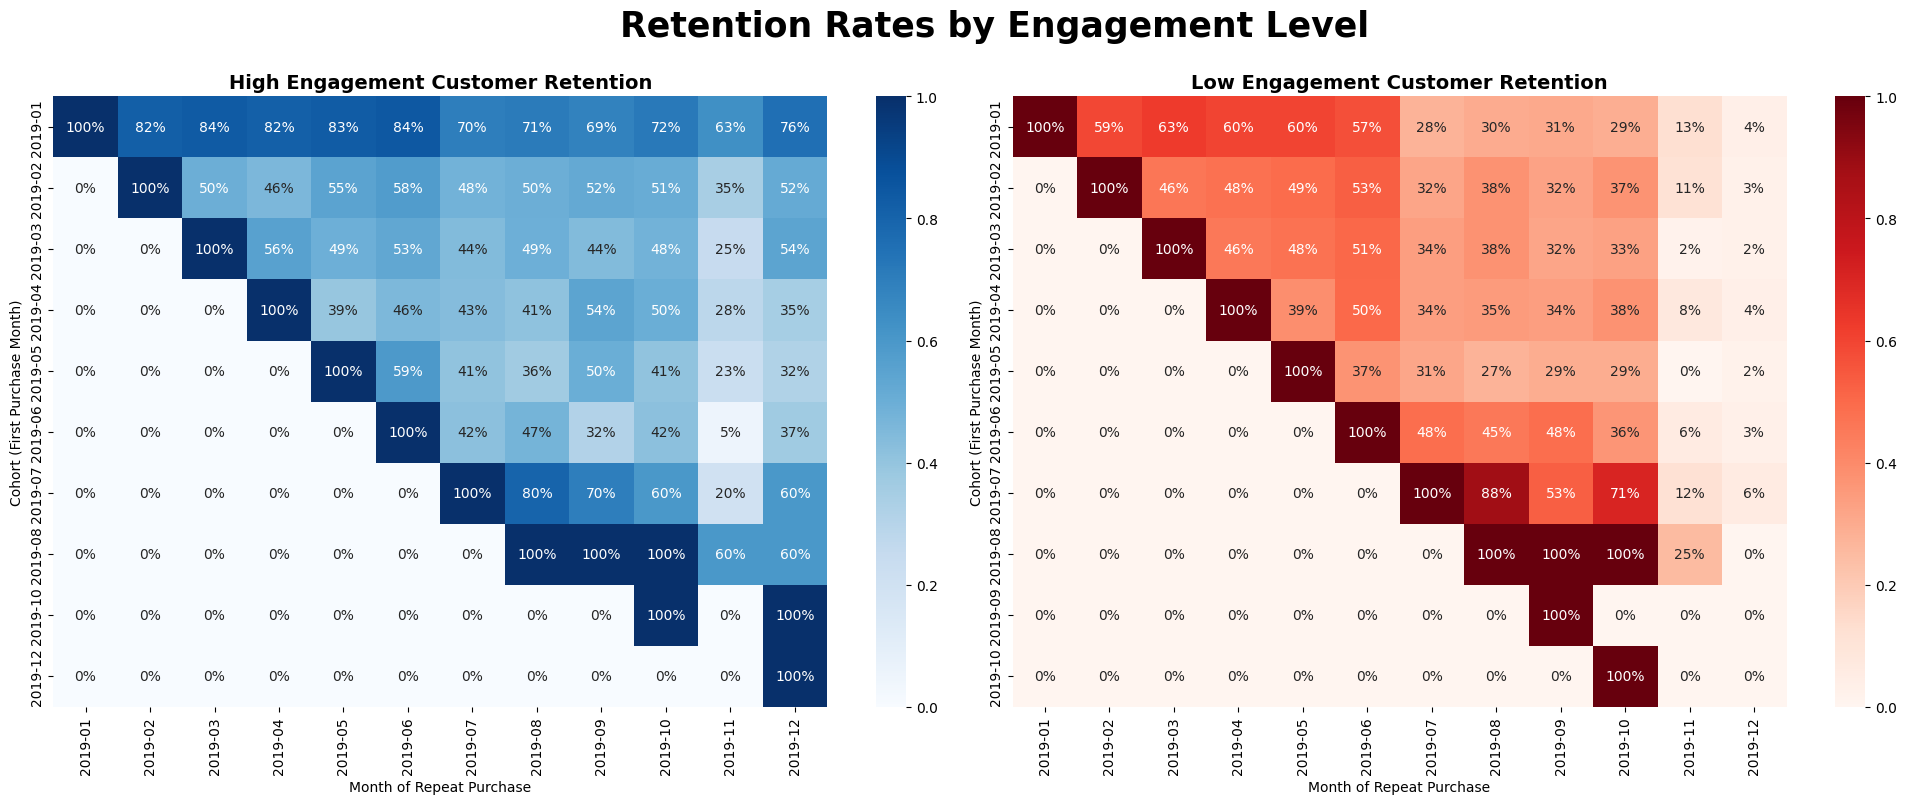

In [8]:
# Analyze Customer Engagement and Retention

# Create a 'high engagement' flag for customers based on their total engagement score
# Total engagement is calculated as the sum of open, login, and checkout counts in the last 30 days
customer_data['total_engagement'] = (customer_data['open_count_last_30_days'] +
                                     customer_data['login_count_last_30_days'] +
                                     customer_data['checkout_count_last_30_days'])

# Filter customers with engagement above the median as 'high engagement' customers
high_engagement_customers = customer_data[customer_data['total_engagement'] > customer_data['total_engagement'].median()]

# Get IDs of high engagement customers and add a flag to the orders data indicating engagement level
high_engagement_customer_ids = high_engagement_customers['customer_id']
orders_data['high_engagement'] = orders_data['customer_id'].isin(high_engagement_customer_ids).astype(int)

# Calculate retention rates for high engagement customers
# Group by first purchase month and repeat purchase month, counting unique customers per cohort
high_engagement_retention = orders_data[orders_data['high_engagement'] == 1].groupby(
    ['first_purchase', 'order_month'])['customer_id'].nunique().unstack(fill_value=0)

# Calculate initial cohort size for high engagement customers and divide by cohort size to get retention rates
high_engagement_counts = high_engagement_retention.apply(lambda x: x[x > 0].iloc[0] if x[x > 0].any() else 0, axis=1)
high_engagement_retention = high_engagement_retention.divide(high_engagement_counts, axis=0).fillna(0)

# Calculate retention rates for low engagement customers in the same way
low_engagement_retention = orders_data[orders_data['high_engagement'] == 0].groupby(
    ['first_purchase', 'order_month'])['customer_id'].nunique().unstack(fill_value=0)
low_engagement_counts = low_engagement_retention.apply(lambda x: x[x > 0].iloc[0] if x[x > 0].any() else 0, axis=1)
low_engagement_retention = low_engagement_retention.divide(low_engagement_counts, axis=0).fillna(0)

# Plot retention heatmaps for high and low engagement customers
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot high engagement retention rates in the left subplot
sns.heatmap(high_engagement_retention, annot=True, fmt=".0%", cmap="Blues", ax=axes[0])
axes[0].set_title("High Engagement Customer Retention", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Month of Repeat Purchase")
axes[0].set_ylabel("Cohort (First Purchase Month)")

# Plot low engagement retention rates in the right subplot
sns.heatmap(low_engagement_retention, annot=True, fmt=".0%", cmap="Reds", ax=axes[1])
axes[1].set_title("Low Engagement Customer Retention", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Month of Repeat Purchase")
axes[1].set_ylabel("Cohort (First Purchase Month)")

# Adjust the main title and layout for clarity
plt.suptitle("Retention Rates by Engagement Level", fontsize=25, fontweight='bold', y=1)
plt.subplots_adjust(top=0.3)  # Adjust top spacing to make room for the title
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

---

## Analysis of Retention Rates Based on Engagement Level

The heatmaps display retention rates segmented by customer engagement level, differentiating between high engagement and low engagement customers. The x-axis represents the months following the initial purchase, while the y-axis shows the cohort's first purchase month. Color intensity indicates retention rates, with darker shades representing higher retention.

### General Observations

1. **High Engagement Customers**:
   - **Retention Patterns**: High engagement customers exhibit strong initial retention, with the January 2019 cohort showing a retention rate of 100% in the first month, followed by consistently high rates (e.g., 82-84%) over the next few months.
   - **Long-Term Retention**: Retention gradually decreases over time but stabilizes at a relatively higher rate than low engagement customers. For instance, by month 6, cohorts retain about 40-50%, and by the end of the year, they retain around 20-35%.
   - **Interpretation**: High engagement customers maintain more stable retention, indicating that these customers are more likely to remain loyal and continue engaging with the brand over a longer period.

2. **Low Engagement Customers**:
   - **Retention Patterns**: Retention among low engagement customers drops significantly within the first few months. The January 2019 cohort starts with a 100% retention rate in the first month, but it drops to around 50-60% within the next two months.
   - **Long-Term Retention**: The retention rate for low engagement customers decreases sharply, stabilizing at low levels. By month 6, cohorts retain around 10-20%, and by the end of the year, retention rates fall to 0-10%.
   - **Interpretation**: Low engagement customers show minimal long-term retention, suggesting that these customers are not as invested in the brand and may require additional incentives or engagement to retain their interest.

### Key Insights

1. **High Initial Retention for Both Engagement Levels**: Both high and low engagement customers show strong initial retention, suggesting that the initial engagement strategy effectively attracts customers, regardless of their engagement level.
   
2. **Significantly Better Retention Among High Engagement Customers**: High engagement customers retain at a much higher rate over time than low engagement customers, indicating that engagement level is a strong predictor of long-term retention. This highlights the importance of fostering high engagement early in the customer journey.
   
3. **Rapid Decline in Retention for Low Engagement Customers**: Low engagement customers show a quick drop in retention, with most cohorts retaining less than 20% of customers by the middle of the year. This indicates that low engagement customers are more likely to churn, highlighting a potential area for improvement in retention strategies for this segment.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy appears **partially effective** in maintaining engagement for high engagement customers but struggles to retain low engagement customers over the long term. While the initial strategy effectively attracts both high and low engagement customers, there is a significant disparity in long-term retention rates between these two groups.

- **Effective Elements**:
   - The strategy is effective in securing initial purchases across both high and low engagement customers, as evidenced by high first-month retention rates for both segments. This suggests that initial promotions, product offerings, or onboarding strategies are successful in attracting customers initially.
   - High engagement customers exhibit sustained retention over time, indicating that the strategy is effective in building loyalty within this segment. Retention rates for high engagement customers remain relatively high even after several months, suggesting that aspects of the strategy resonate well with this group.

- **Ineffective Elements**:
   - Retention rates for low engagement customers decline sharply within the first few months, stabilizing at very low levels by the end of the year. This indicates that the strategy does not adequately address the needs or interests of low engagement customers, leading to high churn rates in this segment.
   - The lack of differentiation in retention strategies for high and low engagement customers limits the effectiveness of the strategy, particularly for the low engagement group. A one-size-fits-all approach may not be sufficient to maintain long-term interest and loyalty across varying engagement levels.

Overall, while the current retention strategy successfully engages high engagement customers over the long term, it lacks the flexibility and personalization needed to retain low engagement customers effectively.

---

## Recommendations for Further Action

1. **Tailored Engagement Strategies Based on Engagement Levels**:
   - **High Engagement Customers**:
     - **Exclusive Rewards and Recognition**: Offer loyalty rewards, early access to new products, or recognition programs (e.g., "VIP status") to sustain their high level of engagement and loyalty.
     - **Content-Driven Engagement**: Provide these customers with engaging content such as newsletters, blog posts, or product recommendations that align with their interests to keep them connected with the brand.
   - **Low Engagement Customers**:
     - **Targeted Re-Engagement Campaigns**: Implement campaigns to re-engage low engagement customers, including personalized discounts, limited-time offers, or reminders of past purchases.
     - **Incentives for Increased Engagement**: Offer incentives for these customers to increase their engagement level, such as rewards for repeat purchases, loyalty points for interactions, or discounts based on purchase frequency.

2. **Enhanced Personalization and Segmentation**:
   - **Engagement-Level-Based Segmentation**: Segment customers based on their engagement level to better understand each segment’s needs and tailor engagement strategies accordingly.
   - **Personalized Communication**: Use customer data to send personalized messages, offers, and recommendations that align with each engagement level. High engagement customers may appreciate detailed product updates, while low engagement customers may benefit from more practical, incentive-driven messaging.

3. **Introduce a Tiered Loyalty Program to Reward High Engagement**:
   - **Structured Rewards for Consistent Engagement**: Create a tiered loyalty program that offers greater rewards for customers who consistently engage with the brand. High engagement customers can earn points or reach higher tiers with exclusive benefits, while low engagement customers are incentivized to reach these higher tiers through increased activity.
   - **Gamified Elements for Engagement**: Introduce gamified aspects to the loyalty program, such as badges, levels, or progress tracking, to encourage both high and low engagement customers to stay active and engaged.

4. **Regular Feedback Collection to Address Low Engagement Pain Points**:
   - **Customer Satisfaction Surveys**: Implement periodic surveys specifically targeting low engagement customers to understand barriers to increased engagement, identify areas for improvement, and address specific pain points.
   - **Exit Surveys for Churning Customers**: Conduct exit surveys to understand why low engagement customers stop engaging with the brand and use these insights to refine retention strategies.

5. **Behavioral Retargeting and Re-Engagement Advertising**:
   - **Retargeting Ads for Low Engagement Customers**: Use retargeting ads on social media and other platforms to re-engage low engagement customers, reminding them of previous interactions or offering incentives for returning.
   - **Dynamic Email Campaigns**: Send personalized emails with product recommendations, limited-time offers, or incentives targeted at re-engaging low engagement customers.

6. **Content Marketing and Value-Added Experiences**:
   - **Educational Content for Low Engagement Customers**: Provide low engagement customers with informative content, such as tutorials, how-to guides, or product use cases, to help them realize the product's full value.
   - **Experiential Marketing for High Engagement Customers**: Offer exclusive experiences, such as online events, product demonstrations, or virtual meet-and-greet sessions, that are tailored to keep high engagement customers invested in the brand.

7. **Predictive Analytics for Proactive Retention**:
   - **Churn Prediction Models**: Develop churn prediction models based on engagement data to identify at-risk low engagement customers before they churn, allowing for timely intervention.
   - **Automated Re-Engagement Triggers**: Set up automated alerts to send personalized messages to customers identified as at-risk, encouraging re-engagement through targeted offers or content.

8. **Incorporate Social Proof and Community Engagement**:
   - **Peer Reviews and Testimonials**: Use testimonials and reviews from high engagement customers to influence low engagement customers, showcasing the value of the brand.
   - **Community Building Initiatives**: Encourage high engagement customers to participate in community forums or brand social media groups where they can share experiences, which may attract low engagement customers to become more active.

By implementing these tailored recommendations, the brand can improve retention across both high and low engagement customers, fostering long-term loyalty and strengthening customer relationships.

---

# Step 5: Analyzing Customer Retention Rates by Promotional Campaign Type

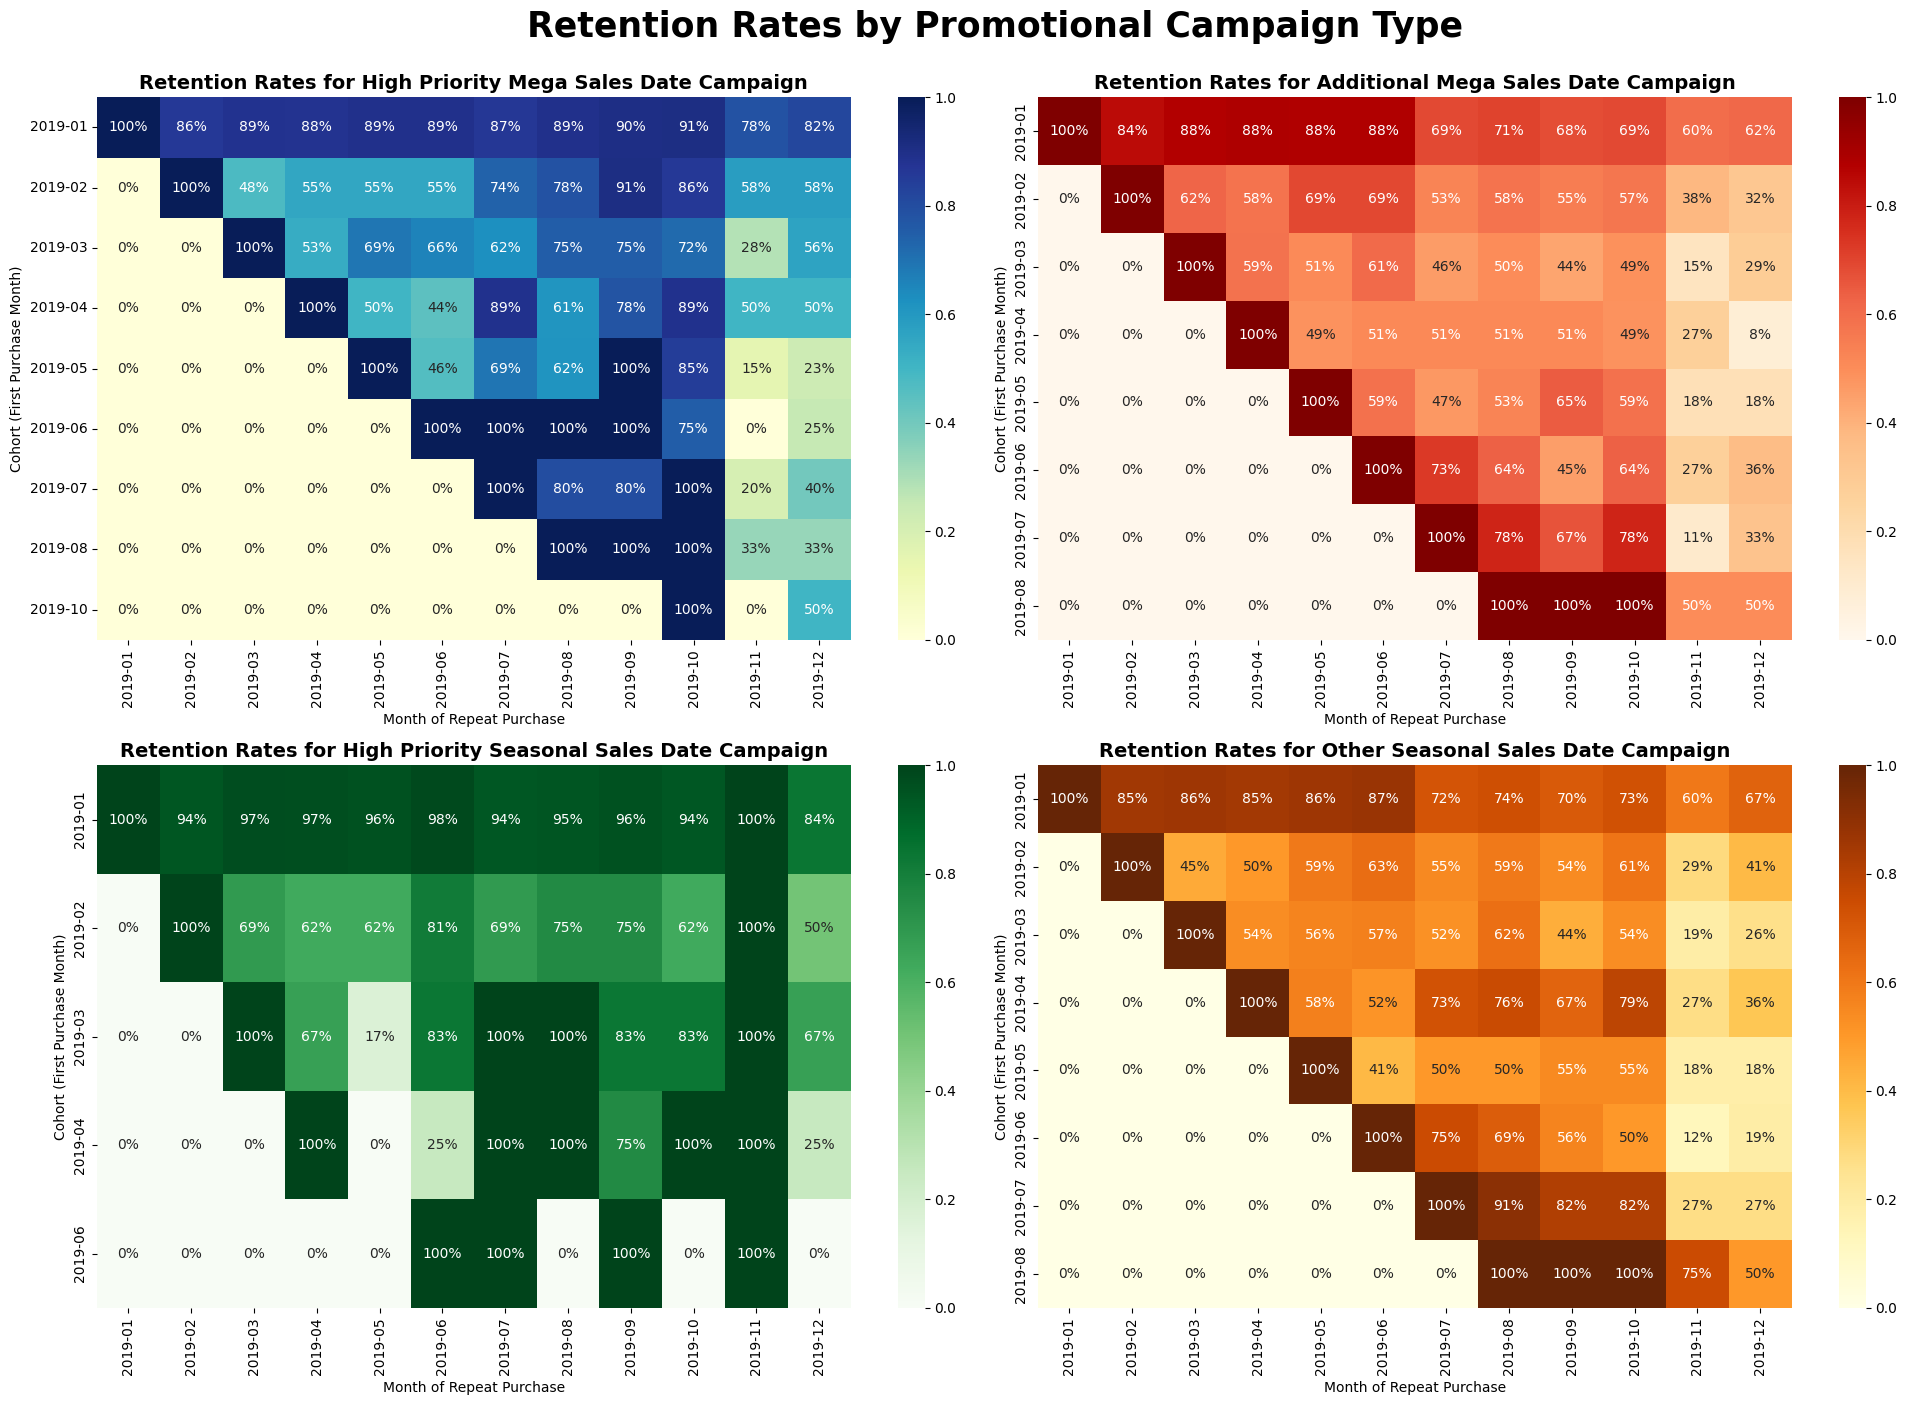

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load orders data
orders_data = pd.read_csv('../Cleaned_Datasets/orders.csv')

# Convert 'order_time' to datetime format and handle errors by setting invalid parsing as NaT
orders_data['order_time'] = pd.to_datetime(orders_data['order_time'], errors='coerce')

# Extract month from 'order_time' and create 'order_month' column with monthly periods
# Also, create 'first_purchase' column that represents each customer's first purchase month
orders_data['order_month'] = orders_data['order_time'].dt.to_period('M')
first_purchase = orders_data.groupby('customer_id')['order_month'].min()
orders_data = orders_data.join(first_purchase.rename('first_purchase'), on='customer_id')

# Define custom color maps for each campaign type
color_maps = {
    'Other Seasonal Sales Date': 'YlOrBr',
    'High Priority Mega Sales Date': 'YlGnBu',
    'High Priority Seasonal Sales Date': 'Greens',
    'Additional Mega Sales Date': 'OrRd'
}

# Specify desired order of campaigns for consistent subplot arrangement
campaign_order = [
    'High Priority Mega Sales Date',
    'Additional Mega Sales Date',
    'High Priority Seasonal Sales Date',
    'Other Seasonal Sales Date'
]

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten()  # Flatten axes array for easier iteration

# Iterate through each campaign in the specified order to plot retention data
for plot_index, promo_name in enumerate(campaign_order):
    # Identify unique customers for the current campaign
    promo_customers = orders_data[orders_data['campaign_name'] == promo_name]['customer_id'].unique()

    # Filter orders to include only those from customers who participated in this campaign
    promo_orders = orders_data[orders_data['customer_id'].isin(promo_customers)].copy()

    # Drop duplicates to ensure one purchase per customer per month
    promo_orders_unique = promo_orders.drop_duplicates(subset=['customer_id', 'order_month'])

    # Calculate retention by cohort based on first purchase month and order month
    cohort_counts = promo_orders_unique.groupby(['first_purchase', 'order_month']).size().unstack(fill_value=0)
    cohort_sizes = cohort_counts.apply(lambda x: x[x > 0].iloc[0] if x[x > 0].any() else 0, axis=1)
    retention = cohort_counts.divide(cohort_sizes, axis=0).fillna(0)

    # Skip plotting if there is no retention data
    if retention.empty:
        continue

    # Get the color map for this campaign, defaulting to 'YlGnBu' if not specified
    cmap = color_maps.get(promo_name, 'YlGnBu')

    # Plot retention rates for the current campaign in the designated subplot
    sns.heatmap(retention, annot=True, fmt=".0%", cmap=cmap, ax=axes[plot_index], vmin=0, vmax=1)
    axes[plot_index].set_title(f"Retention Rates for {promo_name} Campaign", fontsize=14, fontweight='bold')
    axes[plot_index].set_xlabel("Month of Repeat Purchase")
    axes[plot_index].set_ylabel("Cohort (First Purchase Month)")

# Add a title for the entire figure and adjust layout
plt.suptitle("Retention Rates by Promotional Campaign Type", fontsize=25, fontweight='bold', y=1)
plt.subplots_adjust(top=0.3)  # Adjust top spacing for the title
plt.tight_layout()  # Adjust layout for clarity
plt.show()

---

## Analysis of Retention Rates Based on Promotional Campaign Type

The heatmaps show retention rates across different promotional campaign types, with high priority campaigns and additional mega sales campaigns on the top and high priority seasonal sales dates and other seasonal sales dates on the bottom. The x-axis represents the months following the initial purchase, while the y-axis indicates the cohort's first purchase month. Color intensity represents retention rates, with darker colors signifying higher retention.

### General Observations

1. **High Priority Mega Sales Date Campaign**:
   - **Retention Patterns**: High priority mega sales campaigns show strong initial retention rates, with many cohorts maintaining 80-90% retention in the early months. For example, the January 2019 cohort sustains 80-90% for up to six months.
   - **Long-Term Retention**: Although retention declines over time, it remains relatively high compared to other campaigns, with some cohorts retaining around 50% by the end of the year.
   - **Interpretation**: This campaign type successfully attracts customers and maintains a strong retention rate over time, suggesting that high-priority mega sales dates are effective in driving long-term engagement.

2. **Additional Mega Sales Date Campaign**:
   - **Retention Patterns**: Retention rates for additional mega sales date campaigns are lower than high-priority campaigns, with a steeper decline after the first few months. The January 2019 cohort starts with a strong retention rate but quickly decreases to around 60-70%.
   - **Long-Term Retention**: Retention stabilizes at a lower rate, with most cohorts retaining less than 30% of customers by the end of the year.
   - **Interpretation**: While additional mega sales campaigns attract initial interest, they are less effective in retaining customers over the long term compared to high priority campaigns.

3. **High Priority Seasonal Sales Date Campaign**:
   - **Retention Patterns**: High priority seasonal campaigns exhibit excellent retention, with retention rates often exceeding 90% in the early months. The January 2019 cohort, for instance, retains more than 95% for the first several months.
   - **Long-Term Retention**: Retention remains strong, with some cohorts retaining over 60% of customers even after 12 months, indicating a high level of customer engagement and loyalty.
   - **Interpretation**: High priority seasonal sales dates are highly effective for customer retention, making this campaign type particularly valuable for long-term engagement.

4. **Other Seasonal Sales Date Campaign**:
   - **Retention Patterns**: Retention rates for other seasonal sales dates are moderate initially and decline relatively quickly compared to high priority campaigns. For example, the January 2019 cohort starts with around 85% retention but drops to 40-50% by month 6.
   - **Long-Term Retention**: Retention stabilizes at low levels by the end of the year, with most cohorts retaining less than 30% of customers.
   - **Interpretation**: While these campaigns attract initial interest, they do not retain customers as effectively as high-priority seasonal sales, suggesting they may benefit from additional engagement tactics.

### Key Insights

1. **Higher Retention with High Priority Campaigns**: Both high priority mega sales and high priority seasonal sales campaigns demonstrate significantly higher retention rates over time compared to additional mega sales and other seasonal sales dates. This indicates that prioritizing certain campaigns can lead to stronger customer loyalty.
   
2. **Retention Challenges with Additional Campaigns**: Retention rates for additional mega sales and other seasonal sales dates decline rapidly, indicating that these campaigns may lack elements that encourage long-term engagement.

3. **Importance of Campaign Type in Retention Strategy**: The data suggests that campaign type plays a crucial role in retention. High priority campaigns (whether mega or seasonal) are more effective in retaining customers than additional or lower-priority campaigns.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy appears **effective in the short term** for all campaign types but **only sustains long-term retention** for high priority campaigns. While initial retention rates are high across all campaign types, there is a significant disparity in long-term retention between high priority and additional campaigns.

- **Effective Elements**:
   - High priority campaigns (both mega sales and seasonal) show strong retention over time, suggesting that the strategy for these campaigns effectively promotes sustained customer engagement.
   - The initial retention rates across all campaigns are high, indicating that promotional efforts are successful in attracting customers initially, regardless of campaign type.

- **Ineffective Elements**:
   - Retention rates for additional mega sales and other seasonal campaigns decline significantly within a few months, stabilizing at lower levels by the end of the year. This suggests that these campaign types may not be providing enough value or incentives to maintain long-term customer interest.
   - The lack of differentiated retention tactics for high priority versus additional campaigns limits the overall effectiveness of the strategy. A tailored approach may be needed to enhance long-term retention across different campaign types.

Overall, the current retention strategy works well for high priority campaigns but requires additional tactics for sustaining engagement in additional and lower-priority campaigns.

---

## Recommendations for Further Action

1. **Enhance Engagement for Additional and Other Seasonal Campaigns**:
   - **Personalized Post-Campaign Follow-Ups**: Implement follow-up messages or offers after additional and other seasonal campaigns, tailored to customer preferences, to encourage repeat purchases.
   - **Targeted Loyalty Incentives**: Offer loyalty points, exclusive discounts, or early access to future campaigns to customers who participated in these lower-priority campaigns, encouraging them to stay engaged.

2. **Prioritize High-Impact Campaigns with Long-Term Engagement Elements**:
   - **Exclusive Membership Benefits for High Priority Campaigns**: Provide exclusive membership perks for customers participating in high priority campaigns, such as access to special events, additional discounts, or members-only products.
   - **Reward Frequent Participants in High Priority Campaigns**: Create a reward program specifically for customers who consistently shop during high priority mega and seasonal sales, fostering loyalty through consistent incentives.

3. **Introduce Tiered Campaign Strategy Based on Engagement Potential**:
   - **High vs. Additional Campaign Differentiation**: Separate campaign strategies based on potential long-term engagement. High priority campaigns could focus on premium benefits, while additional campaigns could offer accessible, engagement-boosting benefits.
   - **Engagement Tiers within Campaigns**: Offer engagement tiers within each campaign type, where high spenders or repeat customers receive special rewards or recognition, encouraging continued participation across campaigns.

4. **Utilize Data Analytics to Tailor Campaign Offers**:
   - **Predictive Analytics for Customer Segmentation**: Use predictive models to identify customers likely to engage in high priority campaigns and target them with tailored offers that align with their shopping preferences.
   - **Behavioral Targeting**: Apply insights from customer behavior to send personalized campaign reminders, product recommendations, or exclusive previews before each sales event, increasing the likelihood of repeat participation.

5. **Experiment with Campaign-Specific Engagement Tactics**:
   - **Exclusive Content and Previews for High Priority Campaigns**: Share sneak peeks, behind-the-scenes content, or early-bird access to build excitement and reinforce loyalty in the days leading up to high priority campaigns.
   - **Time-Sensitive Offers for Additional Campaigns**: Use time-limited promotions to create urgency in additional campaigns, encouraging faster purchases and repeat participation.

6. **Develop Retention Tracking for Different Campaign Types**:
   - **Monthly Retention Monitoring by Campaign Type**: Implement a monthly retention tracking system for each campaign type to identify trends, compare engagement levels, and make timely adjustments.
   - **Customer Feedback on Campaign Experiences**: Collect customer feedback specific to each campaign type to gain insights into preferences, satisfaction, and areas for improvement, allowing for more targeted enhancements.

By implementing these strategies, the brand can improve retention rates across all promotional campaign types, building a more robust and tailored approach that enhances both short-term and long-term customer loyalty.

---

# **Comprehensive Analysis of Customer Lifetime Value (CLV)**

# Step 1: Analyzing Monthly Customer Lifetime Value (CLV)

    order_year  order_month  total_revenue  total_purchases  \
0         2019            1  349063.714896             7578   
1         2019            2  280160.374411             7516   
2         2019            3  343452.983576             8492   
3         2019            4  296869.442510             7785   
4         2019            5  307660.973879             8700   
5         2019            6  290758.671516             8849   
6         2019            7  276514.003295             6797   
7         2019            8  258091.435796             7906   
8         2019            9  265399.653928             7111   
9         2019           10  244604.526124             7316   
10        2019           11  239564.227511             6511   
11        2019           12  213851.631456             6784   

    average_purchase_value  average_purchase_frequency  \
0                46.062776                    5.563877   
1                37.275196                    5.458243   
2     

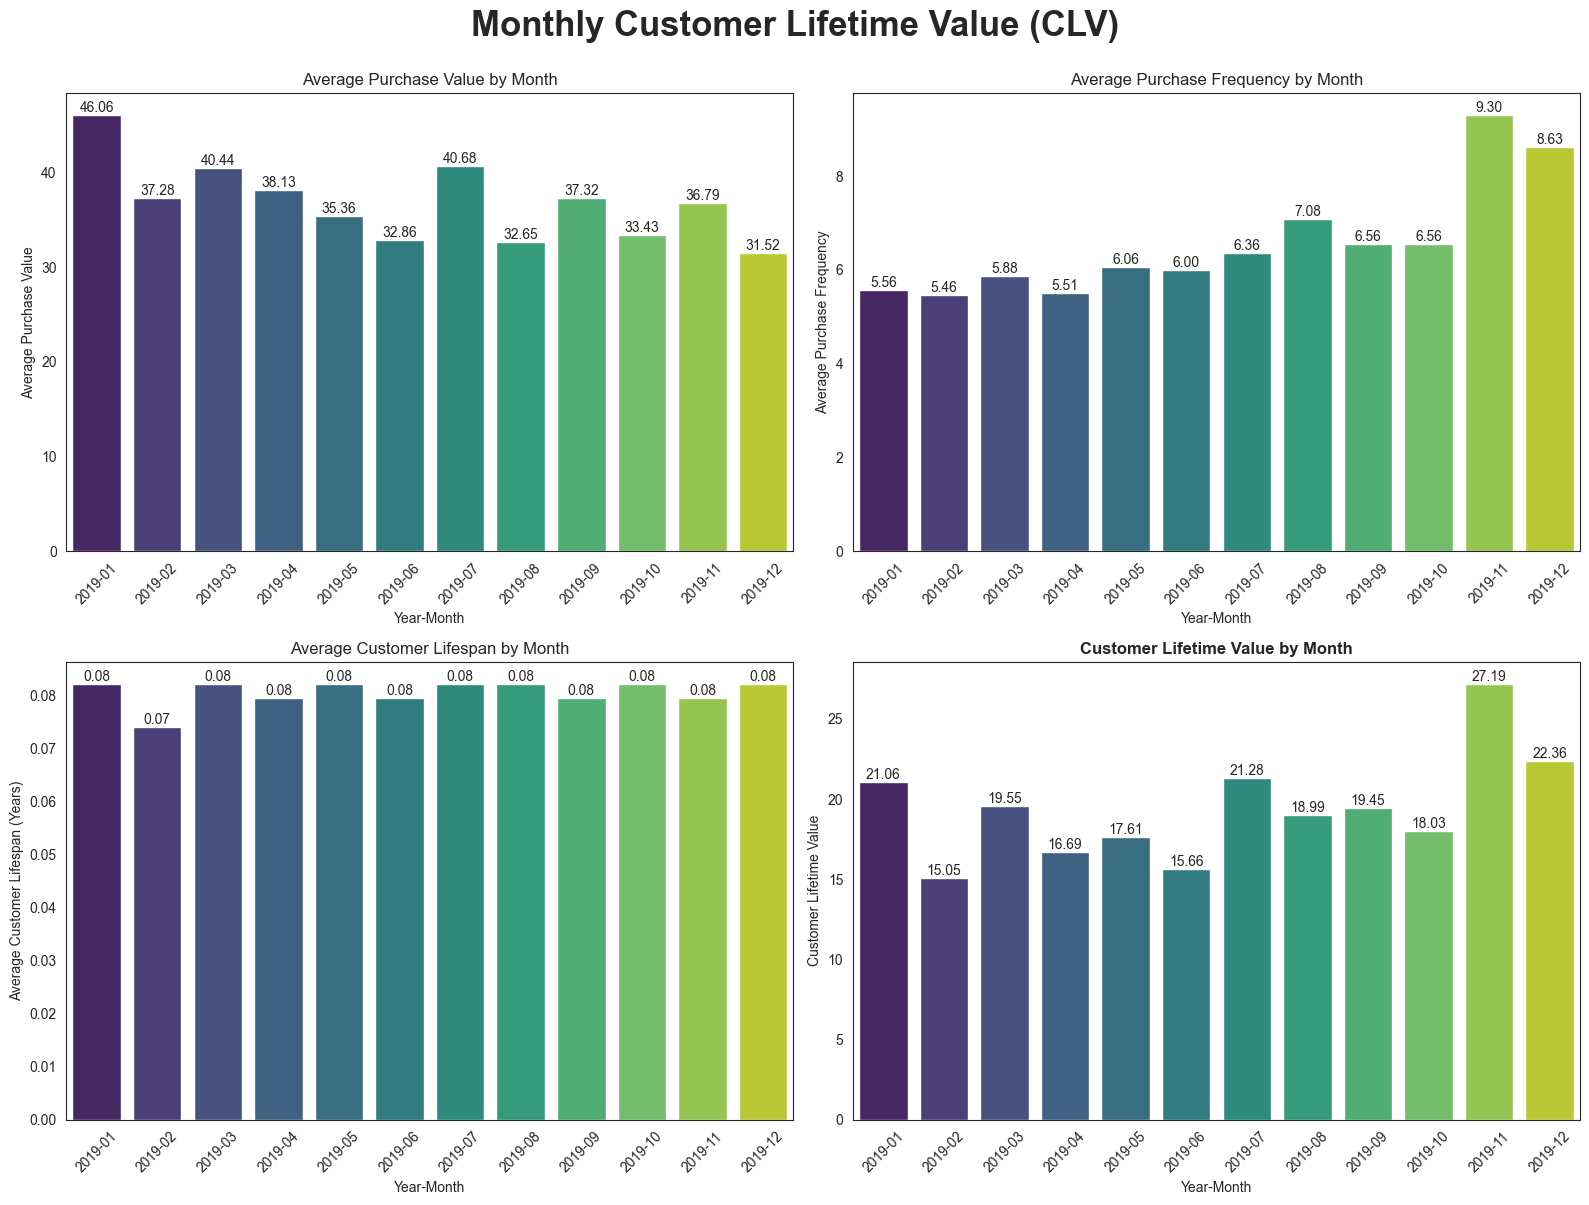

Overall Customer Lifetime Value (CLV): 19.5582437910314


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the products and orders data
products_cleaned = pd.read_csv('../Cleaned_Datasets/products_cleaned.csv')
orders_data = pd.read_csv('../Cleaned_Datasets/orders.csv')

# Merge orders data with product prices to create sales data
sales_data = pd.merge(orders_data, products_cleaned[['product_id', 'price_actual']], on='product_id', how='left')

# Convert 'order_time' to datetime format if it’s not already
sales_data['order_time'] = pd.to_datetime(sales_data['order_time'], errors='coerce')

# Extract the year and month of each order
sales_data['order_year'] = sales_data['order_time'].dt.year
sales_data['order_month'] = sales_data['order_time'].dt.month

# Calculate revenue per order by subtracting any additional discount from the actual price
sales_data['revenue'] = sales_data['price_actual'] - sales_data.get('additional_discount', 0)

# Aggregate data to calculate total revenue and unique purchases per month
monthly_grouped = sales_data.groupby(['order_year', 'order_month']).agg(
    total_revenue=('revenue', 'sum'),
    total_purchases=('order_id', 'nunique')
).reset_index()

# Calculate Average Purchase Value (APV) for each month
monthly_grouped['average_purchase_value'] = monthly_grouped['total_revenue'] / monthly_grouped['total_purchases']

# Calculate the number of purchases per customer each month
purchases_per_customer_monthly = sales_data.groupby(['customer_id', 'order_year', 'order_month'])['order_id'].nunique().reset_index()

# Calculate Average Purchase Frequency (APF) per month
average_purchase_frequency_monthly = purchases_per_customer_monthly.groupby(['order_year', 'order_month'])['order_id'].mean().reset_index()
average_purchase_frequency_monthly.rename(columns={'order_id': 'average_purchase_frequency'}, inplace=True)

# Merge average purchase frequency with monthly grouped data
monthly_grouped = monthly_grouped.merge(average_purchase_frequency_monthly, on=['order_year', 'order_month'], how='left')

# Calculate the lifespan (in days) for each customer from their first to last order
customer_lifespans = sales_data.groupby(['customer_id']).agg(min_date=('order_time', 'min'), max_date=('order_time', 'max')).reset_index()
customer_lifespans['lifespan_days'] = (customer_lifespans['max_date'] - customer_lifespans['min_date']).dt.days

# Calculate the average customer lifespan (in days) per month
monthly_lifespan = sales_data.groupby(['order_year', 'order_month'])['order_time'].apply(
    lambda x: (x.max() - x.min()).days
).reset_index(name='average_customer_lifespan_days')

# Convert lifespan from days to years for easier interpretation
monthly_lifespan['average_customer_lifespan_years'] = monthly_lifespan['average_customer_lifespan_days'] / 365

# Merge average customer lifespan with the monthly grouped data
monthly_grouped = monthly_grouped.merge(monthly_lifespan[['order_year', 'order_month', 'average_customer_lifespan_years']], on=['order_year', 'order_month'], how='left')

# Calculate Customer Lifetime Value (CLV) for each month
monthly_grouped['customer_lifetime_value'] = (
    monthly_grouped['average_purchase_value'] *
    monthly_grouped['average_purchase_frequency'] *
    monthly_grouped['average_customer_lifespan_years']
)

# Display the key metrics for each month
print(monthly_grouped[['order_year', 'order_month', 'total_revenue', 'total_purchases', 'average_purchase_value',
                      'average_purchase_frequency', 'average_customer_lifespan_years',
                      'customer_lifetime_value']])

# Combine Year and Month columns to create a single column for the x-axis
monthly_grouped['YearMonth'] = monthly_grouped['order_year'].astype(str) + '-' + monthly_grouped['order_month'].astype(str).str.zfill(2)

# Set a white background style and generate a color palette for the bar plots
sns.set_style("white")
palette = sns.color_palette("viridis", len(monthly_grouped['YearMonth']))

# Create a 2x2 grid of plots for visualizing key metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('white')  # Set the figure background to white

# Plot Average Purchase Value by Month
sns.barplot(x='YearMonth', y='average_purchase_value', data=monthly_grouped, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Average Purchase Value by Month')
axes[0, 0].set_xlabel('Year-Month')
axes[0, 0].set_ylabel('Average Purchase Value')
axes[0, 0].tick_params(axis='x', rotation=45)
for container in axes[0, 0].containers:  # Add labels to each bar
    axes[0, 0].bar_label(container, fmt="%.2f", label_type="edge")
axes[0, 0].grid(False)  # Remove grid lines for a cleaner look

# Plot Average Purchase Frequency by Month
sns.barplot(x='YearMonth', y='average_purchase_frequency', data=monthly_grouped, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Average Purchase Frequency by Month')
axes[0, 1].set_xlabel('Year-Month')
axes[0, 1].set_ylabel('Average Purchase Frequency')
axes[0, 1].tick_params(axis='x', rotation=45)
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt="%.2f", label_type="edge")
axes[0, 1].grid(False)

# Plot Average Customer Lifespan by Month
sns.barplot(x='YearMonth', y='average_customer_lifespan_years', data=monthly_grouped, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Average Customer Lifespan by Month')
axes[1, 0].set_xlabel('Year-Month')
axes[1, 0].set_ylabel('Average Customer Lifespan (Years)')
axes[1, 0].tick_params(axis='x', rotation=45)
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt="%.2f", label_type="edge")
axes[1, 0].grid(False)  

# Plot Customer Lifetime Value by Month
sns.barplot(x='YearMonth', y='customer_lifetime_value', data=monthly_grouped, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Customer Lifetime Value by Month', fontweight='bold')
axes[1, 1].set_xlabel('Year-Month')
axes[1, 1].set_ylabel('Customer Lifetime Value')
axes[1, 1].tick_params(axis='x', rotation=45)
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt="%.2f", label_type="edge")
axes[1, 1].grid(False)

# Set a super title and adjust spacing
plt.suptitle("Monthly Customer Lifetime Value (CLV)" , fontsize=25, fontweight='bold', y = 1)
plt.subplots_adjust(top=0.3)  # Adjust top spacing for the super title
plt.tight_layout()  # Adjust layout for readability
plt.show()

# Calculate overall averages across all months
overall_average_purchase_value = monthly_grouped['average_purchase_value'].mean()
overall_average_purchase_frequency = monthly_grouped['average_purchase_frequency'].mean()
overall_average_customer_lifespan_years = monthly_grouped['average_customer_lifespan_years'].mean()

# Calculate the overall CLV based on average metrics
overall_clv = (
    overall_average_purchase_value *
    overall_average_purchase_frequency *
    overall_average_customer_lifespan_years
)

print("Overall Customer Lifetime Value (CLV):", overall_clv)

---

## Analysis of Monthly Customer Lifetime Value

The Customer Lifetime Value (CLV) metric is a powerful indicator of the total revenue a company can expect from a customer throughout their relationship. Understanding CLV on a month-to-month basis allows businesses to measure the effectiveness of their engagement and retention strategies over time. By examining the trends in average purchase value, purchase frequency, and customer lifespan, we can pinpoint how well current strategies are working to maintain customer engagement and foster long-term loyalty.

### CLV Calculation
To calculate **Customer Lifetime Value (CLV)**, we use three key components:

1. **Average Purchase Value (APV)**: This is the mean revenue generated per purchase each month. It is calculated as:
   - **APV = Total Revenue / Total Purchases**
   - A high APV indicates that customers are making valuable purchases, which can be influenced by factors like product pricing and promotional discounts.

2. **Average Purchase Frequency (APF)**: This metric captures the average number of purchases a customer makes within a month. It is calculated by taking the average of each customer's monthly purchases:
   - **APF = Average Number of Purchases per Customer in a Month**
   - APF is crucial as it indicates how frequently customers are engaging with the brand. High APF values suggest strong brand engagement, with customers returning often.

3. **Average Customer Lifespan**: This represents the average duration (in years) a customer remains actively engaged with the brand. It is calculated by finding the time between a customer’s first and last purchase and averaging across all customers:
   - **Average Lifespan (Years) = Days between First and Last Purchase / 365**
   - A longer lifespan indicates that customers are staying with the brand for an extended period, contributing to sustained revenue.

Using these components, **Customer Lifetime Value (CLV)** is calculated as:
   - **CLV = APV * APF * Average Customer Lifespan (Years)**
   
This formula provides a holistic view of the total value that each customer can bring to the company, considering their spending habits, frequency of purchases, and length of engagement.

---

### Monthly Breakdown of Key Factors

1. **Average Purchase Value by Month**:
   - **Overview**: The APV fluctuates throughout the year, with significant peaks in January and May where values exceed $40. This variation in APV could be linked to seasonal promotions, high-priority campaigns, or holiday periods that encourage higher spending per transaction.
   - **Seasonal Influence**: Mid-year months, such as June and December, have lower APVs (around $32), possibly due to reduced consumer interest or less impactful promotions.
   - **Interpretation**: Higher APV months suggest that campaigns targeting these periods are effective in encouraging larger purchases. The drop in APV during other months may signal a need to maintain interest or enhance the appeal of products and services outside peak seasons.

2. **Average Purchase Frequency by Month**:
   - **Overview**: The APF varies, with October and November showing particularly high engagement, reaching up to 9.30 and 8.63, respectively. These values indicate that customers are making more purchases per month during these periods, likely due to seasonal or promotional events.
   - **Engagement Patterns**: Early months, such as January through March, display moderate purchase frequencies, averaging around 5-6 purchases per customer. This indicates consistent but not intensive engagement during these months.
   - **Interpretation**: The peaks in purchase frequency during October and November align with seasonal sales, which likely play a key role in boosting engagement. However, to create more balanced engagement, strategies to maintain frequency in non-peak months could be explored.

3. **Average Customer Lifespan**:
   - **Overview**: The average customer lifespan remains short and stable at around 0.08 years (approximately one month). This brief lifespan implies that many customers are making purchases only within a limited period before disengaging.
   - **Interpretation**: The short lifespan highlights a potential gap in retention efforts, as customers are not staying with the brand for extended periods. Improving the lifespan could significantly enhance overall CLV by encouraging repeat purchases over a longer timeframe.

4. **Customer Lifetime Value (CLV) by Month**:
   - **Overview**: CLV fluctuates significantly across months, with notable highs in January, July and November ($21.06, $21.28 and $27.19, respectively), while other months, such as February and June, show lower values around $15.
   - **Seasonal Impact**: CLV peaks during high-purchase months, indicating that promotions and targeted campaigns effectively increase customer value during these times.
   - **Interpretation**: The high CLV values in certain months show that campaigns can drive short-term engagement and revenue, but the fluctuations suggest that sustained engagement is lacking. A more balanced approach could help maintain a steady CLV across all months.

### Key Insights

1. **Seasonal Campaigns Significantly Boost CLV**: The highest CLV values are observed during peak promotional months (e.g., January and November), indicating that these campaigns effectively increase customer spending and engagement.
2. **Short Customer Lifespan Limits Long-Term CLV Growth**: Despite successful initial engagement, the short average lifespan suggests that customers disengage quickly. Enhancing retention strategies to prolong the lifespan could lead to more consistent revenue streams.
3. **Inconsistent CLV Trends Across the Year**: The sharp peaks and valleys in CLV reveal a reliance on seasonal promotions for customer engagement, suggesting that a more consistent strategy might yield steadier long-term results.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy is **effective in generating short-term engagement** but **falls short in sustaining long-term customer relationships**. While the seasonal campaigns successfully boost purchase frequency and value, the limited customer lifespan indicates that these efforts are not fostering prolonged engagement.

- **Effective Elements**:
   - **High Engagement During Campaigns**: Seasonal sales and targeted promotions are effective in driving repeat purchases, especially in months like January, July, and November. These efforts increase CLV during specific periods.
   - **Initial Attraction**: Promotional tactics successfully attract customers and encourage multiple purchases within the campaign period, indicating effective short-term engagement strategies.

- **Ineffective Elements**:
   - **Lack of Sustained Engagement**: The retention strategy lacks mechanisms to maintain customer interest post-campaign, resulting in a short average lifespan. This suggests that the strategy fails to foster loyalty beyond the initial purchase period.
   - **Inconsistent CLV**: Monthly CLV fluctuations highlight that engagement is not consistent year-round. Customers are not motivated to stay active outside promotional events, which limits long-term revenue potential.

Overall, while the strategy generates strong engagement during targeted campaigns, it lacks the continuity needed for sustained customer relationships, leading to missed opportunities for steady revenue growth.

---

## Recommendations for Further Action

1. **Implement a Tiered Loyalty Program to Foster Long-Term Engagement**:
   - **Objective**: Extend customer lifespan and drive repeat purchases beyond promotional periods.
   - **Action**: Introduce a tiered loyalty program that rewards customers based on their purchase frequency and amount. Offer perks like exclusive discounts, early access to new products, or rewards points that can be redeemed over time.
   - **Priority**: High — A loyalty program could help stabilize engagement, encouraging customers to return regularly and boosting CLV throughout the year.

2. **Personalized Post-Campaign Retention Strategies**:
   - **Objective**: Retain customers who engage during campaigns by encouraging repeat purchases after the event.
   - **Action**: Send personalized emails to customers who made purchases during campaigns, with follow-up offers or product recommendations tailored to their interests.
   - **Priority**: Medium — Personalized follow-ups can leverage the momentum from campaigns to keep customers engaged, extending their lifespan.

3. **Monthly Engagement Events to Normalize CLV**:
   - **Objective**: Reduce reliance on seasonal campaigns by driving regular engagement each month.
   - **Action**: Launch smaller, targeted engagement events each month, such as flash sales or exclusive deals, to encourage continuous customer activity.
   - **Priority**: Medium — Monthly events can prevent sharp drops in engagement and provide a more balanced approach to retaining customers.

4. **Data-Driven Personalization for Improved Retention**:
   - **Objective**: Enhance CLV by tailoring marketing efforts to individual customer preferences.
   - **Action**: Use customer purchase history and engagement data to create personalized offers, product suggestions, and reminders that align with each customer’s preferences.
   - **Priority**: High — Personalized marketing can increase engagement by delivering relevant content, encouraging repeat purchases, and building loyalty.

5. **Introduce a Subscription or Membership Program**:
   - **Objective**: Drive consistent revenue and strengthen customer relationships.
   - **Action**: Offer a membership model with benefits like free shipping, exclusive discounts, or VIP access. A subscription model could also encourage monthly engagement.
   - **Priority**: Low to Medium — While a subscription or membership program requires initial investment and testing, it could provide long-term stability in customer engagement and CLV.

6. **Regularly Monitor and Adjust CLV Metrics**:
   - **Objective**: Identify trends and adjust strategies to optimize CLV growth.
   - **Action**: Develop a dashboard to track monthly metrics, including APV, APF, and CLV. Regularly analyze the data to assess the effectiveness of retention efforts and make adjustments as needed.
   - **Priority**: High — Continuous monitoring allows for data-driven decision-making, enabling timely interventions to improve retention strategies.

7. **Customer Feedback Mechanism for Continuous Improvement**:
   - **Objective**: Gather insights into customer preferences and pain points for ongoing retention optimization.
   - **Action**: Collect feedback through surveys and reviews, focusing on satisfaction with purchasing processes, campaigns, and loyalty programs.
   - **Priority**: Medium — Customer feedback can guide future engagement tactics and highlight areas where retention efforts may need improvement.

---

## Step 1.1: Calculating and Evaluating the Customer Acquisition Cost (CAC) in Relation to Customer Lifetime Value (CLV)

In [11]:
import pandas as pd

# Load datasets
orders = pd.read_csv('../Cleaned_Datasets/orders.csv')
campaign_data = pd.read_csv('../Cleaned_Datasets/synthetic_campaign_data.csv')

# Section 1: Convert Dates to Datetime Format
# Convert 'order_time' in orders and 'start_date'/'end_date' in campaign_data to datetime format for accurate comparisons
orders['order_time'] = pd.to_datetime(orders['order_time'], errors='coerce')
campaign_data['start_date'] = pd.to_datetime(campaign_data['start_date'], errors='coerce')
campaign_data['end_date'] = pd.to_datetime(campaign_data['end_date'], errors='coerce')

# Section 2: Calculate First Order Date for Each Customer
# Group by 'customer_id' to find each customer's first purchase date
first_order_dates = orders.groupby('customer_id')['order_time'].min().reset_index()
first_order_dates.columns = ['customer_id', 'first_order_date']

# Section 3: Merge Campaign Data with First Order Dates
# Merge campaign data with the calculated first order dates to identify new customers during campaign periods
campaign_customers = pd.merge(campaign_data, first_order_dates, on='customer_id', how='inner')

# Section 4: Identify New Customers Acquired During Campaigns
# Filter for customers whose first purchase date falls within their campaign's active period
new_customers_during_campaigns = campaign_customers[
    (campaign_customers['first_order_date'] >= campaign_customers['start_date']) &
    (campaign_customers['first_order_date'] <= campaign_customers['end_date'])
]

# Calculate the number of unique new customers acquired during campaigns
new_customers_count = new_customers_during_campaigns['customer_id'].nunique()
print("New Customers Acquired during Campaigns:", new_customers_count)

# Section 5: Calculate Total Campaign Cost
# Sum up the campaign costs from campaign data
total_campaign_cost = campaign_data['campaign_cost'].sum()
print("Total Campaign Cost:", total_campaign_cost)

# Section 6: Calculate Customer Acquisition Cost (CAC)
# Calculate CAC by dividing the total campaign cost by the number of new customers acquired during campaigns
cac = total_campaign_cost / new_customers_count
print("Customer Acquisition Cost (CAC):", cac)

# Interpretation of CAC
print(f"The calculated CAC is {cac:.2f}, which can now be compared with the CLV to assess acquisition efficiency.")

# Section 7: Calculate CLV-to-CAC Ratio
# CLV value obtained from a previous calculation
average_clv = 19.5582437910314

# Calculate the CLV-to-CAC ratio for evaluating acquisition cost efficiency
clv_to_cac_ratio = average_clv / cac
print("Customer Lifetime Value (CLV):", average_clv)
print("Customer Acquisition Cost (CAC):", cac)
print("CLV-to-CAC Ratio:", clv_to_cac_ratio)

# Interpretation of CLV-to-CAC Ratio
# Evaluate the CLV-to-CAC ratio and provide insights on acquisition cost efficiency
if clv_to_cac_ratio >= 3:
    print("The CLV-to-CAC ratio is favorable (>=3), indicating efficient acquisition costs.")
elif clv_to_cac_ratio >= 1:
    print("The CLV-to-CAC ratio is moderate. Consider improving CLV or reducing CAC.")
else:
    print("The CLV-to-CAC ratio is low (<1), suggesting that acquisition costs may be too high relative to customer value.")


New Customers Acquired during Campaigns: 475
Total Campaign Cost: 550686991
Customer Acquisition Cost (CAC): 1159341.0336842106
The calculated CAC is 1159341.03, which can now be compared with the CLV to assess acquisition efficiency.
Customer Lifetime Value (CLV): 19.5582437910314
Customer Acquisition Cost (CAC): 1159341.0336842106
CLV-to-CAC Ratio: 1.6870138486238393e-05
The CLV-to-CAC ratio is low (<1), suggesting that acquisition costs may be too high relative to customer value.


---

## Analysis of Customer Acquisition Cost (CAC) and CLV-to-CAC Ratio

The goal of this analysis is to assess the efficiency of acquisition costs during promotional campaigns by comparing the **Customer Acquisition Cost (CAC)** with the **Customer Lifetime Value (CLV)**.

**Customer Acquisition Cost (CAC)** represents the average cost incurred to acquire a new customer through campaign efforts. It is calculated by dividing the total campaign expenses by the number of new customers gained during these promotional periods. A lower CAC means it costs less to acquire each customer, which can be desirable if the acquired customers bring high long-term value to the business.

To evaluate if these acquisition costs are worthwhile, the **CLV-to-CAC Ratio** is used. This ratio compares the expected revenue a customer will bring throughout their relationship with the brand (CLV) against the cost of acquiring them (CAC). It provides insight into whether the company’s marketing spend is being used effectively.

### Insights from the Analysis

1. **New Customer Acquisition through Campaigns**:
   The analysis identified the number of unique new customers acquired during the campaigns by filtering for customers whose first purchase occurred within the campaign period. This metric helps to understand how effective the campaigns are in attracting new customers.

2. **Total Campaign Costs**:
   By summing all campaign-related expenses, we gain a clear view of the investment made in customer acquisition efforts. This total cost is an essential factor for calculating CAC.

3. **Calculation of CAC**:
   Dividing the total campaign cost by the number of new customers acquired gives us the average CAC, representing the cost per customer. A high CAC indicates that acquisition is expensive relative to the volume of new customers gained, while a low CAC implies a more cost-effective acquisition strategy.

4. **CLV-to-CAC Ratio**:
   The **CLV-to-CAC Ratio** is a critical metric in evaluating acquisition efficiency. A high CLV-to-CAC ratio (≥3) typically suggests that acquisition costs are justified and that the customers acquired bring substantial long-term value. A moderate ratio (between 1 and 3) may indicate room for improvement in either CLV or CAC. A low ratio (<1), as observed in this analysis, implies that the cost to acquire customers may be too high relative to the revenue they generate.

5. **Interpretation of Findings**:
   In this case, the low CLV-to-CAC ratio (<1) suggests that **current acquisition costs may not be sustainable**, as the lifetime value generated by these customers does not justify the high acquisition costs. This result highlights a potential inefficiency in campaign spending, indicating that the brand is spending more on acquiring customers than they are likely to bring in revenue.

---

### Conclusion:
Since the **CLV-to-CAC Ratio** is low, it is essential to dig deeper into the **Customer Lifetime Value (CLV)** by breaking it down across various customer segments. Analyzing CLV by attributes such as **age**, **gender**, **campaign type**, and **engagement level** allows us to pinpoint specific segments that may be driving profitability or, conversely, adding to acquisition inefficiency. This segmented analysis will highlight which customer groups are bringing the most value to the brand and which may need more focused retention strategies to enhance their lifetime value.

By identifying high-CLV segments, the company can tailor its acquisition and retention strategies to attract and retain these profitable groups, ultimately improving the overall CLV-to-CAC ratio. For low-CLV segments, this analysis will help the company make informed decisions on whether to adjust acquisition spending or implement targeted initiatives to increase engagement and value.

Therefore, in the next step, we will conduct a **detailed CLV analysis segmented by age, gender, campaign type, and engagement level**. This will enable a more precise approach to customer acquisition and retention, ensuring that resources are allocated to strategies that maximize profitability and sustain long-term customer relationships.

---

# Step 2: Analyzing Customer Lifetime Value (CLV) by Age

  age_group  total_revenue  total_purchases  average_purchase_value  \
0  Under 18   6.350892e+03              349               18.197398   
1     18-24   3.428460e+05             9061               37.837550   
2     25-34   1.316205e+06            36233               36.326146   
3     35-44   9.890366e+05            26469               37.365846   
4     45-54   4.657541e+05            12759               36.503968   
5     55-64   2.234207e+05             6005               37.205781   
6       65+   2.237804e+04              469               47.714370   

   average_purchase_frequency  average_customer_lifespan_years  \
0                    0.152070                         0.566712   
1                    3.948148                         0.608255   
2                   15.787800                         0.653069   
3                   11.533333                         0.630385   
4                    5.559477                         0.582539   
5                    2.616558      

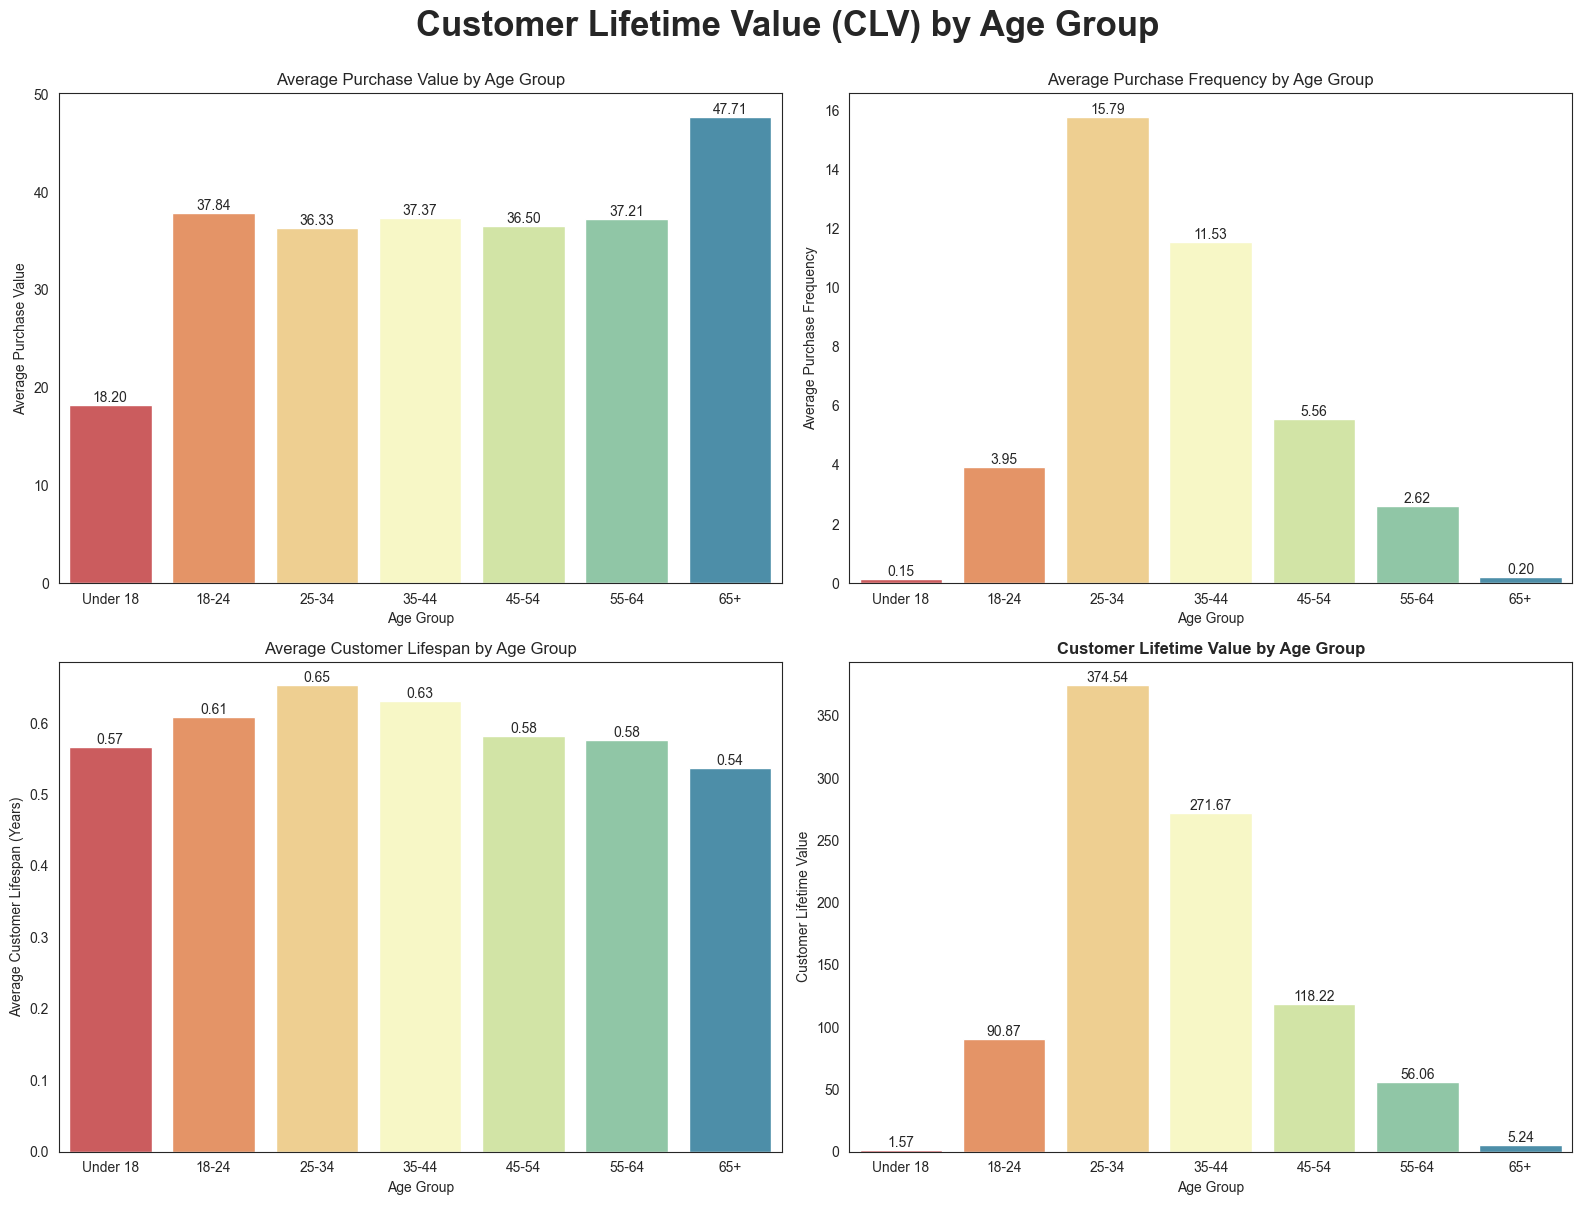

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customer_data = pd.read_csv('../Cleaned_Datasets/SG_customers.csv')
orders_data = pd.read_csv('../Cleaned_Datasets/orders.csv')
products_cleaned = pd.read_csv('../Cleaned_Datasets/products_cleaned.csv')

# Merge orders and product data to include product price in sales data
sales_data = pd.merge(orders_data, products_cleaned[['product_id', 'price_actual']], on='product_id', how='left')
sales_data.head()

# Create age groups based on the 'age' column in customer_data
# Define age bins and labels
bins = [0, 18, 24, 34, 44, 54, 64, 100]  # Age bins
labels = ['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']  # Age group labels
customer_data['age_group'] = pd.cut(customer_data['age'], bins=bins, labels=labels, right=False)

# Merge age group information from customer_data into sales_data
sales_data = sales_data.merge(customer_data[['customer_id', 'age_group']], on='customer_id', how='left')

# Calculate revenue per order by subtracting any additional discount from the actual price
sales_data['revenue'] = sales_data['price_actual'] - sales_data['additional_discount']

# Group data by age group to calculate total revenue and total purchases
age_grouped = sales_data.groupby('age_group').agg(
    total_revenue=('revenue', 'sum'),            # Total revenue per age group
    total_purchases=('order_id', 'nunique')      # Unique order count per age group
).reset_index()

# Calculate Average Purchase Value (APV) per age group
age_grouped['average_purchase_value'] = age_grouped['total_revenue'] / age_grouped['total_purchases']

# Calculate the number of purchases per customer by age group
purchases_per_customer = sales_data.groupby(['customer_id', 'age_group'])['order_id'].nunique().reset_index()

# Calculate Average Purchase Frequency (APF) by averaging purchases per customer within each age group
average_purchase_frequency = purchases_per_customer.groupby('age_group')['order_id'].mean().reset_index()
average_purchase_frequency.rename(columns={'order_id': 'average_purchase_frequency'}, inplace=True)

# Merge average purchase frequency into the main age_grouped DataFrame
age_grouped = age_grouped.merge(average_purchase_frequency, on='age_group', how='left')

# Convert order_time column to datetime format to enable date-based operations
sales_data['order_time'] = pd.to_datetime(sales_data['order_time'], errors='coerce')

# Calculate each customer's first and last purchase dates to determine customer lifespan
customer_lifespans = sales_data.groupby(['customer_id', 'age_group'])['order_time'].agg(['min', 'max']).reset_index()

# Calculate customer lifespan in days
customer_lifespans['lifespan'] = (customer_lifespans['max'] - customer_lifespans['min']).dt.days

# Calculate the average customer lifespan in years for each age group
average_customer_lifespan = customer_lifespans.groupby('age_group')['lifespan'].mean().reset_index()
average_customer_lifespan['average_customer_lifespan_years'] = average_customer_lifespan['lifespan'] / 365  # Convert days to years

# Merge the average lifespan data with the main age_grouped DataFrame
age_grouped = age_grouped.merge(average_customer_lifespan[['age_group', 'average_customer_lifespan_years']], on='age_group', how='left')

# Calculate Customer Lifetime Value (CLV) by age group using APV, APF, and ACL
age_grouped['customer_lifetime_value'] = (
    age_grouped['average_purchase_value'] *
    age_grouped['average_purchase_frequency'] *
    age_grouped['average_customer_lifespan_years']
)

# Output the summary results for each age group
print(age_grouped[['age_group', 'total_revenue', 'total_purchases', 'average_purchase_value',
                   'average_purchase_frequency', 'average_customer_lifespan_years',
                   'customer_lifetime_value']])

# Set up a color palette for age-group-based visualizations
palette = sns.color_palette("Spectral", len(age_grouped['age_group'].unique()))

# Plotting the metrics by age group with appropriate labels
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('white')  # Set figure background to white

# Plot Average Purchase Value (APV) by Age Group
sns.barplot(x='age_group', y='average_purchase_value', data=age_grouped, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Average Purchase Value by Age Group')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Average Purchase Value')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt="%.2f", label_type="edge")

# Plot Average Purchase Frequency (APF) by Age Group
sns.barplot(x='age_group', y='average_purchase_frequency', data=age_grouped, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Average Purchase Frequency by Age Group')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Average Purchase Frequency')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt="%.2f", label_type="edge")

# Plot Average Customer Lifespan by Age Group
sns.barplot(x='age_group', y='average_customer_lifespan_years', data=age_grouped, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Average Customer Lifespan by Age Group')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Average Customer Lifespan (Years)')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt="%.2f", label_type="edge")

# Plot Customer Lifetime Value (CLV) by Age Group
sns.barplot(x='age_group', y='customer_lifetime_value', data=age_grouped, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Customer Lifetime Value by Age Group', fontweight='bold')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Customer Lifetime Value')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt="%.2f", label_type="edge")

# Adjust the layout and add a main title
plt.suptitle("Customer Lifetime Value (CLV) by Age Group", fontsize=25, fontweight='bold', y=1)
plt.subplots_adjust(top=0.3)  # Adjust space for the main title
plt.tight_layout()  # Adjust layout for non-overlapping elements
plt.show()

---

## Analysis of Customer Lifetime Value (CLV) Based on Age Group

Analyzing **Customer Lifetime Value (CLV)** based on age group provides insights into which age segments bring the highest value to the company and which may require different engagement strategies. By examining metrics like average purchase value, purchase frequency, customer lifespan, and CLV for each age group, we can identify high-value segments and opportunities for improvement in customer engagement and retention.

### General Observations

1. **Average Purchase Value (APV) by Age Group**:
   - The **65+ age group** has the highest average purchase value at $47.71, which suggests they are inclined to make fewer but higher-value purchases.
   - The **Under 18** age group has the lowest APV at $18.20, possibly due to lower spending power or different purchasing preferences.
   - **Interpretation**: High APV in older age groups indicates a potential to enhance engagement among these customers with premium or high-value offerings.

2. **Average Purchase Frequency (APF) by Age Group**:
   - The **25-34** age group shows the highest purchase frequency at 15.79 purchases per year, indicating a highly engaged segment.
   - In contrast, the **Under 18** and **65+** age groups exhibit very low purchase frequencies (0.15 and 0.20, respectively).
   - **Interpretation**: Younger customers may have limited spending frequency, while older customers might benefit from incentives to increase engagement frequency.

3. **Average Customer Lifespan by Age Group**:
   - The **25-34** age group also has the longest customer lifespan at 0.65 years, while the **65+** group has the shortest at 0.54 years.
   - **Interpretation**: The 25-34 age group not only engages frequently but also maintains a longer relationship with the brand, making them a crucial demographic for CLV.

4. **Customer Lifetime Value (CLV) by Age Group**:
   - The **25-34** age group has the highest CLV at $374.54, followed by the 35-44 age group at $271.67.
   - The **Under 18** and **65+** age groups contribute the lowest CLV values at $1.57 and $5.24, respectively.
   - **Interpretation**: The highest CLV in the 25-34 age group indicates this demographic as a prime target for retention strategies, while the lower CLV in older and younger age groups suggests potential areas to enhance value through tailored engagement.

### Key Insights

1. **High Value in the 25-34 Age Group**: The 25-34 age group shows strong engagement, high purchase frequency, and the longest customer lifespan, leading to the highest CLV. This segment is highly valuable and should be prioritized for sustained engagement.

2. **Opportunities to Improve CLV for Younger and Older Age Groups**: The Under 18 and 65+ age groups exhibit low engagement levels, short lifespans, and minimal CLV contributions. Targeted strategies are needed to drive engagement and increase their overall value.

3. **Potential to Increase APF in the 65+ Age Group**: While the 65+ group has a high average purchase value, their low purchase frequency limits their CLV. Introducing incentives to increase their purchase frequency could enhance their overall lifetime value.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy appears to be **highly effective for the 25-34 age group** but **less effective for younger and older age segments**. While the brand successfully engages the 25-34 demographic with frequent purchases and longer relationships, it struggles to maintain similar engagement levels among the Under 18 and 65+ age groups.

- **Effective Aspects**:
   - The strategy effectively engages the 25-34 demographic, yielding the highest CLV due to strong purchase frequency and customer lifespan.
   - The 35-44 age group also shows relatively high CLV, benefiting from similar engagement and retention efforts.

- **Ineffective Aspects**:
   - The retention approach does not sufficiently engage the Under 18 and 65+ age groups, leading to low CLV in these segments.
   - Limited focus on incentivizing higher purchase frequency in older customers or enhancing the spending power of younger customers contributes to lower value in these demographics.

Overall, while the strategy demonstrates success in key demographics, addressing gaps in engagement with younger and older customers could enhance overall brand value.

---

## Recommendations for Further Action

1. **Tailor Loyalty Programs for Different Age Segments**:
   - **Goal**: Increase engagement and CLV across all age groups.
   - **Action**: Implement age-specific loyalty programs. For instance, the 25-34 and 35-44 groups could receive tiered benefits that reward frequent purchases, while the 65+ group might benefit from a referral incentive program encouraging family shopping.
   - **Priority**: High — segmenting loyalty programs ensures relevance across diverse demographics, maximizing engagement and value.

2. **Introduce Educational Campaigns for Younger Customers (Under 18)**:
   - **Goal**: Foster early brand affinity and improve engagement with younger customers.
   - **Action**: Run campaigns that emphasize educational content, product tutorials, or loyalty rewards targeting younger customers to build early connections and increase APF.
   - **Priority**: Medium — fostering early brand engagement with young customers can build long-term loyalty.

3. **Incentivize Frequent Purchases in Older Age Groups (65+)**:
   - **Goal**: Increase purchase frequency and CLV in the 65+ age group.
   - **Action**: Offer special incentives or discounts for repeat purchases within a certain period to encourage higher frequency among older customers.
   - **Priority**: Medium — by addressing the low APF in the 65+ group, this action can increase CLV in a segment with high spending potential.

4. **Regularly Track CLV by Age Segment**:
   - **Goal**: Continuously monitor the effectiveness of retention strategies across age groups.
   - **Action**: Develop a dashboard to track CLV metrics segmented by age, allowing timely adjustments to strategies based on real-time insights.
   - **Priority**: High — ongoing tracking supports data-driven adjustments, optimizing retention efforts across all age groups.

5. **Develop Personalized Marketing for High-Value Segments (25-34)**:
   - **Goal**: Sustain high engagement in the 25-34 segment to maintain its strong CLV.
   - **Action**: Use purchase history and engagement data to create personalized offers for the 25-34 demographic, keeping this high-value segment actively engaged with tailored content.
   - **Priority**: High — personalized marketing can reinforce the brand's connection with its most valuable demographic, further enhancing retention.

By implementing these recommendations, the brand can strengthen its retention strategy across all age groups, boosting CLV, especially in segments currently showing lower engagement. This targeted approach will ensure the brand's retention efforts are both efficient and relevant to each demographic.

---


# Step 3: Analyzing Customer Lifetime Value (CLV) by Gender

   gender  total_revenue  total_purchases  average_purchase_value  \
0  Female   1.736173e+06            46583               37.270529   
1    Male   1.629819e+06            44762               36.410763   

   average_purchase_frequency  average_customer_lifespan_years  \
0                   42.502737                         0.621590   
1                   37.332777                         0.614032   

   customer_lifetime_value  
0               984.660961  
1               834.663175  


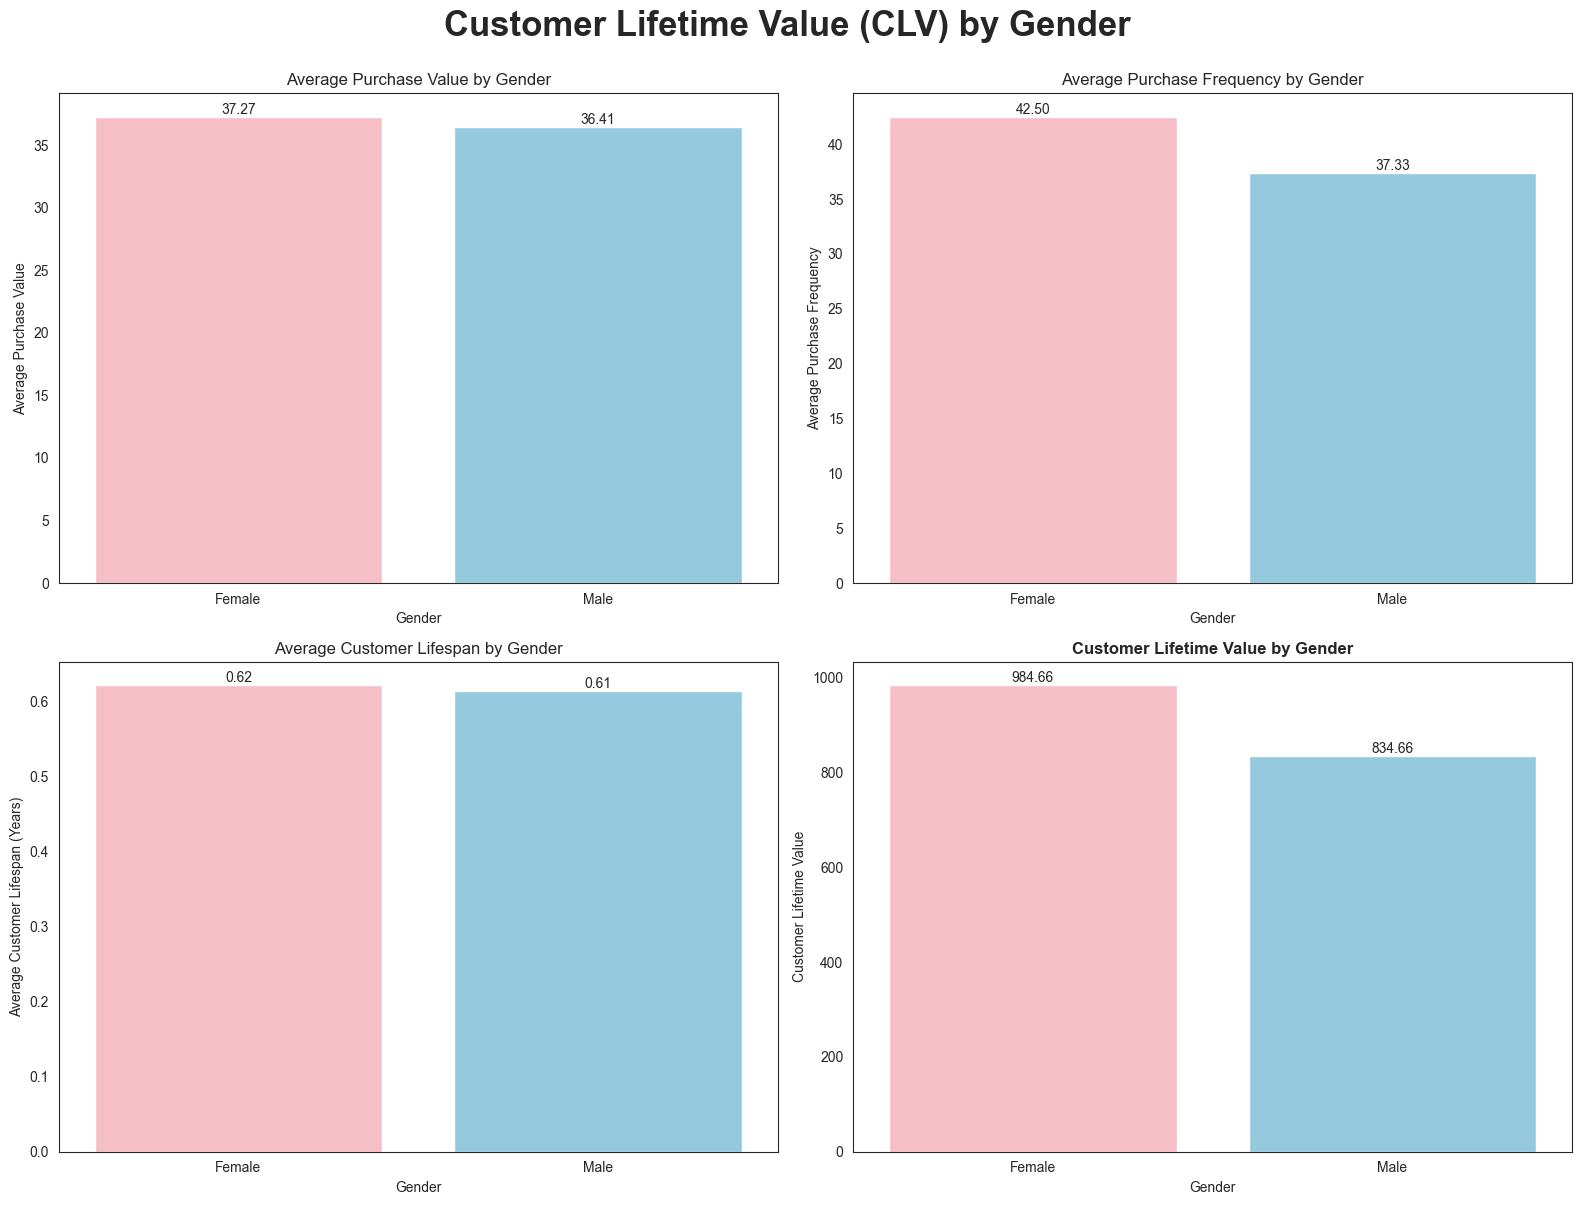

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customer_data = pd.read_csv('../Cleaned_Datasets/SG_customers.csv')
orders_data = pd.read_csv('../Cleaned_Datasets/orders.csv')
products_cleaned = pd.read_csv('../Cleaned_Datasets/products_cleaned.csv')

# Merge order data with product data to include price information in sales data
sales_data = pd.merge(orders_data, products_cleaned[['product_id', 'price_actual']], on='product_id', how='left')

# Convert order_time to datetime format for date-based operations
sales_data['order_time'] = pd.to_datetime(sales_data['order_time'], errors='coerce')

# Add gender information from customer_data to sales_data
sales_data = sales_data.merge(customer_data[['customer_id', 'gender']], on='customer_id', how='left')

# Calculate revenue per order, handling cases where 'additional_discount' might be missing
sales_data['revenue'] = sales_data['price_actual'] - sales_data.get('additional_discount', 0)

# Calculate total revenue and total purchases by gender
gender_grouped = sales_data.groupby('gender').agg(
    total_revenue=('revenue', 'sum'),             # Total revenue for each gender
    total_purchases=('order_id', 'nunique')       # Count of unique orders as total purchases
).reset_index()

# Calculate Average Purchase Value (APV) by gender
gender_grouped['average_purchase_value'] = gender_grouped['total_revenue'] / gender_grouped['total_purchases']

# Calculate the number of unique purchases per customer by gender
purchases_per_customer = sales_data.groupby(['customer_id', 'gender'])['order_id'].nunique().reset_index()

# Calculate Average Purchase Frequency (APF) by averaging purchases per customer within each gender
average_purchase_frequency = purchases_per_customer.groupby('gender')['order_id'].mean().reset_index()
average_purchase_frequency.rename(columns={'order_id': 'average_purchase_frequency'}, inplace=True)

# Merge average purchase frequency with gender_grouped
gender_grouped = gender_grouped.merge(average_purchase_frequency, on='gender', how='left')

# Calculate first and last purchase dates for each customer to determine customer lifespan
customer_lifespans = sales_data.groupby(['customer_id', 'gender'])['order_time'].agg(['min', 'max']).reset_index()
customer_lifespans['min'] = pd.to_datetime(customer_lifespans['min'], errors='coerce')
customer_lifespans['max'] = pd.to_datetime(customer_lifespans['max'], errors='coerce')

# Calculate lifespan in days for each customer and handle any missing values
customer_lifespans['lifespan'] = (customer_lifespans['max'] - customer_lifespans['min']).dt.days

# Calculate Average Customer Lifespan (ACL) by averaging lifespan in days for each gender
average_customer_lifespan = customer_lifespans.groupby('gender')['lifespan'].mean().reset_index()
average_customer_lifespan['average_customer_lifespan_years'] = average_customer_lifespan['lifespan'] / 365  # Convert days to years

# Merge average customer lifespan data with gender_grouped
gender_grouped = gender_grouped.merge(average_customer_lifespan[['gender', 'average_customer_lifespan_years']], on='gender', how='left')

# Calculate Customer Lifetime Value (CLV) by gender
gender_grouped['customer_lifetime_value'] = (
    gender_grouped['average_purchase_value'] *
    gender_grouped['average_purchase_frequency'] *
    gender_grouped['average_customer_lifespan_years']
)

# Output the calculated metrics by gender
print(gender_grouped[['gender', 'total_revenue', 'total_purchases', 'average_purchase_value',
                      'average_purchase_frequency', 'average_customer_lifespan_years',
                      'customer_lifetime_value']])

# Set up color palette for visualizations by gender
palette = {"Female": "#FFB6C1", "Male": "#87CEEB"}

# Plotting the metrics by gender using subplots with gender-based color palettes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('white')  # Set figure background to white

# Plot Average Purchase Value (APV) by Gender
sns.barplot(x='gender', y='average_purchase_value', data=gender_grouped, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Average Purchase Value by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Average Purchase Value')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt="%.2f", label_type="edge")

# Plot Average Purchase Frequency (APF) by Gender
sns.barplot(x='gender', y='average_purchase_frequency', data=gender_grouped, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Average Purchase Frequency by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Average Purchase Frequency')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt="%.2f", label_type="edge")

# Plot Average Customer Lifespan (ACL) by Gender
sns.barplot(x='gender', y='average_customer_lifespan_years', data=gender_grouped, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Average Customer Lifespan by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Average Customer Lifespan (Years)')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt="%.2f", label_type="edge")

# Plot Customer Lifetime Value (CLV) by Gender
sns.barplot(x='gender', y='customer_lifetime_value', data=gender_grouped, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Customer Lifetime Value by Gender', fontweight='bold')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Customer Lifetime Value')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt="%.2f", label_type="edge")

# Adjust the layout, title, and spacing for clarity
plt.suptitle("Customer Lifetime Value (CLV) by Gender", fontsize=25, fontweight='bold', y=1)
plt.subplots_adjust(top=0.3)  # Adjust spacing for main title
plt.tight_layout()  # Avoid overlap of subplot elements
plt.show()

---

## Analysis of Customer Lifetime Value Based on Gender

The analysis of Customer Lifetime Value (CLV) based on gender provides insights into spending behavior, purchase frequency, engagement duration, and overall value contribution of male and female customers. CLV is derived from three key components: average purchase value, average purchase frequency, and average customer lifespan. These components reflect how much, how often, and for how long customers engage with the brand.

### General Observations

1. **Average Purchase Value by Gender**:
   - **Observation**: Female customers have a slightly higher average purchase value ($37.27) compared to male customers ($36.41).
   - **Interpretation**: Female customers tend to spend marginally more per transaction. This could be influenced by product preferences, with certain items potentially being more popular among female customers.

2. **Average Purchase Frequency by Gender**:
   - **Observation**: Female customers exhibit a higher average purchase frequency (42.50) than male customers (37.33).
   - **Interpretation**: This suggests that female customers are more engaged with the brand and make purchases more frequently. This pattern could indicate effective targeting of female customers through marketing or product offerings that resonate more with this demographic.

3. **Average Customer Lifespan by Gender**:
   - **Observation**: The average customer lifespan is similar across genders, with female customers showing a slightly longer engagement period (0.62 years) than male customers (0.61 years).
   - **Interpretation**: The minimal difference in customer lifespan suggests that both male and female customers have similar retention rates, with gender not being a strong differentiator in terms of engagement duration.

4. **Customer Lifetime Value (CLV) by Gender**:
   - **Observation**: Female customers have a higher CLV ($984.66) compared to male customers ($834.66), primarily driven by higher purchase frequency and average purchase value.
   - **Interpretation**: Female customers are generating more lifetime value due to higher engagement, suggesting that strategies targeting female customers could yield better returns on investment.

### Key Insights

1. **Female Customers Contribute Higher CLV**: Female customers show both a higher purchase frequency and a slightly higher purchase value, resulting in a significantly greater CLV compared to male customers.
2. **Similar Retention Across Genders**: Both male and female customers have a similar lifespan, indicating consistent engagement levels across genders.
3. **Greater Engagement Among Female Customers**: Female customers' higher purchase frequency suggests a stronger relationship with the brand, possibly due to tailored marketing campaigns or product offerings that appeal more to female customers.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy appears more effective with female customers, as reflected by their higher purchase frequency and CLV. While both genders have similar retention durations, female customers show greater engagement and spending behavior, indicating a successful alignment of the brand's offerings with female preferences. However, the strategy may be less effective in maximizing engagement among male customers, as they demonstrate lower purchase frequency and CLV.

- **Effective Aspects**:
   - The strategy successfully drives higher engagement and lifetime value among female customers.
   - Retention rates are comparable across genders, indicating a balanced approach to customer retention.

- **Areas for Improvement**:
   - Lower CLV and purchase frequency among male customers suggest potential untapped opportunities.
   - The current strategy might benefit from a more targeted approach to boost male customer engagement.

---

## Recommendations for Further Action

1. **Develop Gender-Specific Marketing Campaigns**:
   - **Goal**: Increase male customer engagement and boost overall CLV by tailoring marketing efforts.
   - **Action**: Design campaigns that cater to the interests and preferences of male customers, such as promotions on products more frequently purchased by male customers or incentives for repeat purchases.
   - **Priority**: High — Targeted campaigns can potentially elevate male customer CLV to match female engagement levels.

2. **Enhance Product Recommendations and Personalization**:
   - **Goal**: Drive more frequent purchases and increase average purchase value across both genders.
   - **Action**: Utilize customer data to offer personalized recommendations based on past purchases and browsing history, encouraging cross-selling and upselling opportunities.
   - **Priority**: Medium — Personalized experiences can boost both purchase frequency and transaction values, increasing CLV.

3. **Offer Loyalty Rewards to Strengthen Engagement**:
   - **Goal**: Encourage sustained engagement and long-term retention across all customer demographics.
   - **Action**: Implement a loyalty program that rewards customers for repeat purchases, offering exclusive benefits like discounts, early access to sales, or special rewards for milestone purchases.
   - **Priority**: Medium — A well-structured loyalty program can drive higher engagement and extend customer lifespan.

4. **Explore Product Line Expansion for Male Customers**:
   - **Goal**: Attract and retain male customers by diversifying product offerings to better suit their preferences.
   - **Action**: Conduct market research to identify product categories with strong male interest and consider introducing or expanding product lines in these areas.
   - **Priority**: High — Catering to male customers' preferences could increase engagement and drive a balanced CLV across genders.

5. **Monitor and Adjust Campaign Performance by Gender**:
   - **Goal**: Continuously refine marketing strategies based on real-time data to optimize performance.
   - **Action**: Track campaign performance separately for male and female customers, using insights to adjust targeting, messaging, and product promotions.
   - **Priority**: High — Continuous monitoring and adjustments ensure that marketing investments are aligned with customer responses, maximizing returns.

6. **Leverage Female Customer Advocacy**:
   - **Goal**: Capitalize on the higher engagement and CLV among female customers by encouraging word-of-mouth referrals.
   - **Action**: Launch referral programs or social media campaigns that incentivize female customers to refer friends and family, potentially attracting more high-CLV customers.
   - **Priority**: Medium — Leveraging female customers as brand advocates can bring in new customers with similar engagement potential.

By implementing these recommendations, the brand can further optimize its customer retention and engagement strategy, improving CLV across genders and maximizing return on marketing investments.

---

# Step 4: Customer Lifetime Value (CLV) by Engagement Level (High vs Low Engagement)

  engagement_level  total_revenue  total_purchases  average_purchase_value  \
0  High Engagement   2.955013e+06            80475               36.719634   
1   Low Engagement   4.109791e+05            10870               37.808563   

   average_purchase_frequency  average_customer_lifespan_years  \
0                   72.369604                         0.778028   
1                    9.188504                         0.466881   

   customer_lifetime_value  
0              2067.520217  
1               162.196479  


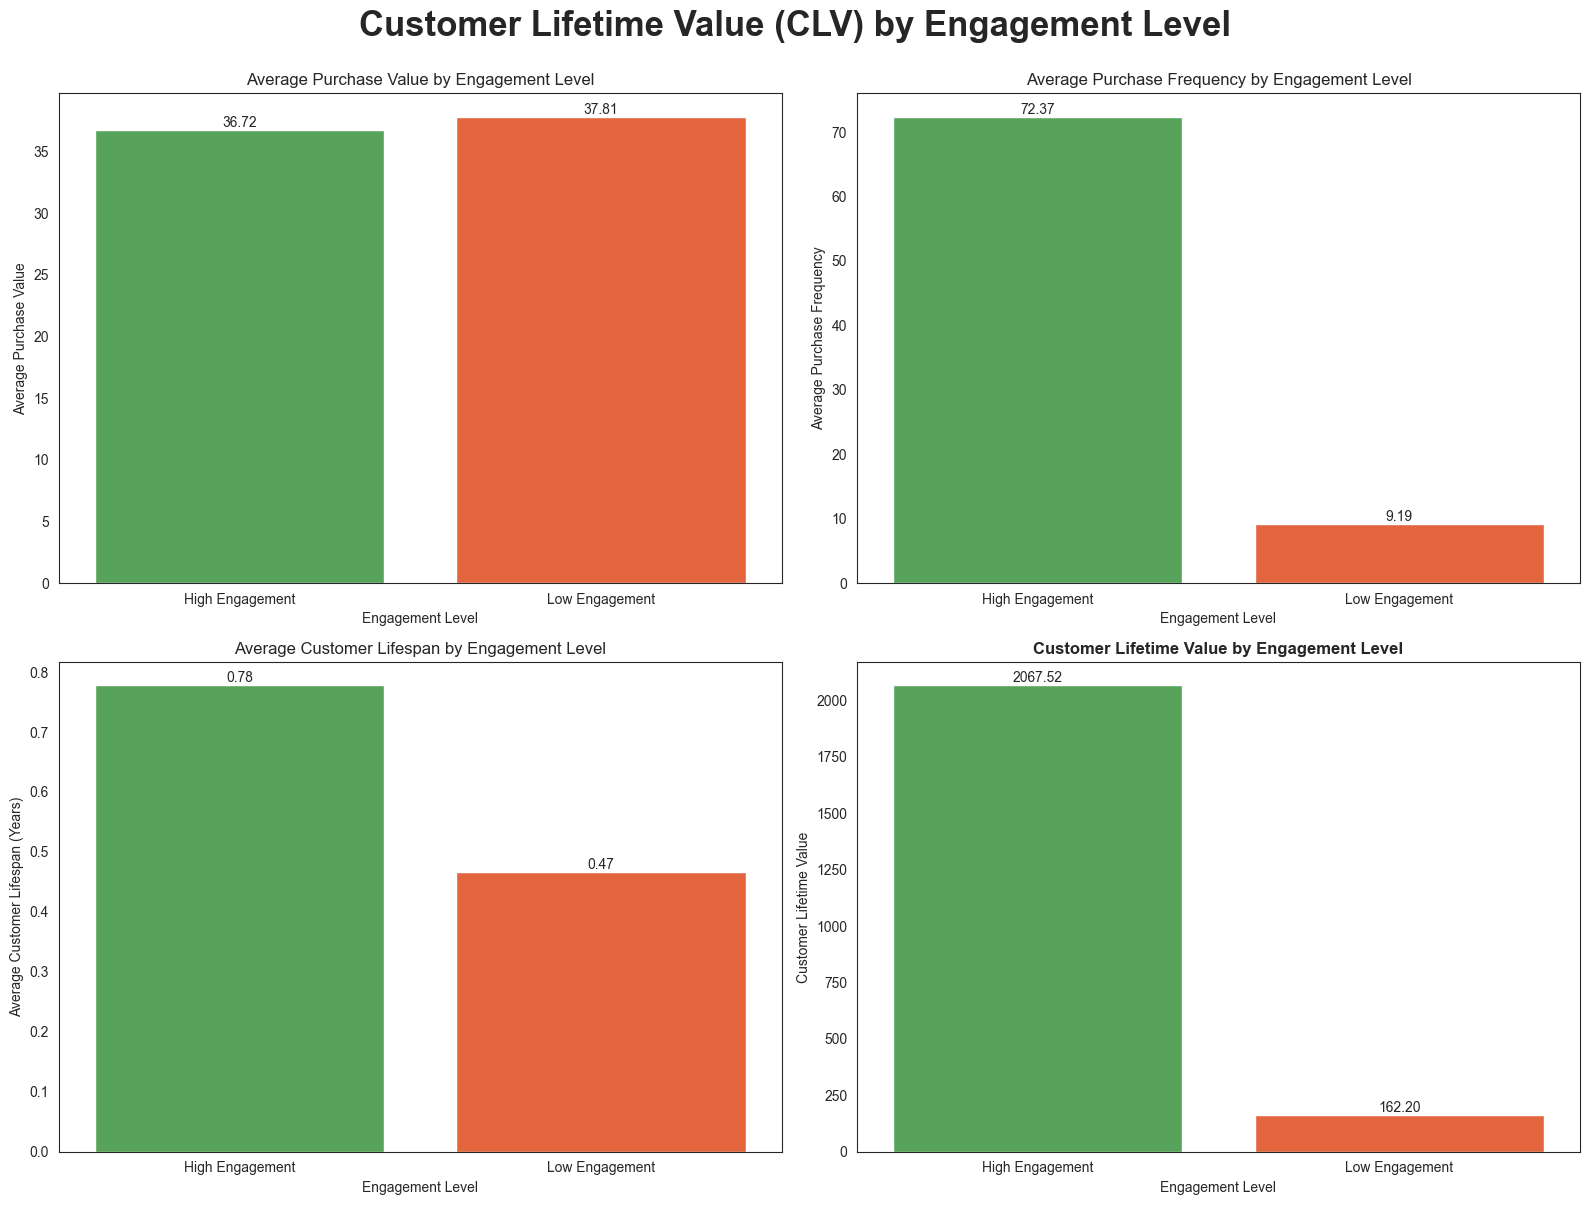

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customer_data = pd.read_csv('../Cleaned_Datasets/SG_customers.csv')
orders_data = pd.read_csv('../Cleaned_Datasets/orders.csv')
products_cleaned = pd.read_csv('../Cleaned_Datasets/products_cleaned.csv')
sales_data = pd.merge(orders_data, products_cleaned[['product_id', 'price_actual']], on='product_id', how='left')

# Define 'high engagement' based on the sum of key metrics
customer_data['total_engagement'] = (customer_data['open_count_last_30_days'] +
                                     customer_data['login_count_last_30_days'] +
                                     customer_data['checkout_count_last_30_days'])

# Calculate median of total engagement to set threshold for high engagement
median_total_engagement = customer_data['total_engagement'].median()
customer_data['engagement_level'] = customer_data['total_engagement'].apply(
    lambda x: 'High Engagement' if x > median_total_engagement else 'Low Engagement'
)

# Merge engagement information with sales data
sales_data = sales_data.merge(customer_data[['customer_id', 'engagement_level']], on='customer_id', how='left')

# Calculate revenue per order (assuming additional_discount is defined)
sales_data['revenue'] = sales_data['price_actual'] - sales_data.get('additional_discount', 0)

# Calculate total revenue and total purchases by engagement level
engagement_grouped = sales_data.groupby('engagement_level').agg(
    total_revenue=('revenue', 'sum'),
    total_purchases=('order_id', 'nunique')  # Unique orders for total purchases
).reset_index()

# Calculate Average Purchase Value (APV) by engagement level
engagement_grouped['average_purchase_value'] = engagement_grouped['total_revenue'] / engagement_grouped['total_purchases']

# Calculate the number of purchases per customer by engagement level
purchases_per_customer = sales_data.groupby(['customer_id', 'engagement_level'])['order_id'].nunique().reset_index()

# Calculate Average Purchase Frequency (APF) by engagement level
average_purchase_frequency = purchases_per_customer.groupby('engagement_level')['order_id'].mean().reset_index()
average_purchase_frequency.rename(columns={'order_id': 'average_purchase_frequency'}, inplace=True)

# Merge the average purchase frequency data with the engagement_grouped data
engagement_grouped = engagement_grouped.merge(average_purchase_frequency, on='engagement_level', how='left')

# Ensure order_time is in datetime format
sales_data['order_time'] = pd.to_datetime(sales_data['order_time'], errors='coerce')

# Get first and last purchase dates by engagement level
customer_lifespans = sales_data.groupby(['customer_id', 'engagement_level'])['order_time'].agg(['min', 'max']).reset_index()

# Calculate lifespan in days
customer_lifespans['lifespan'] = (customer_lifespans['max'] - customer_lifespans['min']).dt.days

# Calculate Average Customer Lifespan (ACL) by engagement level
average_customer_lifespan = customer_lifespans.groupby('engagement_level')['lifespan'].mean().reset_index()
average_customer_lifespan['average_customer_lifespan_years'] = average_customer_lifespan['lifespan'] / 365  # Convert to years

# Merge the average lifespan data with the engagement_grouped data
engagement_grouped = engagement_grouped.merge(average_customer_lifespan[['engagement_level', 'average_customer_lifespan_years']], on='engagement_level', how='left')

# Calculate Customer Lifetime Value (CLV) by engagement level
engagement_grouped['customer_lifetime_value'] = (
    engagement_grouped['average_purchase_value'] *
    engagement_grouped['average_purchase_frequency'] *
    engagement_grouped['average_customer_lifespan_years']
)

# Output the results
print(engagement_grouped[['engagement_level', 'total_revenue', 'total_purchases', 'average_purchase_value',
                          'average_purchase_frequency', 'average_customer_lifespan_years',
                          'customer_lifetime_value']])

# Set a color palette for engagement levels
palette = {"High Engagement": "#4CAF50", "Low Engagement": "#FF5722"}  # Green for high, orange for low

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('white')  # Set background to white

# Average Purchase Value by Engagement Level
sns.barplot(x='engagement_level', y='average_purchase_value', data=engagement_grouped, ax=axes[0, 0], palette=palette)
axes[0, 0].set_title('Average Purchase Value by Engagement Level')
axes[0, 0].set_xlabel('Engagement Level')
axes[0, 0].set_ylabel('Average Purchase Value')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt="%.2f", label_type="edge")

# Average Purchase Frequency by Engagement Level
sns.barplot(x='engagement_level', y='average_purchase_frequency', data=engagement_grouped, ax=axes[0, 1], palette=palette)
axes[0, 1].set_title('Average Purchase Frequency by Engagement Level')
axes[0, 1].set_xlabel('Engagement Level')
axes[0, 1].set_ylabel('Average Purchase Frequency')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt="%.2f", label_type="edge")

# Average Customer Lifespan by Engagement Level
sns.barplot(x='engagement_level', y='average_customer_lifespan_years', data=engagement_grouped, ax=axes[1, 0], palette=palette)
axes[1, 0].set_title('Average Customer Lifespan by Engagement Level')
axes[1, 0].set_xlabel('Engagement Level')
axes[1, 0].set_ylabel('Average Customer Lifespan (Years)')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt="%.2f", label_type="edge")

# Customer Lifetime Value by Engagement Level
sns.barplot(x='engagement_level', y='customer_lifetime_value', data=engagement_grouped, ax=axes[1, 1], palette=palette)
axes[1, 1].set_title('Customer Lifetime Value by Engagement Level', fontweight='bold')
axes[1, 1].set_xlabel('Engagement Level')
axes[1, 1].set_ylabel('Customer Lifetime Value')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt="%.2f", label_type="edge")

# Adjust the title and layout spacing
plt.suptitle("Customer Lifetime Value (CLV) by Engagement Level" , fontsize=25, fontweight='bold', y = 1)
plt.subplots_adjust(top=0.3)  # Adjust top spacing for title
plt.tight_layout()  # Adjust layout without overlapping with title
plt.show()

--- 

## Analysis of Customer Lifetime Value (CLV) Based on Engagement Level (High vs Low Engagement)

This analysis evaluates **Customer Lifetime Value (CLV)** across different engagement levels—**High Engagement** and **Low Engagement**. Engagement level is a significant indicator of how frequently and consistently customers interact with the brand, impacting their purchase frequency, average purchase value, and overall lifespan with the brand.

### General Observations

1. **Average Purchase Value by Engagement Level**:
   - **Overview**: Both high and low engagement groups show similar average purchase values, with only a slight difference ($36.72 for high engagement vs. $37.81 for low engagement).
   - **Interpretation**: This similarity suggests that both groups spend comparably per transaction. Therefore, the difference in overall CLV is likely influenced more by frequency and lifespan rather than individual purchase value.

2. **Average Purchase Frequency by Engagement Level**:
   - **Overview**: Customers with high engagement levels have an average purchase frequency of 72.37, while those with low engagement average only 9.19 purchases.
   - **Interpretation**: The stark contrast in purchase frequency indicates that high-engagement customers are significantly more active, which directly enhances their CLV. This suggests that fostering frequent interactions is key to improving lifetime value.

3. **Average Customer Lifespan by Engagement Level**:
   - **Overview**: High-engagement customers have an average lifespan of 0.78 years, compared to 0.47 years for low-engagement customers.
   - **Interpretation**: High engagement not only encourages frequent purchases but also extends the customer's relationship with the brand. This longer lifespan further contributes to higher CLV.

4. **Customer Lifetime Value (CLV) by Engagement Level**:
   - **Overview**: The CLV for high-engagement customers is $2067.52, drastically higher than the $162.20 for low-engagement customers.
   - **Interpretation**: High engagement yields a substantial return in CLV, underscoring the importance of engagement-focused retention strategies. The substantial difference in CLV indicates that customer engagement level is a critical driver of long-term profitability.

### Key Insights

1. **Engagement Level Directly Impacts CLV**: Customers with high engagement demonstrate a significantly higher CLV due to increased purchase frequency and longer customer lifespan.
2. **Retention through Frequent Engagement**: The data shows that boosting engagement frequency can lead to substantial improvements in CLV, as high-engagement customers are not only more active but also maintain a longer relationship with the brand.
3. **Sustained Engagement Yields Greater Profitability**: The long lifespan and high purchase frequency of engaged customers underscore the financial benefits of investing in strategies that encourage continuous interaction.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy appears **effective in driving engagement among high-value customers** but may fall short in fostering engagement across the broader customer base. The high CLV for engaged customers demonstrates the value of engagement-focused strategies; however, the low CLV among less engaged customers suggests that more can be done to uplift this group.

- **Effective Aspects**:
   - The strategy effectively maximizes value among already engaged customers, as seen by the high CLV, purchase frequency, and lifespan for this group.
   - High-engagement campaigns and touchpoints seem to be successful for customers who are already interacting frequently with the brand.

- **Ineffective Aspects**:
   - The retention strategy lacks elements to convert low-engagement customers into high-engagement ones. This leads to a wide gap in CLV between the two groups.
   - Limited efforts to boost engagement frequency and lifespan in the low-engagement group result in a significant disparity in lifetime value.

Overall, while the strategy excels with engaged customers, it requires expansion to encompass and uplift the low-engagement segment to achieve more balanced CLV growth across all customer groups.

---

## Recommendations for Further Action

1. **Expand Engagement Programs to Low-Engagement Customers**:
   - **Goal**: Increase CLV among low-engagement customers by encouraging more frequent interactions.
   - **Action**: Introduce personalized engagement campaigns targeted at low-engagement customers, including incentives like discounts on next purchases or loyalty points for more frequent shopping.
   - **Priority**: High — improving engagement among this group could significantly enhance overall CLV.

2. **Develop a Tiered Loyalty Program to Encourage Frequent Purchases**:
   - **Goal**: Increase purchase frequency across both engagement levels, with a focus on boosting CLV.
   - **Action**: Implement a tiered loyalty program that rewards customers based on their purchase frequency and engagement level. Higher engagement levels unlock additional benefits such as free shipping, exclusive access to products, or bonus points.
   - **Priority**: High — a loyalty program tailored to engagement can encourage more frequent shopping and sustain long-term relationships.

3. **Incorporate Personalized Retention Touchpoints Based on Engagement Level**:
   - **Goal**: Tailor retention strategies to the specific behaviors of high and low-engagement customers.
   - **Action**: Use personalized messaging and offers to re-engage low-engagement customers and further incentivize high-engagement customers. For example, send reminders for discounts to low-engagement customers and offer exclusive early access to sales for high-engagement customers.
   - **Priority**: Medium — targeted personalization can improve relevance, encouraging higher interaction rates.

4. **Analyze Customer Feedback and Behavior Patterns for Low-Engagement Customers**:
   - **Goal**: Understand the barriers preventing low-engagement customers from frequent interactions.
   - **Action**: Collect feedback through surveys or analyze behavior patterns to identify why low-engagement customers are less active. Adjust campaigns and engagement efforts based on these insights to better address their needs.
   - **Priority**: Medium — understanding customer challenges can guide more effective engagement strategies.

5. **Launch a Re-Engagement Campaign Targeted at Dormant Customers**:
   - **Goal**: Reactivate low-engagement customers who have made few purchases and increase their purchase frequency.
   - **Action**: Create a re-engagement campaign with attractive offers (e.g., limited-time discounts or rewards for returning customers) to bring dormant customers back into active engagement.
   - **Priority**: Medium — re-engaging inactive customers offers an opportunity to improve CLV without acquiring new customers.

6. **Optimize Communication Channels for Engagement**:
   - **Goal**: Use the most effective channels to reach customers and sustain engagement.
   - **Action**: Experiment with various communication channels (email, SMS, push notifications) to determine which are most effective for different engagement levels. Tailor communication frequency and content to maximize interaction.
   - **Priority**: Medium — optimizing communication can enhance reach and effectiveness, supporting engagement goals.

Implementing these recommendations will enable the brand to bridge the engagement gap, improve retention, and achieve higher overall CLV. By focusing on targeted strategies for different engagement levels, the brand can cultivate stronger, more profitable customer relationships.

---

# Step 5: Customer Lifetime Value (CLV) by Promotional Campaign Type

                       campaign_name  total_revenue  total_purchases  \
0      High Priority Mega Sales Date   75926.823722             2517   
1         Additional Mega Sales Date  122990.541701             4149   
2  High Priority Seasonal Sales Date   26991.145311              594   
3          Other Seasonal Sales Date  144915.156049             5295   

   average_purchase_value  average_purchase_frequency  \
0               30.165603                    4.099349   
1               29.643418                    3.925260   
2               45.439639                    2.485356   
3               27.368301                    4.778881   

   average_customer_lifespan_years  customer_lifetime_value  
0                         0.083272                10.297311  
1                         0.127391                14.822953  
2                         0.002740                 0.309407  
3                         0.274227                35.866146  


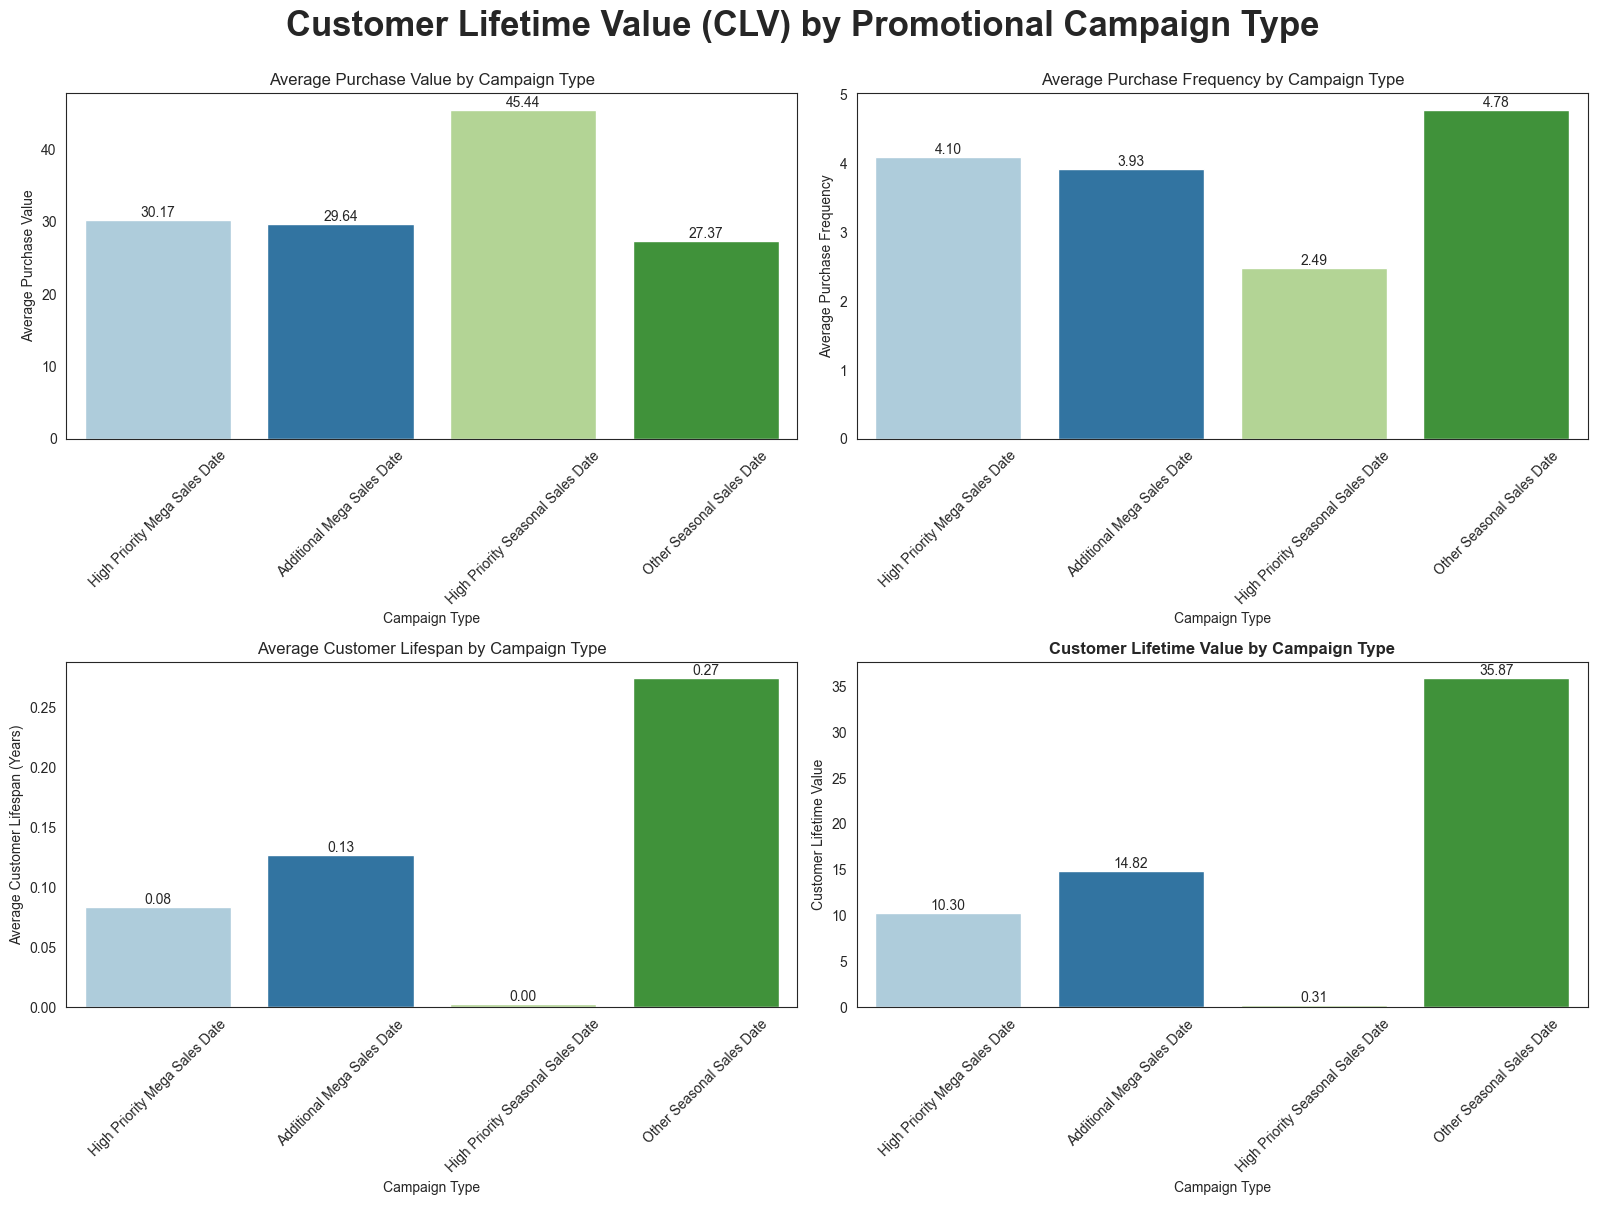

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load datasets
customer_data = pd.read_csv('../Cleaned_Datasets/SG_customers.csv')
orders_data = pd.read_csv('../Cleaned_Datasets/orders.csv')
products_cleaned = pd.read_csv('../Cleaned_Datasets/products_cleaned.csv')
sales_data = pd.merge(orders_data, products_cleaned[['product_id', 'price_actual']], on='product_id', how='left')

# Convert order_time to datetime format
sales_data['order_time'] = pd.to_datetime(sales_data['order_time'])

# Remove rows with NaN in campaign_name
sales_data = sales_data.dropna(subset=['campaign_name'])

# Limit additional_discount so it does not exceed price_actual
sales_data['additional_discount'] = sales_data['additional_discount'].clip(upper=sales_data['price_actual'])

# Calculate revenue per order and filter out any remaining negative revenues
sales_data['revenue'] = sales_data['price_actual'] - sales_data['additional_discount']
sales_data = sales_data[sales_data['revenue'] >= 0]

# Calculate total revenue and total purchases by campaign type
campaign_grouped = sales_data.groupby('campaign_name').agg(
    total_revenue=('revenue', 'sum'),
    total_purchases=('order_id', 'nunique')  # Unique orders count for total purchases
).reset_index()

# Calculate Average Purchase Value (APV) by campaign type
campaign_grouped['average_purchase_value'] = campaign_grouped['total_revenue'] / campaign_grouped['total_purchases']

# Calculate the number of purchases per customer by campaign type
purchases_per_customer = sales_data.groupby(['customer_id', 'campaign_name'])['order_id'].nunique().reset_index()

# Calculate Average Purchase Frequency (APF) by campaign type
average_purchase_frequency = purchases_per_customer.groupby('campaign_name')['order_id'].mean().reset_index()
average_purchase_frequency.rename(columns={'order_id': 'average_purchase_frequency'}, inplace=True)

# Merge average purchase frequency with campaign_grouped
campaign_grouped = campaign_grouped.merge(average_purchase_frequency, on='campaign_name', how='left')

# Get first and last purchase dates by campaign type
customer_lifespans = sales_data.groupby(['customer_id', 'campaign_name'])['order_time'].agg(['min', 'max']).reset_index()
customer_lifespans['lifespan'] = (customer_lifespans['max'] - customer_lifespans['min']).dt.days

# Set minimum lifespan to 1 day for customers with the same first and last purchase date
customer_lifespans['lifespan'] = customer_lifespans['lifespan'].replace(0, 1)

# Calculate Average Customer Lifespan (ACL) by campaign type
average_customer_lifespan = customer_lifespans.groupby('campaign_name')['lifespan'].mean().reset_index()
average_customer_lifespan['average_customer_lifespan_years'] = average_customer_lifespan['lifespan'] / 365  # Convert to years

# Merge the average lifespan data with the campaign_grouped data
campaign_grouped = campaign_grouped.merge(average_customer_lifespan[['campaign_name', 'average_customer_lifespan_years']], on='campaign_name', how='left')

# Calculate Customer Lifetime Value (CLV) by campaign type
campaign_grouped['customer_lifetime_value'] = (
    campaign_grouped['average_purchase_value'] *
    campaign_grouped['average_purchase_frequency'] *
    campaign_grouped['average_customer_lifespan_years']
)

# Reorder campaign_grouped DataFrame by the specified order
campaign_order = ['High Priority Mega Sales Date', 'Additional Mega Sales Date', 'High Priority Seasonal Sales Date', 'Other Seasonal Sales Date']
campaign_grouped['campaign_name'] = pd.Categorical(campaign_grouped['campaign_name'], categories=campaign_order, ordered=True)
campaign_grouped = campaign_grouped.sort_values('campaign_name').reset_index(drop=True)

# Output the results
print(campaign_grouped[['campaign_name', 'total_revenue', 'total_purchases', 'average_purchase_value',
                        'average_purchase_frequency', 'average_customer_lifespan_years', 
                        'customer_lifetime_value']])

# Set a color palette with a different color for each campaign type
palette = sns.color_palette("Paired", len(campaign_order))

# Combined subplots for all metrics with campaign-type-based colors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('white')  # Set background to white

# Average Purchase Value by Campaign Type
sns.barplot(x='campaign_name', y='average_purchase_value', data=campaign_grouped, ax=axes[0, 0], palette=palette, order=campaign_order)
axes[0, 0].set_title('Average Purchase Value by Campaign Type')
axes[0, 0].set_xlabel('Campaign Type')
axes[0, 0].set_ylabel('Average Purchase Value')
axes[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt="%.2f", label_type="edge")

# Average Purchase Frequency by Campaign Type
sns.barplot(x='campaign_name', y='average_purchase_frequency', data=campaign_grouped, ax=axes[0, 1], palette=palette, order=campaign_order)
axes[0, 1].set_title('Average Purchase Frequency by Campaign Type')
axes[0, 1].set_xlabel('Campaign Type')
axes[0, 1].set_ylabel('Average Purchase Frequency')
axes[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt="%.2f", label_type="edge")

# Average Customer Lifespan by Campaign Type
sns.barplot(x='campaign_name', y='average_customer_lifespan_years', data=campaign_grouped, ax=axes[1, 0], palette=palette, order=campaign_order)
axes[1, 0].set_title('Average Customer Lifespan by Campaign Type')
axes[1, 0].set_xlabel('Campaign Type')
axes[1, 0].set_ylabel('Average Customer Lifespan (Years)')
axes[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt="%.2f", label_type="edge")

# Customer Lifetime Value by Campaign Type
sns.barplot(x='campaign_name', y='customer_lifetime_value', data=campaign_grouped, ax=axes[1, 1], palette=palette, order=campaign_order)
axes[1, 1].set_title('Customer Lifetime Value by Campaign Type', fontweight='bold')
axes[1, 1].set_xlabel('Campaign Type')
axes[1, 1].set_ylabel('Customer Lifetime Value')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt="%.2f", label_type="edge")

# Adjust the title and layout spacing
plt.suptitle("Customer Lifetime Value (CLV) by Promotional Campaign Type" , fontsize=25, fontweight='bold', y = 1)
plt.subplots_adjust(top=0.3)  # Adjust top spacing for title
plt.tight_layout()  # Adjust layout without overlapping with title
plt.show()

## Step 5.1 Verification Code to Analyze Customer Lifespans and Campaign Date Range for Near-Zero CLV in "High Priority Seasonal Sales Date"


In [16]:
# Check the date range for "High Priority Seasonal Sales Date"
campaign_date_range = sales_data[sales_data['campaign_name'] == 'High Priority Seasonal Sales Date']['order_time']
print("Campaign start date:", campaign_date_range.min())
print("Campaign end date:", campaign_date_range.max())

# Distribution of customer lifespans in this campaign
hp_seasonal_lifespans = customer_lifespans[customer_lifespans['campaign_name'] == 'High Priority Seasonal Sales Date']
print("Customer lifespan distribution:\n", hp_seasonal_lifespans['lifespan'].describe())


Campaign start date: 2019-11-29 00:15:00
Campaign end date: 2019-11-29 23:56:00
Customer lifespan distribution:
 count    239.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: lifespan, dtype: float64


---

### Campaign Analysis: High Priority Seasonal Sales Date (Explanation for Near-Zero CLV Value))

The analysis of the "High Priority Seasonal Sales Date" campaign confirms that it was a single-day event, taking place only on **November 29, 2019**. Below is a breakdown of the key findings:

- **Single-Day Campaign**: The campaign ran from 00:15 to 23:56, indicating that all customer purchases occurred within a single 24-hour period.

- **Customer Lifespan**: Due to the single-day duration, every customer has a lifespan of 1 day (with a minimum value set to 1 day for customers who made purchases on the same day). The distribution statistics for customer lifespan—mean, min, max, 25th percentile, and so on—all show a value of 1.0, reinforcing that all purchases were made exclusively within this day.

These findings highlight that the "High Priority Seasonal Sales Date" campaign was likely a flash sale or a special promotional event that attracted purchases within a constrained timeframe.

### Rationale for Setting a Minimum Lifespan of 1 Day

Setting a minimum lifespan of 1 day for customers in single-day campaigns, such as this one, is essential for the following reasons:

1. **Avoiding Zero-Day Lifespans**: Without this adjustment, customers with same-day purchases would have a calculated lifespan of zero days. This zero value could distort further calculations, particularly in metrics like customer lifetime value (CLV), where lifespan is a factor. A zero-day lifespan would reduce CLV calculations to zero, inaccurately reflecting the customer’s engagement with the campaign.

2. **Accurately Representing Customer Engagement**: Even though purchases occurred within a single day, a minimum lifespan of 1 day more accurately reflects the customer’s active participation in the campaign. This approach captures the fact that each customer engaged with the campaign, even if only briefly, and provides a consistent way to account for customer engagement in short-duration campaigns.

3. **Ensuring Consistency in Lifespan Metrics Across Campaigns**: Applying a minimum threshold of 1 day for single-day campaigns maintains consistency across different campaigns when calculating metrics like average customer lifespan. Without this adjustment, single-day campaigns would contribute zero values, skewing comparisons with longer campaigns and potentially obscuring insights in cross-campaign analyses.

By implementing a minimum lifespan threshold, the analysis remains robust, accurately capturing customer engagement in short campaigns and maintaining consistency in lifespan metrics across different campaign types.

---

## Analysis of Customer Lifetime Value (CLV) Based on Promotional Campaign Type

This analysis assesses **Customer Lifetime Value (CLV)** across four distinct promotional campaign types: **High Priority Mega Sales Date**, **Additional Mega Sales Date**, **High Priority Seasonal Sales Date**, and **Other Seasonal Sales Date**. Each campaign type’s effectiveness is evaluated based on average purchase value, purchase frequency, customer lifespan, and resulting CLV.

### General Observations

1. **Average Purchase Value by Campaign Type**:
   - **High Priority Mega Sales Date**: Average purchase value is $30.17, indicating customers tend to make moderately valued purchases during these campaigns.
   - **Additional Mega Sales Date**: Similar to High Priority Mega Sales, with an average purchase value of $29.64.
   - **High Priority Seasonal Sales Date**: Highest purchase value among all campaign types at $45.44, suggesting this campaign effectively encourages high-value purchases.
   - **Other Seasonal Sales Date**: Lowest purchase value at $27.37, implying these campaigns attract customers who make smaller purchases on average.
   - **Interpretation**: High Priority Seasonal campaigns appear successful at motivating customers to spend more per transaction, whereas Other Seasonal Sales attract lower-value purchases.

2. **Average Purchase Frequency by Campaign Type**:
   - **High Priority Mega Sales Date**: Average purchase frequency is 4.10, indicating moderate customer engagement.
   - **Additional Mega Sales Date**: Slightly lower frequency at 3.93, showing consistent customer engagement but less frequent than Other Seasonal Sales.
   - **High Priority Seasonal Sales Date**: Lowest purchase frequency at 2.49, highlighting limited repeat purchases within this campaign.
   - **Other Seasonal Sales Date**: Highest purchase frequency at 4.78, suggesting customers are more inclined to return during recurring seasonal events.
   - **Interpretation**: Other Seasonal Sales are effective in generating repeated interactions, likely due to the familiarity or recurring nature of these campaigns.

3. **Average Customer Lifespan by Campaign Type**:
   - **High Priority Mega Sales Date**: Customer lifespan is relatively short at 0.08 years, indicating limited post-campaign engagement.
   - **Additional Mega Sales Date**: Marginally longer lifespan at 0.13 years, but still reflects short-term engagement.
   - **High Priority Seasonal Sales Date**: Minimal lifespan close to 0 years, signifying that this campaign attracts one-time purchases.
   - **Other Seasonal Sales Date**: Longest lifespan at 0.27 years, showing that these campaigns successfully foster longer-lasting customer relationships.
   - **Interpretation**: Other Seasonal Sales appear more successful in establishing ongoing customer relationships, unlike high-priority, one-time events, which attract short-term buyers.

4. **Customer Lifetime Value (CLV) by Campaign Type**:
   - **High Priority Mega Sales Date**: CLV is $10.30, indicating moderate value contribution with limited repeat purchases.
   - **Additional Mega Sales Date**: CLV increases to $14.82, reflecting slightly better customer retention and value than High Priority Mega Sales.
   - **High Priority Seasonal Sales Date**: Lowest CLV at $0.31, showing minimal long-term impact despite high individual transaction value.
   - **Other Seasonal Sales Date**: Highest CLV at $35.87, demonstrating strong returns due to high purchase frequency and longer customer lifespan.
   - **Interpretation**: Other Seasonal Sales generate the highest CLV, indicating that consistent, recurring events are more effective at sustaining profitable customer relationships than high-intensity, single-day sales.

### Key Insights

1. **Recurring Campaigns Drive Higher CLV**: Other Seasonal Sales Date campaigns outperform in terms of CLV, purchase frequency, and customer lifespan, highlighting the effectiveness of recurring seasonal promotions.
2. **One-Time High-Priority Sales Lack Longevity**: High Priority campaigns (both Mega and Seasonal) tend to attract high initial purchases but fail to sustain long-term engagement, leading to lower CLV.
3. **Frequency and Relationship Duration are Critical**: The CLV data underscores that sustained customer engagement and relationship duration contribute more significantly to profitability than one-off, high-value transactions.

---

## Summary of Effectiveness of Current Retention Strategy

The current retention strategy appears **effective for seasonal, recurring campaigns** (especially **Other Seasonal Sales Date**), as these events foster frequent purchases and longer customer relationships, resulting in higher CLV. However, the strategy is **less effective for high-priority, single-day campaigns**, which drive high-value transactions but fail to retain customers long-term.

- **Effective Aspects**:
   - Recurring seasonal campaigns are successful in promoting repeat purchases and longer customer lifespans, which directly contribute to higher CLV.
   - **Other Seasonal Sales Date** campaigns achieve the best balance of purchase frequency and lifespan, resulting in the highest CLV.

- **Ineffective Aspects**:
   - High-priority campaigns, such as **High Priority Mega Sales Date** and **High Priority Seasonal Sales Date**, generate high transaction values but lack retention mechanisms to convert one-time buyers into long-term customers.
   - The retention strategy does not capitalize on post-campaign engagement opportunities, particularly for high-value customers acquired during high-priority events.

Overall, the strategy is highly effective for seasonal campaigns but requires improvements to increase customer retention from high-priority, one-time campaigns to enhance long-term value.

---

## Recommendations for Further Action

1. **Introduce Post-Campaign Retention Strategies for High-Priority Events**:
   - **Goal**: Convert high-priority campaign participants into repeat customers.
   - **Action**: Implement follow-up offers or loyalty incentives to encourage repeat purchases after high-priority campaigns. For example, offer a discount or exclusive access for a future event to customers who participated in high-priority sales.
   - **Priority**: High — increasing retention for high-priority campaigns could significantly improve overall CLV.

2. **Enhance Seasonal Campaigns with a Loyalty Program**:
   - **Goal**: Strengthen the impact of recurring seasonal campaigns by building customer loyalty.
   - **Action**: Create a loyalty program where frequent buyers during seasonal campaigns accumulate points or benefits for future use, encouraging consistent engagement throughout the year.
   - **Priority**: High — reinforcing loyalty in seasonal campaigns can sustain high CLV and promote customer retention.

3. **Utilize Targeted Re-Engagement for One-Time Buyers**:
   - **Goal**: Increase the likelihood of one-time, high-priority campaign customers returning.
   - **Action**: Send personalized follow-up offers or reminders to customers who participated in high-priority events but did not engage afterward. For example, provide a limited-time discount as an incentive to return.
   - **Priority**: Medium — re-engaging these customers could help convert one-time transactions into recurring revenue.

4. **Implement a Subscription-Based Model for High-Frequency Shoppers**:
   - **Goal**: Encourage consistent engagement among customers who frequently participate in seasonal campaigns.
   - **Action**: Offer a subscription or membership option where customers can pay a yearly fee for exclusive benefits across all seasonal sales events, such as priority access, free shipping, or discounts.
   - **Priority**: Medium — a subscription model can enhance retention and create steady revenue from loyal, high-frequency shoppers.

5. **Experiment with Exclusive Member-Only Sales for High-Value Customers**:
   - **Goal**: Differentiate high-priority customers and provide them with unique benefits to foster loyalty.
   - **Action**: Host member-only sales or early-access events for customers who frequently participate in high-priority campaigns, adding an element of exclusivity to retain valuable customers.
   - **Priority**: Medium — exclusive offerings can strengthen customer loyalty and make high-priority campaigns more attractive for recurring participants.

6. **Refine Campaign Communication Strategies**:
   - **Goal**: Tailor messaging for each campaign type to maximize customer reach and engagement.
   - **Action**: Use targeted messaging that reflects the unique appeal of each campaign type (e.g., urgency for high-priority events, community engagement for seasonal events). Test various communication channels (email, SMS, social media) to identify the most effective medium for each campaign.
   - **Priority**: Medium — effective communication can increase engagement and optimize each campaign’s impact.

By implementing these recommendations, the brand can improve engagement and CLV across different campaign types. Focusing on both immediate conversions and long-term retention will foster stronger customer loyalty, ultimately enhancing profitability and building a more sustainable customer base.

---

# **Adressing the Question: How Can We Improve Customer Retention and Lifetime Value?**

## **Overall Summary of Current Retention Strategy Effectiveness**

The analysis of customer retention and lifetime value provides a comprehensive view of the strengths and limitations in the current retention strategy. While the strategy **effectively drives initial customer engagement** through promotional campaigns and generates short-term value, it **falls short in sustaining long-term loyalty and maximizing customer lifetime value (CLV)**. Below is a detailed summary of its effectiveness: 

#### Effective Aspects:
1. **High Initial Engagement**: Promotional campaigns, particularly high-priority sales events, have successfully drawn in new customers and reactivated existing ones. This is evidenced by strong first-month retention rates following campaign peaks, suggesting that the strategy is adept at generating immediate, short-term engagement. High initial customer engagement indicates that the company has effective promotional mechanics in place, attracting significant traffic and interest around key sales events.

2. **Short-Term Retention Success for Certain Segments**: For specific customer segments—such as younger age groups and high-engagement customers—the strategy manages to maintain customer retention for a few months post-campaign. These groups show potential for extended engagement, with some retaining customer loyalty for a limited period. This suggests that engagement efforts are resonating well with these demographics, pointing to possible success in segment-targeted approaches.

3. **High CLV During Campaign Peaks**: CLV analysis across campaign types highlights substantial revenue during seasonal and mega sales events. The elevated CLV during these periods underscores the importance of well-timed campaigns in driving revenue and customer value. These spikes in CLV illustrate the capability of the current strategy to capitalize on consumer enthusiasm around key events, generating significant short-term profits.

#### Areas Lacking Effectiveness:
1. **Decline in Long-Term Retention**: Retention rates show a marked decline after the initial engagement period of a few months. This reveals a challenge in transitioning customers from one-time or infrequent purchasers to regular buyers. The gap in long-term retention points to a need for more consistent, post-campaign engagement strategies to sustain customer interest, ensuring that initial engagement momentum is maintained.

2. **Over-Reliance on Campaign Peaks for CLV**: The analysis reveals a heavy dependence on sales periods for driving CLV, with noticeable drops in value during non-promotional months. This dependence suggests a lack of consistent revenue streams from regular engagement, highlighting a need to diversify strategies to drive spending in off-peak periods and create more stable revenue.

3. **High Drop-Off Among Low Engagement Customers**: Low-engagement customers experience rapid declines in retention rates, suggesting that the current strategy does not adequately reach or motivate this segment. The quick disengagement among this group indicates that targeted engagement tactics for lower-frequency customers could significantly raise their CLV and increase their chances of becoming regular buyers.

---

## **Recommendations to Improve Customer Retention and Lifetime Value**

To address the identified gaps and enhance retention and CLV, the following targeted and well-prioritized recommendations are provided. These recommendations are designed to strengthen long-term loyalty, create regular engagement, and increase customer value through strategic interventions:

1. **Launch a Tiered Loyalty Program** *(High Priority)*:
   - **Objective**: To cultivate long-term customer loyalty by providing continuous, increasing value and motivating repeat engagement.
   - **Rationale**: The current retention strategy shows initial engagement success but struggles with sustained customer interest. A structured loyalty program can maintain engagement beyond first purchases, encouraging consistent return behavior.
   - **Action**: Design a multi-level loyalty program with escalating benefits that reward customers as they increase engagement, specifically targeting retention drops after peak campaigns:
     - **Base Tier**: All new customers can earn basic loyalty points with each purchase, redeemable for discounts on future purchases. This creates an immediate value incentive for all customers.
     - **Mid Tier**: Regular customers gain access to intermediate perks, such as free shipping, early access to seasonal sales, or double points on special product lines. These benefits are accessible with moderate spending levels, keeping moderately-engaged customers returning.
     - **VIP Tier**: For high-value customers, introduce exclusive perks like priority customer service, personalized shopping assistance, and access to limited editions. These benefits appeal to top-tier customers, providing exclusive experiences that encourage long-term loyalty.
   - **Expected Outcome**: This tiered system is projected to elevate CLV by fostering a structured pathway to regular engagement, incentivizing customers to progress through tiers. The program also offers long-term retention, converting one-time buyers into regular customers who view their loyalty as a rewarding journey.

2. **Implement a Post-Campaign Retention Strategy with Personalized Touchpoints** *(High Priority)*:
   - **Objective**: Extend customer engagement beyond campaign peaks, converting new customers from campaigns into loyal, returning buyers.
   - **Rationale**: Our analysis shows that retention drops significantly after the initial months, indicating a lack of follow-up engagement. Personalized post-campaign communication can help retain customers by reinforcing their value to the brand.
   - **Action**: Establish a multi-step, post-campaign engagement sequence, personalized to maintain the relationship:
     - **Immediate Follow-Up**: Within a week, send a personalized thank-you message along with tailored product recommendations. This immediate follow-up helps maintain interest and introduces customers to additional relevant products.
     - **Two-Week Reminder**: Offer an exclusive discount or incentive on related products based on past purchases. This nudge encourages a follow-up purchase while the campaign's impact is still fresh.
     - **Monthly Loyalty Incentives**: Provide a small reward, such as bonus points or free shipping, for any subsequent purchase within 30 days. This gesture rewards customers who continue to engage, creating a routine that can sustain between major campaigns.
   - **Expected Outcome**: A structured, post-campaign retention approach can bridge the gap between campaigns, helping to stabilize CLV across months. This sequence of engagement not only keeps newly acquired customers active but also creates a steady cadence of interaction that smooths out non-promotional periods.

3. **Monthly Engagement Events for Ongoing Customer Interaction** *(Medium Priority)*:
   - **Objective**: Establish a consistent, routine interaction for loyal customers, enhancing retention beyond sales peaks.
   - **Rationale**: Data indicates a reliance on campaign spikes to drive engagement. Monthly mini-events can create regular touchpoints, making customers more likely to engage continuously rather than only during sales.
   - **Action**: Host a series of monthly mini-events that provide exclusive value for returning customers:
     - **Flash Sales**: Regularly hold flash sales that are exclusive to loyalty members or high-frequency customers, offering them a reason to check in every month.
     - **Double Points Days**: Once per month, offer a “Double Points” day to boost points accumulation, encouraging purchases on otherwise quiet periods.
     - **Members-Only Specials**: Provide loyalty members with first access to new product lines or seasonal releases, adding an element of exclusivity to these monthly events.
   - **Expected Outcome**: Monthly engagement events create consistent interaction, especially among high-engagement customers, improving retention rates and balancing CLV across months. The events reinforce brand loyalty, giving customers reasons to return outside of traditional campaigns.

4. **Targeted Retention Strategies by Demographics and Engagement Levels** *(Medium Priority)*:
   - **Objective**: Customize retention efforts to align with each customer segment’s unique preferences and behavior patterns, maximizing engagement potential.
   - **Rationale**: Analysis reveals variability in retention rates across demographics and engagement levels. Tailoring engagement strategies to these differences ensures that each segment receives relevant incentives to remain active.
   - **Action**:
     - **Age-Based Customization**: Use insights to segment campaigns by age group, such as social media-focused campaigns for younger customers and email offers for older demographics. This ensures relevance and aligns marketing with preferred communication channels.
     - **Gender-Specific Promotions**: Analyze gender-specific product preferences to create campaigns that resonate with each group, such as exclusive offers on popular products for each gender.
     - **Engagement Level-Specific Offers**: Provide “VIP” perks for high-engagement customers, reinforcing loyalty, while offering introductory incentives for low-engagement customers, such as personalized discounts for returning.
   - **Expected Outcome**: Customized strategies based on age, gender, and engagement level enhance relevance, increasing the likelihood of positive engagement. This approach helps retain diverse customer groups, boosting both retention rates and CLV by providing tailored interactions that meet specific customer needs.

5. **Data-Driven Personalization for Increased Relevance** *(High Priority)*:
   - **Objective**: Maximize CLV by aligning engagement efforts with each customer’s specific purchase history and preferences.
   - **Rationale**: Personalization based on data insights allows for timely, relevant engagement that enhances customer satisfaction and loyalty.
   - **Action**:
     - **Recommendation Algorithms**: Use machine learning to develop product recommendations based on purchase history, browsing habits, and customer profiles with similar purchasing patterns. This approach increases the likelihood of conversions by presenting highly relevant product options.
     - **Abandoned Cart and Browse Reminders**: Send reminders for abandoned carts and popular products that customers have frequently viewed. Small incentives, such as a 5% discount, can encourage completion of these purchases.
     - **Anniversary Offers**: Use customer join dates and major purchase anniversaries to send personalized offers, enhancing emotional connection and making customers feel valued.
   - **Expected Outcome**: Data-driven personalization deepens customer engagement by making each interaction meaningful and aligned with the customer’s needs. Tailored experiences foster loyalty, boosting both retention and CLV.

6. **Subscription or Membership Program for Long-Term Engagement** *(Medium Priority)*:
   - **Objective**: Establish consistent revenue and customer loyalty through a subscription-based model with regular exclusive perks.
   - **Rationale**: Membership programs foster loyalty by providing consistent benefits, creating an additional revenue stream and encouraging long-term commitment.
   - **Action**: Design a membership program that offers exclusive, ongoing benefits in exchange for a monthly or annual fee:
     - **Exclusive Access**: Members get priority access to limited-edition product lines or exclusive discounts, increasing perceived value and driving monthly engagement.
     - **Regular Perks**: Offer quarterly rewards, such as sample kits or store credit, to maintain customer interest and satisfaction.
     - **VIP Support**: Include enhanced customer service options, such as faster shipping and dedicated support for members, reinforcing the value of membership.
   - **Expected Outcome**: A subscription program encourages repeat engagement and provides regular revenue. The exclusivity of membership benefits makes customers feel appreciated, leading to increased retention and stable CLV growth.

7. **Predictive Analytics for Churn Prevention** *(Foundational)*:
   - **Objective**: To prevent customer loss by identifying early signs of churn and re-engaging customers proactively.
   - **Rationale**: Predictive analytics allow businesses to respond preemptively to churn indicators, reducing disengagement before customers fully lapse.
   - **Action**:
     - **Churn Risk Tiers**: Segment customers into risk levels based on recent purchasing behavior, with a focus on high-risk customers.
     - **Automated Re-Engagement**: Send tailored discounts or loyalty points to high-risk segments, encouraging re-engagement with personalized offers.
     - **Loyalty Bonuses for At-Risk Customers**: Provide additional points, free shipping, or small rewards for customers who have not engaged in a certain period, offering a timely incentive to re-engage.
   - **Expected Outcome**: Predictive analytics allow for early intervention, helping to retain at-risk customers and lower churn rates. A proactive engagement approach bolsters retention, contributing to a steady increase in CLV across all customer segments.

These recommendations, prioritized for impact, balance short-term boosts with long-term retention. By implementing tiered loyalty programs, personalized engagement efforts, monthly engagement events, and data-driven re-engagement, the e-commerce business can establish a comprehensive retention strategy that maximizes customer value and loyalty year-round.

---